In [431]:
import custom_functions as cf

import math 
import numpy as np
import pandas as pd
import uproot3 as uproot
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams.update({'font.family':'serif'})

from matplotlib import gridspec
import matplotlib as mpl
import copy

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [432]:
# After changes
import importlib
importlib.reload(cf)

<module 'custom_functions' from '/mnt/c/Users/Giacomo/Dropbox/Wirecell_related/NCpi0_training/custom_functions.py'>

# Bins Definition

In [433]:
edges_nuE = [0,4000] # MeV
edges_pi0Mom = [0, 130, 180, 240, 300, 360, 420, 500, 1200] # MeV/c
edges_pi0Mom_GeV = [x/1000. for x in edges_pi0Mom] # GeV/c
edges_pi0Cos = [-1.0, -0.6, -0.22, 0.12, 0.4, 0.6, 0.74, 0.85, 0.91, 0.96, 1.0] 
#edges_pi0Cos_rebin = [-1, -0.5, -0.2, 0.1, 0.4, 0.65, 0.75, 0.85, 0.95, 1] # rebin
edges_2Dpi0Mom = [0, 130, 215, 300, 420, 1200] # MeV/c
edges_2Dpi0Mom_GeV = [x/1000. for x in edges_2Dpi0Mom] # GeV/c
edges_2Dpi0Cos = [-1.0, 0, 0.58, 0.85, 1.0]

edges_pi0Mom_fakerebin = [0, 130, 180, 220, 260, 300, 340, 380, 420, 500, 1200]
edges_pi0Mom_fakerebin_GeV = [x/1000. for x in edges_pi0Mom_fakerebin] # GeV/c

In [434]:
flux_0275_4 = 6.62573e-10 # Flux factor integrating numu, nue, antinumu, antinue from 0.275 to 4 GeV
flux_0_10 = 7.67125e-10   # Flux factor integrating numu, nue, antinumu, antinue from 0 to 10 GeV
ratio = flux_0_10/flux_0275_4

### POT

In [435]:
POT_nuwro = '6.17e20'
POT_bnb = '6.37e20'

## NUISANCE PREDICTIONS

In [436]:
gen_mom_Xp = {'nuwro':[0.39143, 1.59754, 1.41524, 0.9337, 0.79534, 0.66347, 0.47036, 0.10301],
              'geniev2':[0.65056, 1.35038, 1.39189, 1.25132, 1.12227, 0.88741, 0.54975, 0.1033],
              'geniev3':[0.58109, 1.65382, 1.3533, 0.9709, 0.8072, 0.6802, 0.46043, 0.08626],
              'neut':[0.50683, 1.61238, 1.08863, 0.74154, 0.72513, 0.59447, 0.42102, 0.08392],
             }
gen_mom_0pNp = {'nuwro':[0.16995, 0.75789, 0.75869, 0.55164, 0.46664, 0.39643, 0.27763, 0.0645, 0.22149, 0.83965, 0.65655, 0.38206, 0.3287, 0.26704, 0.19273, 0.03851],
                'geniev2':[0.24003, 0.5461, 0.66202, 0.6334, 0.58732, 0.45121, 0.27388, 0.05395, 0.41053, 0.80428, 0.72987, 0.61792, 0.53495, 0.43619, 0.27587, 0.04935],
                'geniev3':[0.17594, 0.56602, 0.52873, 0.40754, 0.34524, 0.29641, 0.20655, 0.04336, 0.40515, 1.0878, 0.82457, 0.56336, 0.46196, 0.38378, 0.25388, 0.0429],
                'neut':[0.1768, 0.69669, 0.51386, 0.38492, 0.37514, 0.29944, 0.21391, 0.04297, 0.33002, 0.91569, 0.57477, 0.35662, 0.34999, 0.29503, 0.2071, 0.04094],
               }
gen_mom_0p = {'nuwro':[0.16995, 0.75789, 0.75869, 0.55164, 0.46664, 0.39643, 0.27763, 0.0645],
              'geniev2':[0.24003, 0.5461, 0.66202, 0.6334, 0.58732, 0.45121, 0.27388, 0.05395],
              'geniev3':[0.17594, 0.56602, 0.52873, 0.40754, 0.34524, 0.29641, 0.20655, 0.04336],
              'neut':[0.1768, 0.69669, 0.51386, 0.38492, 0.37514, 0.29944, 0.21391, 0.04297],
             }
gen_mom_Np = {'nuwro':[0.22149, 0.83965, 0.65655, 0.38206, 0.3287, 0.26704, 0.19273, 0.03851],
                'geniev2':[0.41053, 0.80428, 0.72987, 0.61792, 0.53495, 0.43619, 0.27587, 0.04935],
                'geniev3':[0.40515, 1.0878, 0.82457, 0.56336, 0.46196, 0.38378, 0.25388, 0.0429],
                'neut':[0.33002, 0.91569, 0.57477, 0.35662, 0.34999, 0.29503, 0.2071, 0.04094],
               }

gen_mom_2D = {'nuwro':[0.2224, 0.75326, 0.25745, 0.07776, 0.00281, 0.1018, 0.5159, 0.36767, 0.20258, 0.01912, 0.04255, 0.20545, 0.2321, 0.22446, 0.04075, 0.02468, 0.10494, 0.16104, 0.22461, 0.07801],
              'geniev2':[0.34146, 0.63467, 0.3303, 0.10328, 0.00318, 0.18327, 0.43048, 0.47144, 0.33977, 0.02826, 0.0793, 0.19816, 0.29246, 0.30873, 0.05217, 0.04653, 0.11397, 0.18866, 0.25305, 0.06549],
              'geniev3':[0.32445, 0.75149, 0.26093, 0.07441, 0.00181, 0.14886, 0.50546, 0.39077, 0.23054, 0.01945, 0.06781, 0.20803, 0.23697, 0.24025, 0.04372, 0.03997, 0.11095, 0.14885, 0.1985, 0.05967],
              'neut':[0.26723, 0.76375, 0.18449, 0.05459, 0.0022, 0.13888, 0.40885, 0.27187, 0.18475, 0.01834, 0.06484, 0.18365, 0.18792, 0.21041, 0.0381, 0.03588, 0.1031, 0.1367, 0.21005, 0.05985],
              }
gen_mom_theta0 = {'nuwro':[0.2224, 0.75326, 0.25745, 0.07776, 0.00281],
                  'geniev2':[0.34146, 0.63467, 0.3303, 0.10328, 0.00318],
                  'geniev3':[0.32445, 0.75149, 0.26093, 0.07441, 0.00181],
                  'neut':[0.26723, 0.76375, 0.18449, 0.05459, 0.0022],
                 }
gen_mom_theta1 = {'nuwro':[0.1018, 0.5159, 0.36767, 0.20258, 0.01912],
                  'geniev2':[0.18327, 0.43048, 0.47144, 0.33977, 0.02826],
                  'geniev3':[0.14886, 0.50546, 0.39077, 0.23054, 0.01945],
                  'neut':[0.13888, 0.40885, 0.27187, 0.18475, 0.01834],
                 }
gen_mom_theta2 = {'nuwro':[0.04255, 0.20545, 0.2321, 0.22446, 0.04075],
                  'geniev2':[0.0793, 0.19816, 0.29246, 0.30873, 0.05217],
                  'geniev3':[0.06781, 0.20803, 0.23697, 0.24025, 0.04372],
                  'neut':[0.06484, 0.18365, 0.18792, 0.21041, 0.0381],
                 }
gen_mom_theta3 = {'nuwro':[0.02468, 0.10494, 0.16104, 0.22461, 0.07801],
                  'geniev2':[0.04653, 0.11397, 0.18866, 0.25305, 0.06549],
                  'geniev3':[0.03997, 0.11095, 0.14885, 0.1985, 0.05967],
                  'neut':[0.03588, 0.1031, 0.1367, 0.21005, 0.05985],
                 }

In [437]:
gen_cos_Xp = {'nuwro':[0.10779, 0.12927, 0.16307, 0.2058, 0.27315, 0.33922, 0.43747, 0.59859, 0.78807, 1.10955],
              'geniev2':[0.11453, 0.14492, 0.19471, 0.26795, 0.35211, 0.44395, 0.54589, 0.64192, 0.78199, 0.97819],
              'geniev3':[0.11769, 0.14131, 0.17877, 0.22518, 0.29446, 0.37579, 0.46094, 0.55794, 0.67244, 0.85399],
              'neut':[0.11136, 0.12465, 0.14579, 0.18426, 0.24307, 0.30842, 0.42083, 0.54538, 0.65355, 0.85739],
             }
gen_cos_0pNp = {'nuwro':[0.04983, 0.06324, 0.08105, 0.10447, 0.13878, 0.18268, 0.24523, 0.37277, 0.52974, 0.80314, 0.05796, 0.06602, 0.08202, 0.10132, 0.13436, 0.15654, 0.19223, 0.22582, 0.25832, 0.30641],
                'geniev2':[0.04058, 0.05718, 0.08062, 0.11828, 0.16203, 0.22222, 0.28511, 0.3432, 0.44912, 0.60133, 0.07395, 0.08775, 0.1141, 0.14967, 0.19009, 0.22172, 0.26078, 0.29872, 0.33287, 0.37686],
                'geniev3':[0.03503, 0.04467, 0.06328, 0.08441, 0.11833, 0.15578, 0.20816, 0.25782, 0.33868, 0.44956, 0.08265, 0.09664, 0.11549, 0.14077, 0.17613, 0.22001, 0.25277, 0.30013, 0.33377, 0.40443],
                'neut':[0.04703, 0.05189, 0.06173, 0.07901, 0.10697, 0.14173, 0.20537, 0.28744, 0.35831, 0.51582, 0.06434, 0.07276, 0.08406, 0.10525, 0.1361, 0.16669, 0.21546, 0.25794, 0.29524, 0.34157],
               }

## BNB 

### Momentum Xp, 4ch

In [135]:
f = uproot.open('/home/gs627/LEEana/wiener_svd/diff_Xp_mom_rwNEW/DetVar/cov_LYDown.root')
m = f['frac_cov_det_mat_1']
print(type(m))
array = m._fElements.reshape(m._fNrows, m._fNcols)

<class 'uproot3.rootio.TMatrixT_3c_double_3e_'>


In [154]:
hcov_LYDown = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_LYDown.root')['frac_cov_det_mat_1']
hcov_LYatt = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_LYatt.root')['frac_cov_det_mat_10']
hcov_LYRayleigh = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_LYRayleigh.root')['frac_cov_det_mat_2']
#------------------------------------------------------------------------------------------------
hcov_SCE = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_SCE.root')['frac_cov_det_mat_4']
#------------------------------------------------------------------------------------------------
hcov_Recomb2 = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_Recomb2.root')['frac_cov_det_mat_3']
#------------------------------------------------------------------------------------------------
hcov_WMX = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_WMX.root')['frac_cov_det_mat_8']
hcov_WMYZ = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_WMYZ.root')['frac_cov_det_mat_9']
hcov_WMThetaXZ = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_WMThetaXZ.root')['frac_cov_det_mat_6']
hcov_WMThetaYZ = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_WMThetaYZ.root')['frac_cov_det_mat_7']

hcov_LYDown = hcov_LYDown._fElements.reshape(hcov_LYDown._fNrows, hcov_LYDown._fNcols)[52:104,52:104]
hcov_LYatt = hcov_LYatt._fElements.reshape(hcov_LYatt._fNrows, hcov_LYatt._fNcols)[52:104,52:104]
hcov_LYRayleigh = hcov_LYRayleigh._fElements.reshape(hcov_LYRayleigh._fNrows, hcov_LYRayleigh._fNcols)[52:104,52:104]
hcov_SCE = hcov_SCE._fElements.reshape(hcov_SCE._fNrows, hcov_SCE._fNcols)[52:104,52:104]
hcov_Recomb2 = hcov_Recomb2._fElements.reshape(hcov_Recomb2._fNrows, hcov_Recomb2._fNcols)[52:104,52:104]
hcov_WMX = hcov_WMX._fElements.reshape(hcov_WMX._fNrows, hcov_WMX._fNcols)[52:104,52:104]
hcov_WMYZ = hcov_WMYZ._fElements.reshape(hcov_WMYZ._fNrows, hcov_WMYZ._fNcols)[52:104,52:104]
hcov_WMThetaXZ = hcov_WMThetaXZ._fElements.reshape(hcov_WMThetaXZ._fNrows, hcov_WMThetaXZ._fNcols)[52:104,52:104]
hcov_WMThetaYZ = hcov_WMThetaYZ._fElements.reshape(hcov_WMThetaYZ._fNrows, hcov_WMThetaYZ._fNcols)[52:104,52:104]

hcov_LY = hcov_LYDown+hcov_LYatt+hcov_LYRayleigh
hcov_WM = hcov_WMX+hcov_WMYZ+hcov_WMThetaXZ+hcov_WMThetaYZ

In [157]:
np.diag(hcov_LY)
np.diag(hcov_WM)
np.diag(hcov_SCE)
np.diag(hcov_Recomb2)

array([0.00655006, 0.00112184, 0.00316138, 0.00455786, 0.00417377,
       0.01297241, 0.00826768, 0.03350858, 0.04704105, 0.03273232,
       0.08100376, 0.07569517, 0.01768056, 0.00344804, 0.00130908,
       0.00114655, 0.00181892, 0.0031893 , 0.00515707, 0.01958764,
       0.02452299, 0.02399639, 0.03462373, 0.13406776, 0.1342105 ,
       0.00666472, 0.03702299, 0.02142646, 0.01836958, 0.00789542,
       0.03604322, 0.03510491, 0.0776344 , 0.06623589, 0.14284814,
       0.17050961, 0.1670722 , 0.27830563, 0.02915456, 0.01336241,
       0.00898595, 0.01045502, 0.00802158, 0.01549383, 0.07493369,
       0.07470366, 0.07223902, 0.11189451, 0.20736128, 0.2129408 ,
       0.27417314, 0.03415749])

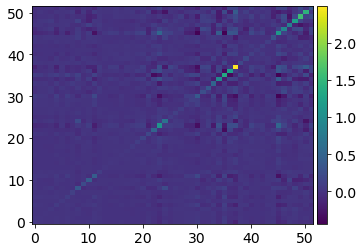

In [151]:
plt.imshow(+hcov_SCE+hcov_Recomb2+, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

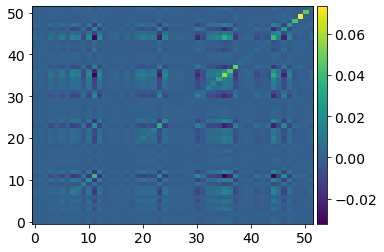

In [142]:
plt.imshow(hcov_LYDown, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

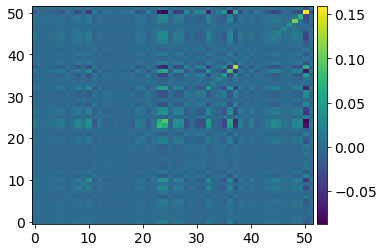

In [143]:
plt.imshow(hcov_LYatt, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

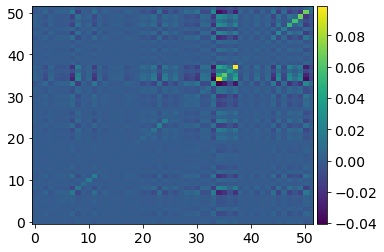

In [144]:
plt.imshow(hcov_LYRayleigh, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

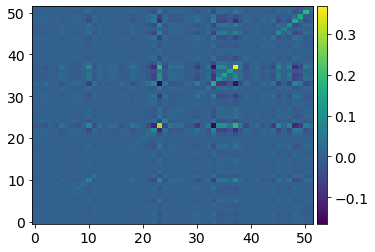

In [145]:
plt.imshow(hcov_SCE, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

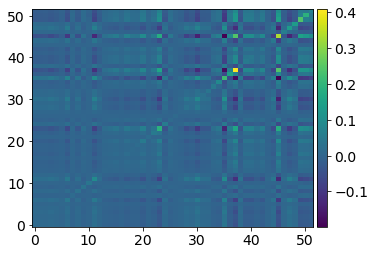

In [146]:
plt.imshow(hcov_Recomb2, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

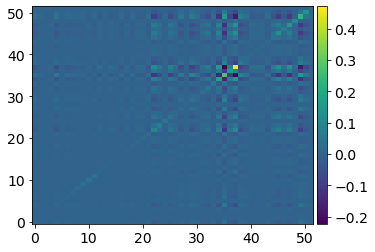

In [147]:
plt.imshow(hcov_WMX, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

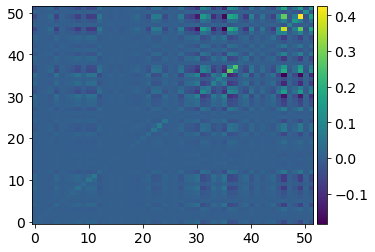

In [148]:
plt.imshow(hcov_WMYZ, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

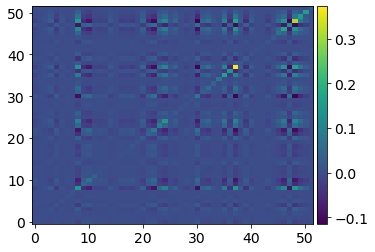

In [149]:
plt.imshow(hcov_WMThetaXZ, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

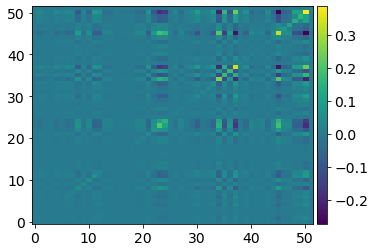

In [150]:
plt.imshow(hcov_WMThetaYZ, aspect="auto", origin='lower')#, norm=mpl.colors.LogNorm())
plt.colorbar(pad=0.01)

In [74]:
def det_syst(folder):
    #------------------------------------------------------------------------------------------------
    hcov_LYDown = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_LYDown.root')['cov_det_mat_1']
    hcov_LYatt = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_LYatt.root')['cov_det_mat_1']
    hcov_LYRayleigh = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_LYRayleigh.root')['cov_det_mat_1']
    #------------------------------------------------------------------------------------------------
    hcov_SCE = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_SCE.root')['cov_det_mat_1']
    #------------------------------------------------------------------------------------------------
    hcov_Recomb2 = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_Recomb2.root')['cov_det_mat_1']
    #------------------------------------------------------------------------------------------------
    hcov_WMX = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_WMX.root')['cov_det_mat_1']
    hcov_WMYZ = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_WMYZ.root')['cov_det_mat_1']
    hcov_WMThetaXZ = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_WMThetaXZ.root')['cov_det_mat_1']
    hcov_WMThetaYZ = uproot.open('/home/gs627/LEEana/wiener_svd/'+folder+'/DetVar/cov_WMThetaYZ.root')['cov_det_mat_1']
    #------------------------------------------------------------------------------------------------
    plt.figure(figsize=(7.5,6.5))
    plt.imshow(hcov_LYDown, aspect="auto", origin='lower', norm=mpl.colors.LogNorm())
    plt.figure(figsize=(7.5,6.5))
    plt.imshow(hcov_SCE, aspect="auto", origin='lower', norm=mpl.colors.LogNorm())
    plt.figure(figsize=(7.5,6.5))
    plt.imshow(hcov_Recomb2, aspect="auto", origin='lower', norm=mpl.colors.LogNorm())
    plt.figure(figsize=(7.5,6.5))
    plt.imshow(hcov_WMX, aspect="auto", origin='lower', norm=mpl.colors.LogNorm())
    return 0

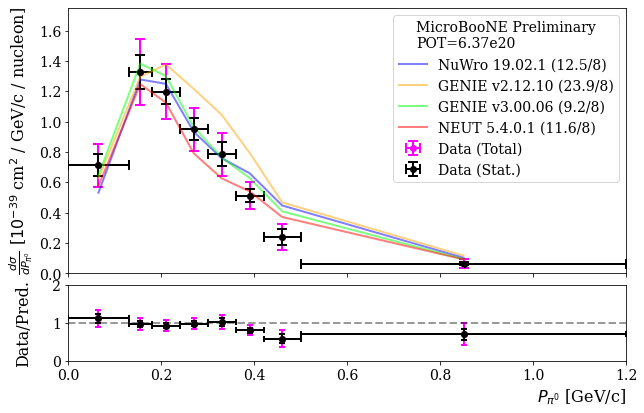

stat/sys = 
[0.59, 0.585, 0.531, 0.582, 0.698, 0.531, 0.701, 0.555]


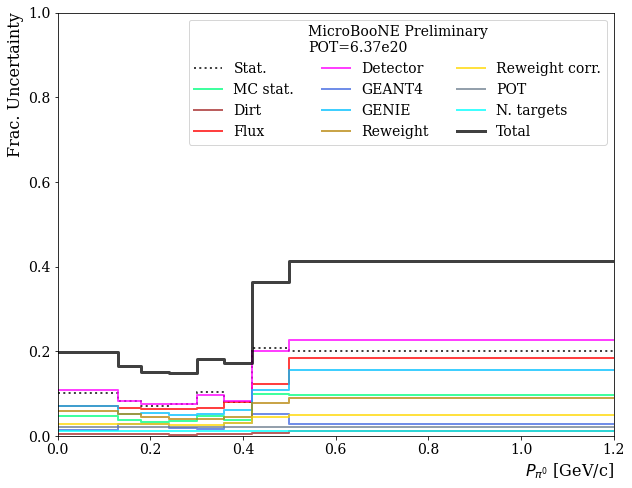

In [460]:
folder = 'diff_Xp_mom_rwNEW___new0p'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.631005, 1.35561, 1.28272, 0.958548, 0.762624, 0.625336, 0.403318, 0.0908766]
y = [0.713084, 1.32746, 1.19761, 0.94969, 0.78512, 0.511142, 0.239132, 0.0643863]
yerr_stat = [0.0720649, 0.110565, 0.0851262, 0.0715357, 0.0812957, 0.0413854, 0.0499474, 0.0129276]
yerr_tot = [0.140773, 0.216582, 0.179222, 0.140291, 0.140693, 0.0873993, 0.0868482, 0.0265986]
yerr_sys = [0.120928, 0.186234, 0.157715, 0.120682, 0.114828, 0.0769798, 0.0710484, 0.0232456]
chi2 = '9.33132'

frac_err_stat = [0.101061, 0.0832909, 0.0710801, 0.0753254, 0.103546, 0.0809666, 0.20887, 0.200782]
frac_err_mcstat = [0.0482899, 0.0389294, 0.0337895, 0.0349844, 0.0482569, 0.0382401, 0.100366, 0.0960729]
frac_err_dirt = [0.00594914, 0.00584, 0.00465387, 0.00367803, 0.00389596, 0.00396603, 0.00839461, 0.0109725]
frac_err_flux = [0.0712179, 0.065234, 0.0640697, 0.0648049, 0.0669406, 0.081, 0.123457, 0.184804]
frac_err_det = [0.10819, 0.0828818, 0.0750303, 0.0746114, 0.0961563, 0.0827844, 0.201461, 0.225752]
frac_err_geant4 = [0.0152526, 0.0276352, 0.0275276, 0.0182685, 0.0158882, 0.0306704, 0.0524158, 0.0280788]
frac_err_genie = [0.0714229, 0.0518695, 0.0543992, 0.0505445, 0.0520939, 0.0614772, 0.107852, 0.15619]
frac_err_rw = [0.0585776, 0.052215, 0.0440432, 0.0394133, 0.0411352, 0.0458224, 0.0769754, 0.0902167]
frac_err_rw_cor = [0.029145, 0.0287638, 0.0280714, 0.0265022, 0.0257189, 0.0311341, 0.0446916, 0.0505495]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1.75)
yrange2 = (0, 2)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_mom_Xp.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value)

save_name = None#folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov, weighted_bin=False, save_name=save_name, generator=gen_smear)

yrange = (0, 1)
ylabel='Frac. Uncertainty'
cf.plot_single_xs_err(edges, POT_bnb, xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                       frac_err_det, frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor,
                       xrange, yrange, weighted_bin=False, save_name=None)
                       #xrange, yrange, weighted_bin=False, save_name=save_name+'_frac_unc')

In [463]:
[x/y for x,y in zip(gen_smear['neut'], gen_smear['geniev3'])]

[0.890336308310618,
 0.9019715811581916,
 0.8654875295132128,
 0.8201634620370655,
 0.8203609539514704,
 0.8597914850139062,
 0.9087909133800821,
 0.990037484628041]

In [464]:
first = 0
last = -4
print(cf.calc_GoF(gen_smear['nuwro'][first:last], y[first:last], unfcov[first:last,first:last]))
print(cf.calc_GoF(gen_smear['geniev2'][first:last], y[first:last], unfcov[first:last,first:last]))
print(cf.calc_GoF(gen_smear['geniev3'][first:last], y[first:last], unfcov[first:last,first:last]))
print(cf.calc_GoF(gen_smear['neut'][first:last], y[first:last], unfcov[first:last,first:last]))
print('dof = '+str(len(y[first:last])))

2.9062879297435362
8.462048703775151
1.390801551437095
1.8565079626709442
dof = 4


12.517530652996179


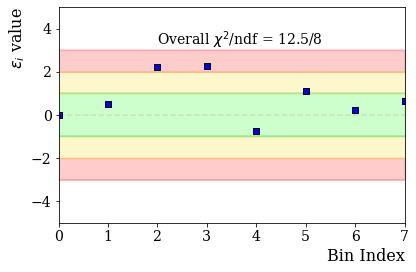

23.938506759681445


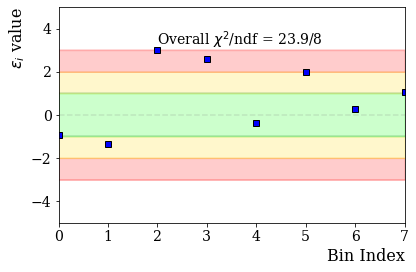

9.153156640589085


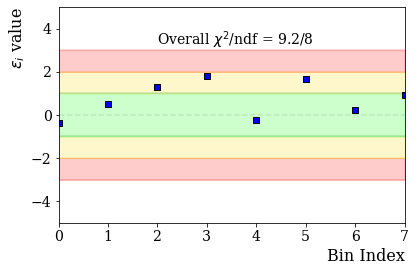

11.618825573658173


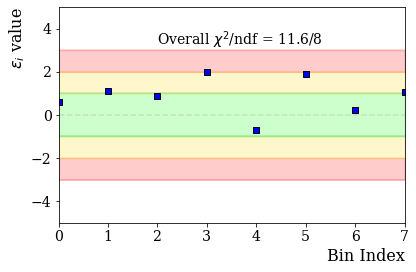

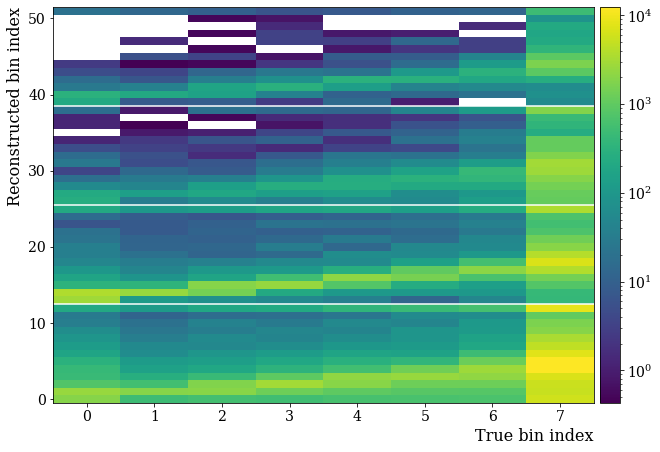

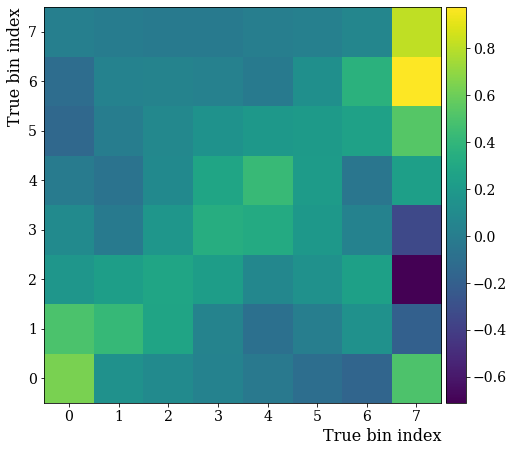

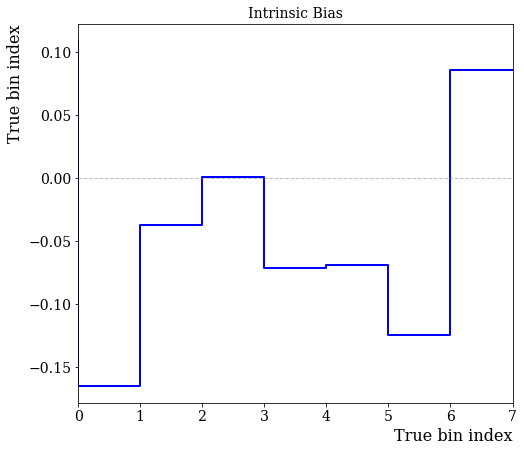

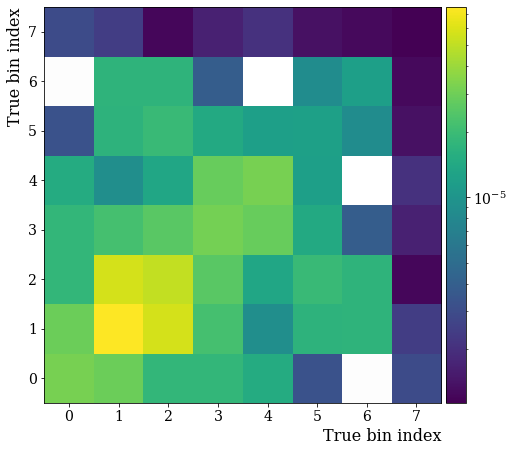

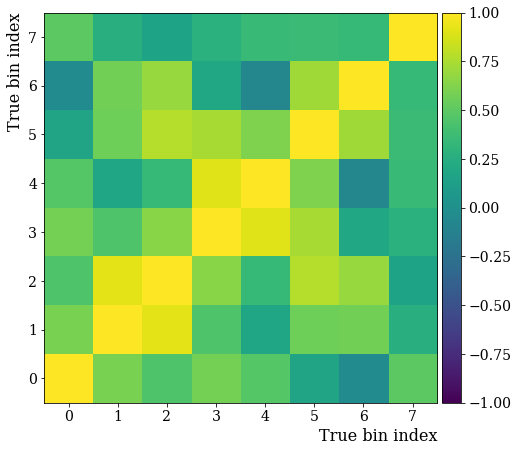

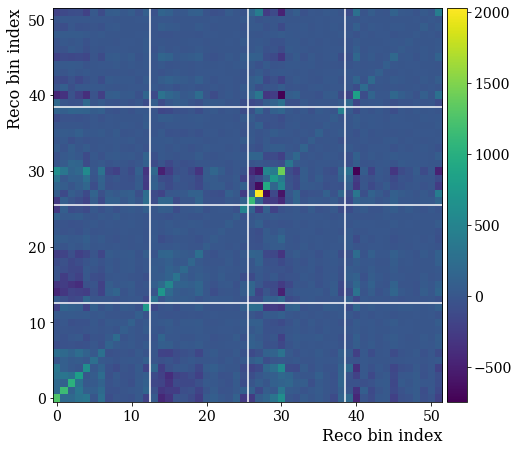

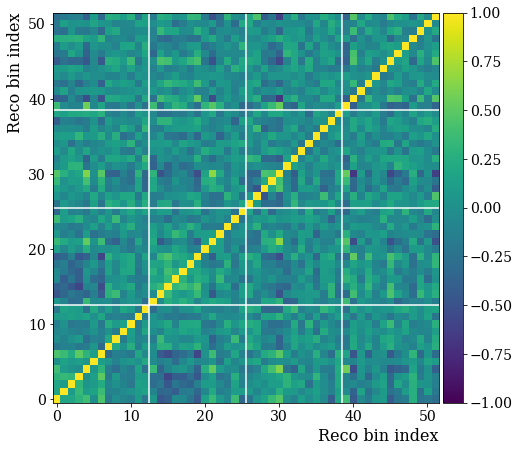

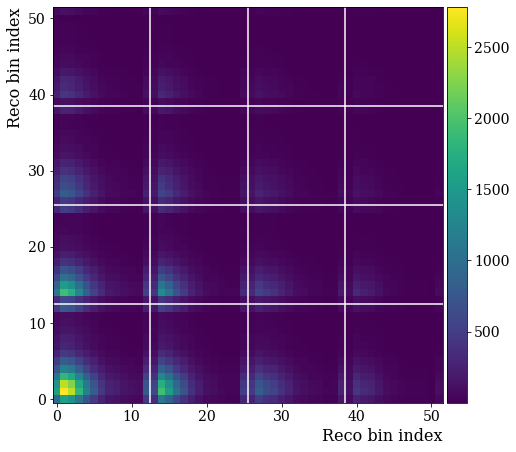

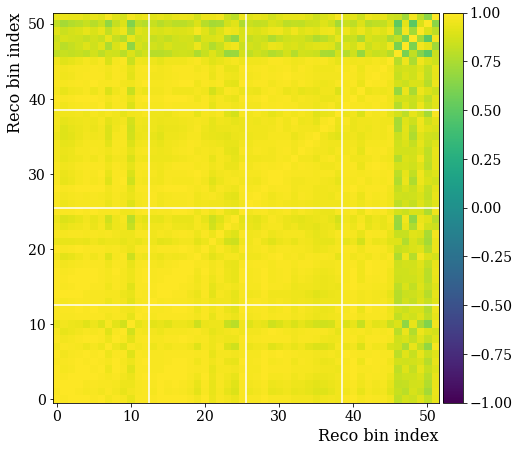

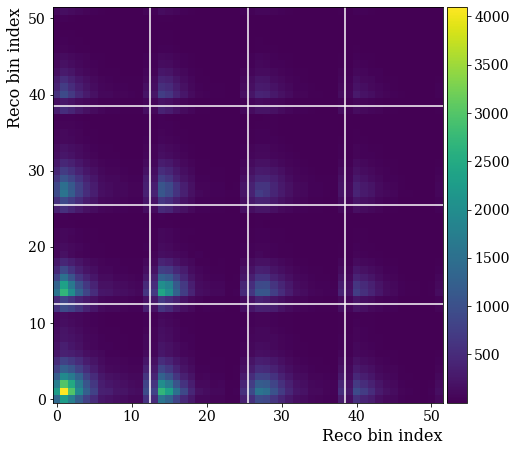

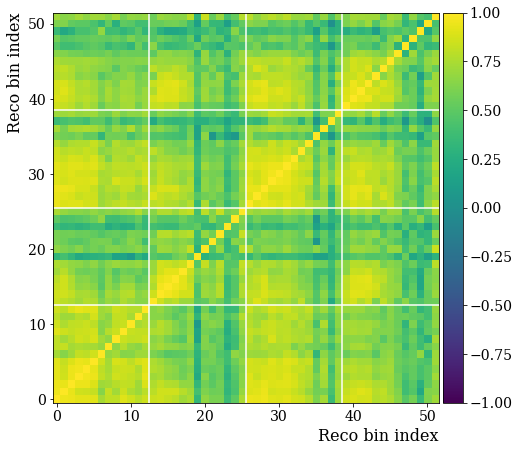

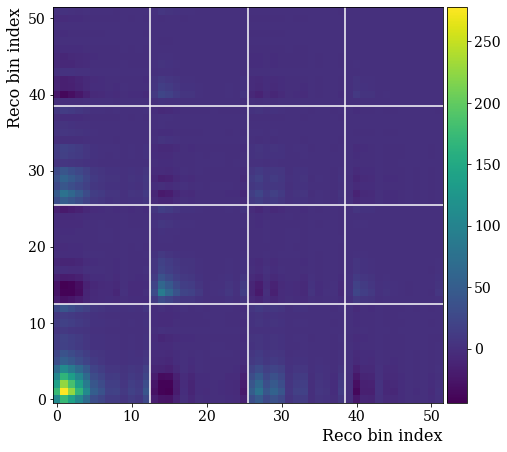

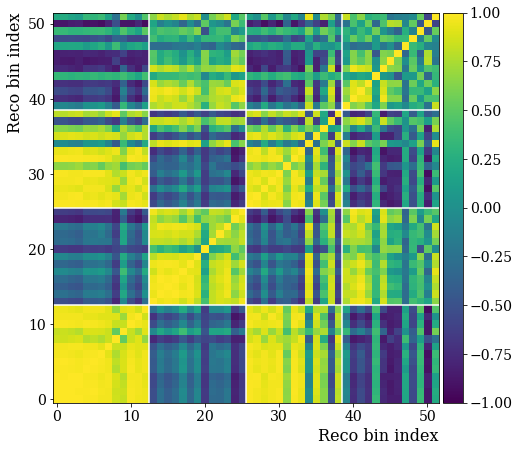

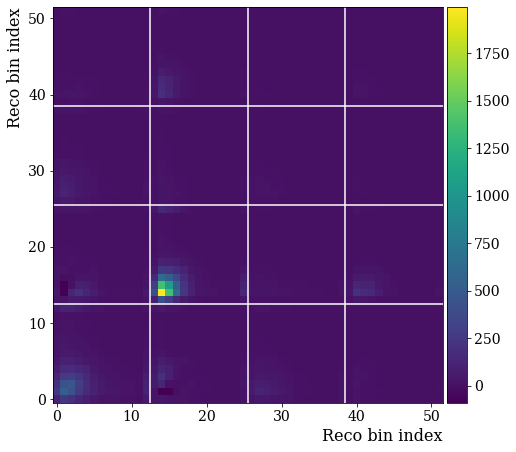

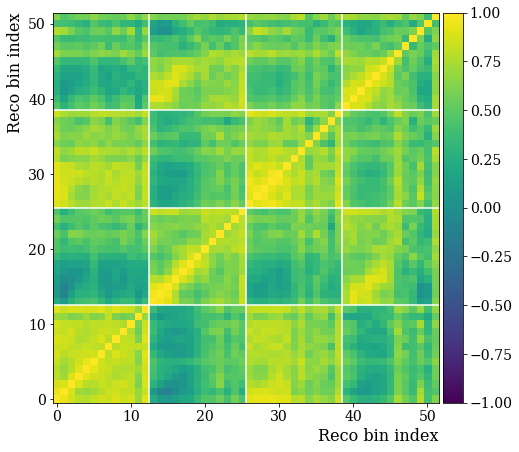

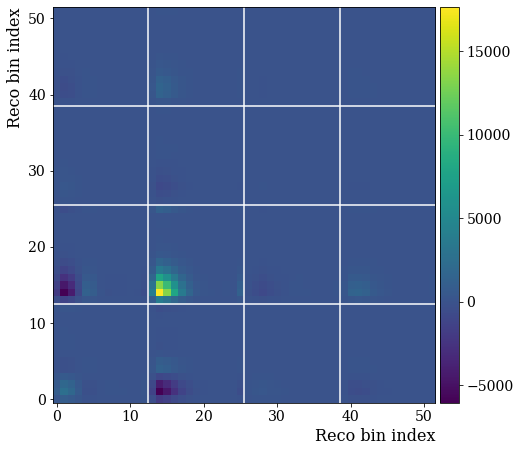

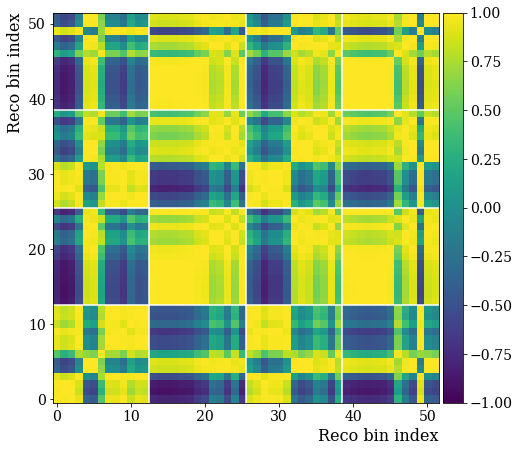

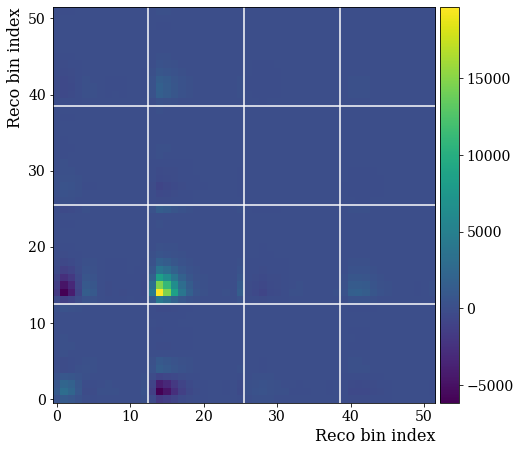

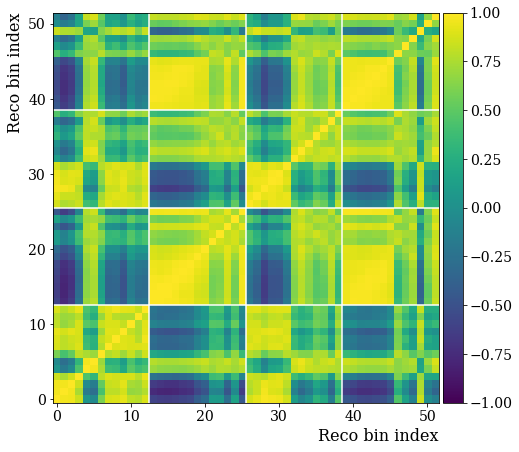

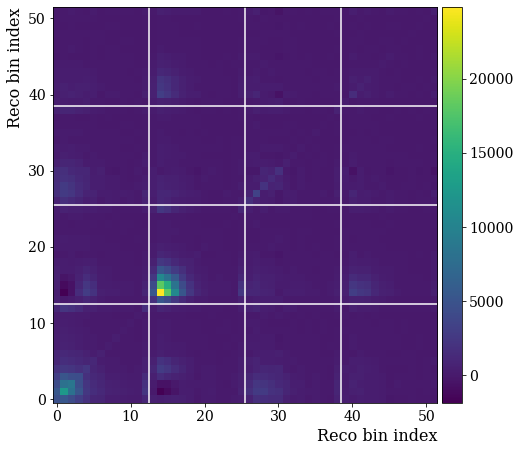

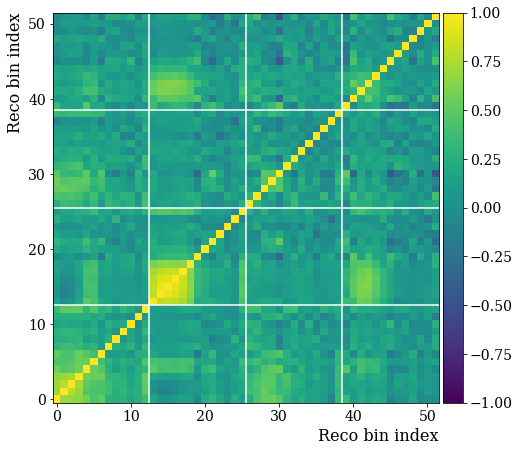

In [442]:
cf.chi2_decomposition(gen_smear['nuwro'], y, unfcov, save_name=save_name+'_nuwro')
cf.chi2_decomposition(gen_smear['geniev2'], y, unfcov, save_name=save_name+'_geniev2')
cf.chi2_decomposition(gen_smear['geniev3'], y, unfcov, save_name=save_name+'_geniev3')
cf.chi2_decomposition(gen_smear['neut'], y, unfcov, save_name=save_name+'_neut')
cf.visualize_xs_matrix(folder, ch=4, make_plots=True, save_name=save_name)

### Momentum Xp, 4ch (Asymov)

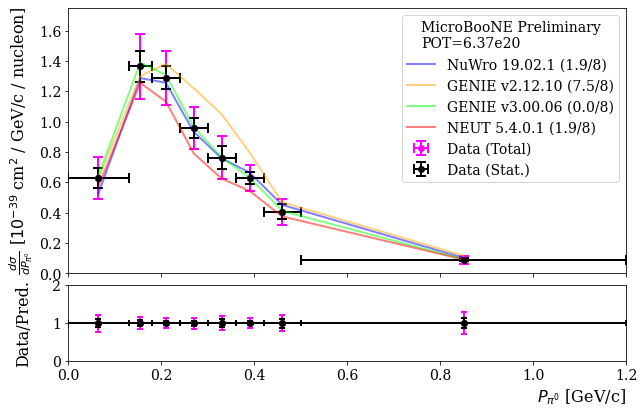

stat/sys = 
[0.526, 0.524, 0.464, 0.521, 0.651, 0.47, 0.659, 0.487]


In [488]:
folder = 'diff_Xp_mom_rwNEW_asymov___new0p'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.628824, 1.36385, 1.28954, 0.958895, 0.762793, 0.62869, 0.406246, 0.0903761]
y = [0.628824, 1.36385, 1.28954, 0.958895, 0.762793, 0.62869, 0.406246, 0.0903761]
yerr_stat = [0.0645252, 0.100025, 0.075106, 0.0644007, 0.0760104, 0.0370463, 0.0475976, 0.0114025]
yerr_tot = [0.137811, 0.21275, 0.175534, 0.137332, 0.13801, 0.0857713, 0.085906, 0.0259426]
yerr_sys = [0.121772, 0.187771, 0.158654, 0.121296, 0.115192, 0.0773582, 0.0715143, 0.0233024]
chi2 = '3.0971e-13'

frac_err_stat = [0.102612, 0.0733397, 0.0582423, 0.0671614, 0.0996476, 0.0589263, 0.117165, 0.126167]
frac_err_mcstat = [0.0562649, 0.0390752, 0.0321486, 0.0356099, 0.0503457, 0.0317774, 0.0597671, 0.0696148]
frac_err_dirt = [0.00703028, 0.00590738, 0.00447231, 0.00375804, 0.00420193, 0.00332777, 0.0051974, 0.00803904]
frac_err_flux = [0.0791789, 0.0624608, 0.0585044, 0.0629908, 0.0676691, 0.0646206, 0.0712136, 0.129113]
frac_err_det = [0.126646, 0.0833746, 0.0717432, 0.0763346, 0.100926, 0.069259, 0.120744, 0.164102]
frac_err_geant4 = [0.0166357, 0.026973, 0.025538, 0.0174702, 0.0156019, 0.0248141, 0.031115, 0.0190735]
frac_err_genie = [0.0803339, 0.0504764, 0.0505834, 0.0494836, 0.052888, 0.0503122, 0.0639006, 0.110881]
frac_err_rw = [0.064916, 0.0501704, 0.0406101, 0.0388155, 0.0420831, 0.0371172, 0.0448606, 0.0637265]
frac_err_rw_cor = [0.0321291, 0.0273469, 0.0255599, 0.0257622, 0.0260029, 0.0249447, 0.0259927, 0.0353645]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1.75)
yrange2 = (0, 2)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_mom_Xp.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value)

save_name = folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov, weighted_bin=False, save_name=save_name, generator=gen_smear)

### Momentum Xp, 4ch (Fake NUWRO)

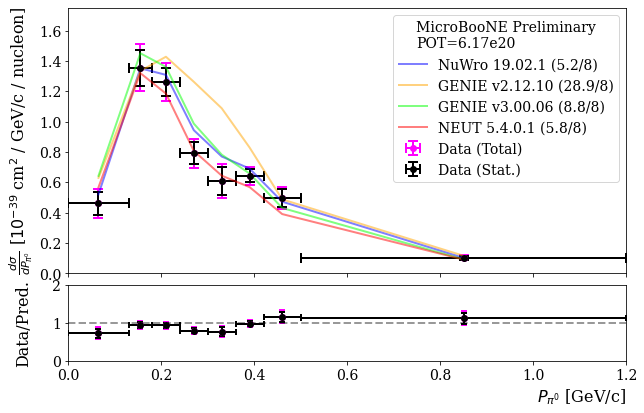

stat/sys = 
[1.216, 1.22, 1.063, 1.203, 1.438, 1.046, 1.406, 1.16]


In [492]:
folder = 'diff_Xp_mom_rwNO_fakenuwro___new0p'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.623535, 1.41695, 1.33949, 0.981895, 0.784305, 0.654972, 0.424218, 0.0895676]
y = [0.460423, 1.35592, 1.26162, 0.791657, 0.609495, 0.643878, 0.495302, 0.101334]
yerr_stat = [0.0752823, 0.118547, 0.0907724, 0.0742975, 0.0906966, 0.0430827, 0.0582527, 0.0129188]
yerr_tot = [0.0968198, 0.149601, 0.120708, 0.0946366, 0.109459, 0.0574669, 0.0704329, 0.0168746]
yerr_sys = [0.0608823, 0.0912535, 0.079566, 0.0586172, 0.0612819, 0.0380306, 0.0395907, 0.0108562]
chi2 = '8.34024'

frac_err_stat = [0.163507, 0.0874288, 0.0719488, 0.0938506, 0.148806, 0.0669113, 0.11761, 0.127487]
frac_err_mcstat = [0.0870668, 0.0446747, 0.0370517, 0.0482939, 0.076279, 0.0346687, 0.0597329, 0.067706]
frac_err_genie = [0.0995213, 0.0503335, 0.0510346, 0.0561265, 0.065505, 0.04782, 0.053115, 0.0830254]
frac_err_dirt = [0, 0, 0, 0, 0, 0, 0, 0]
frac_err_flux = [0, 0, 0, 0, 0, 0, 0, 0]
frac_err_det = [0, 0, 0, 0, 0, 0, 0, 0]
frac_err_geant4 = [0, 0, 0, 0, 0, 0, 0, 0]
frac_err_rw = [0, 0, 0, 0, 0, 0, 0, 0]
frac_err_rw_cor = [0, 0, 0, 0, 0, 0, 0, 0]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1.75)
yrange2 = (0, 2)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_mom_Xp.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value)

save_name = folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_nuwro, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov, weighted_bin=False, save_name=save_name, generator=gen_smear)

5.179070072528712


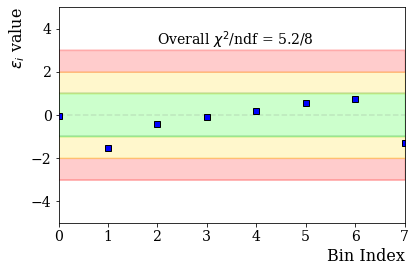

28.925629754682415


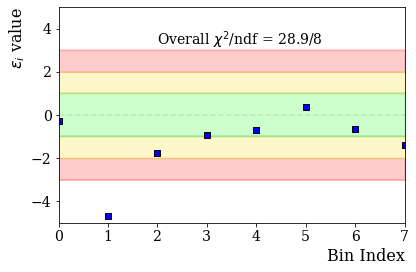

8.7894798739644


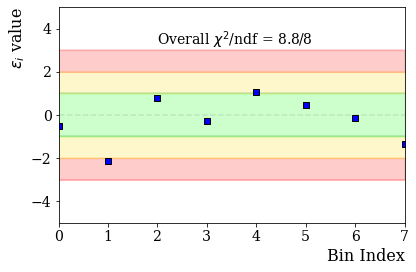

5.836449254260765


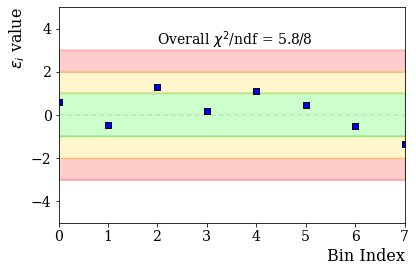

In [493]:
cf.chi2_decomposition(gen_smear['nuwro'], y, unfcov, save_name=save_name+'_nuwro')
cf.chi2_decomposition(gen_smear['geniev2'], y, unfcov, save_name=save_name+'_geniev2')
cf.chi2_decomposition(gen_smear['geniev3'], y, unfcov, save_name=save_name+'_geniev3')
cf.chi2_decomposition(gen_smear['neut'], y, unfcov, save_name=save_name+'_neut')

### Momentum 0p Np, 4ch

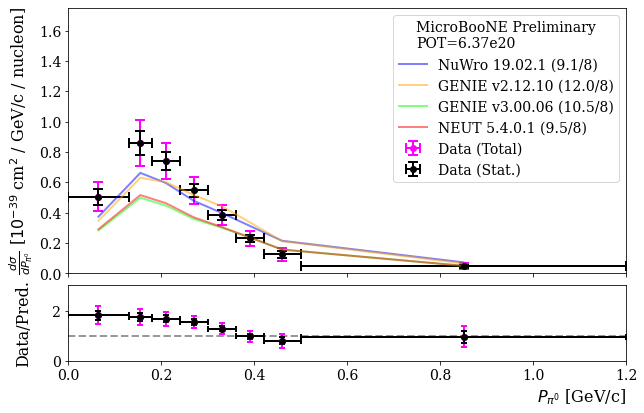

stat/sys = 
[0.622, 0.606, 0.582, 0.57, 0.56, 0.566, 0.605, 0.645]


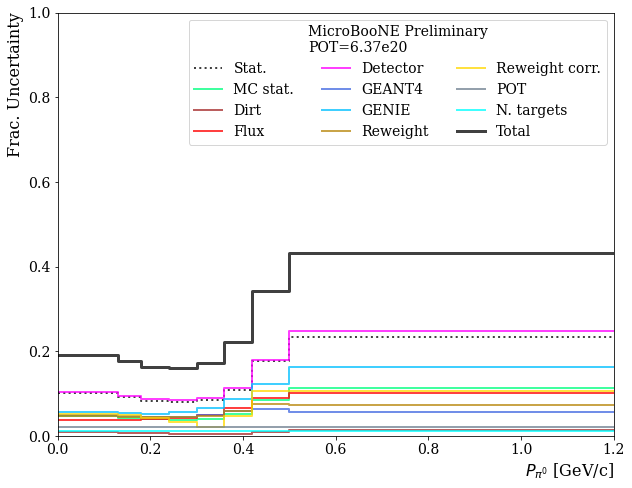

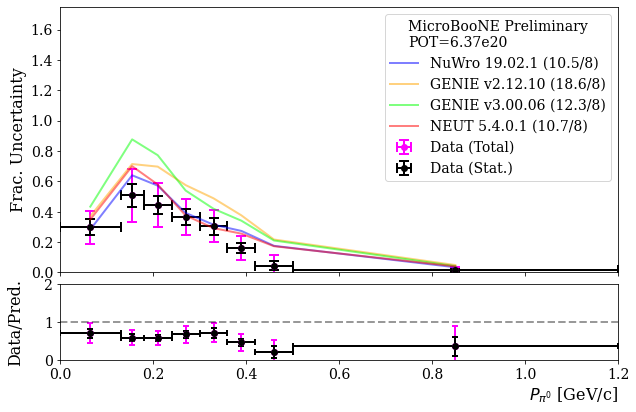

stat/sys = 
[0.531, 0.494, 0.422, 0.497, 0.598, 0.421, 0.535, 0.548]


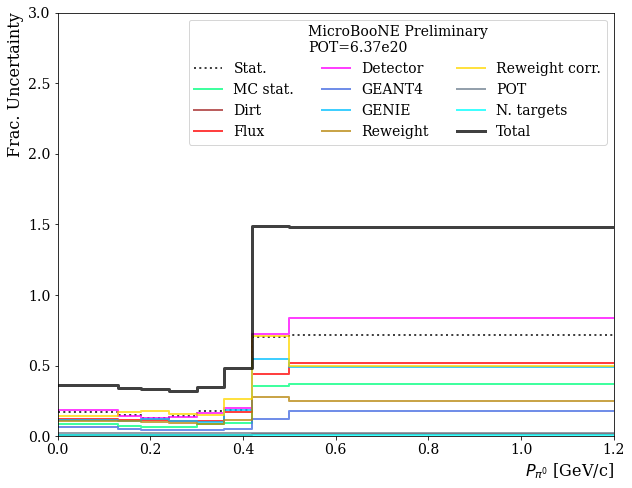

In [479]:
folder = 'diff_0pNp_mom_rwNEW___new0p'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.277242, 0.491238, 0.441696, 0.35601, 0.298909, 0.234577, 0.154351, 0.0476779, 0.420009, 0.8541, 0.758944, 0.536507, 0.420231, 0.339015, 0.206743, 0.0404018]
y = [0.503213, 0.860287, 0.739708, 0.547229, 0.382873, 0.229509, 0.12471, 0.0457087, 0.297602, 0.506561, 0.443959, 0.364536, 0.302622, 0.16003, 0.0444905, 0.0145218]
yerr_stat = [0.0506784, 0.0791651, 0.0610443, 0.0435983, 0.0323675, 0.025193, 0.0220787, 0.0106915, 0.0508639, 0.0762573, 0.057382, 0.0517788, 0.054216, 0.0300055, 0.0312081, 0.0103594]
yerr_tot = [0.0951073, 0.151299, 0.119934, 0.0870594, 0.0655663, 0.050816, 0.0425256, 0.0196838, 0.108186, 0.171631, 0.147175, 0.116008, 0.105349, 0.0772349, 0.06619, 0.0215392]
yerr_sys = [0.0804803, 0.128935, 0.103237, 0.075356, 0.05702, 0.0441314, 0.036345, 0.0165271, 0.095483, 0.15376, 0.135528, 0.103812, 0.0903276, 0.0711681, 0.058371, 0.0188843]
chi2 = '17.8645'
chi2_ch1 = '10.6703'
chi2_ch2 = '12.0719'
chi2 = [chi2_ch1,chi2_ch2]

frac_err_stat = [0.10071, 0.0920218, 0.0825249, 0.079671, 0.0845385, 0.109769, 0.17704, 0.233905, 0.170913, 0.150539, 0.129251, 0.14204, 0.179155, 0.187499, 0.701455, 0.713372]
frac_err_mcstat = [0.0482638, 0.0439031, 0.0393019, 0.037721, 0.0393934, 0.0516949, 0.084749, 0.112651, 0.0823178, 0.0706621, 0.0620371, 0.0670675, 0.0851428, 0.0919787, 0.354157, 0.369828]
frac_err_dirt = [0.00889456, 0.00806209, 0.00672149, 0.00513879, 0.0041521, 0.00492697, 0.00951217, 0.013544, 0.00643871, 0.00638069, 0.00483916, 0.00509766, 0.00640122, 0.00655385, 0.0162644, 0.0157384]
frac_err_flux = [0.0383606, 0.038806, 0.0397963, 0.0429724, 0.0507267, 0.0662273, 0.0903349, 0.101194, 0.121384, 0.113884, 0.111663, 0.107769, 0.110424, 0.168251, 0.43817, 0.520757]
frac_err_det = [0.104852, 0.0954607, 0.0865849, 0.084824, 0.0908368, 0.113747, 0.180269, 0.247229, 0.18244, 0.140429, 0.130081, 0.135181, 0.164874, 0.197743, 0.720307, 0.835787]
frac_err_geant4 = [0.0491799, 0.0476285, 0.0455037, 0.0451678, 0.0495109, 0.0583655, 0.0651232, 0.0574226, 0.0629863, 0.0510113, 0.0461545, 0.0458294, 0.0462049, 0.0537088, 0.12427, 0.176464]
frac_err_genie = [0.0579742, 0.055232, 0.052906, 0.0566562, 0.0674423, 0.0881218, 0.123827, 0.162287, 0.111414, 0.106432, 0.121495, 0.104029, 0.10024, 0.186472, 0.543886, 0.492954]
frac_err_rw = [0.0463132, 0.0461478, 0.0454183, 0.0454329, 0.0484571, 0.0594048, 0.0765335, 0.0738887, 0.104113, 0.106128, 0.101362, 0.0917197, 0.0878218, 0.117453, 0.273552, 0.245457]
frac_err_rw_cor = [0.0527261, 0.0490157, 0.0433043, 0.0340194, 0.0209215, 0.0474574, 0.107576, 0.106796, 0.144511, 0.170932, 0.181007, 0.159222, 0.150099, 0.265344, 0.706184, 0.499932]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1.75)
yrange2 = (0, 3)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_mom_0pNp.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value) 
        
n = int(len(y)/2)
N = int(len(y))        

gen_smear1 = {'nuwro':gen_smear['nuwro'][:n],
              'geniev2':gen_smear['geniev2'][:n],
              'geniev3':gen_smear['geniev3'][:n],
              'neut':gen_smear['neut'][:n]
             }
gen_smear2 = {'nuwro':gen_smear['nuwro'][n:],
              'geniev2':gen_smear['geniev2'][n:],
              'geniev3':gen_smear['geniev3'][n:],
              'neut':gen_smear['neut'][n:]
             }

# Used in separate chi_square
unfcov1 = np.zeros((n,n))
unfcov2 = np.zeros((n,n))
for ith in range(n):
    for jth in range(n): unfcov1[ith,jth] = unfcov[ith,jth]
for ith in range(n):
    for jth in range(n): unfcov2[ith,jth] = unfcov[n+ith,n+jth]

save_name = None#folder+'_0p'
cf.plot_single_xs(edges, GENIE_y[:n], y[:n], yerr_stat[:n], [x*z for x,z in zip(frac_err_tot[:n],y[:n])], yerr_sys[:n], chi2_ch1, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov1, weighted_bin=False, save_name=save_name, generator=gen_smear1)
yrange = (0, 1)
ylabel='Frac. Uncertainty'
cf.plot_single_xs_err(edges, POT_bnb, xlabel, ylabel, frac_err_stat[:n], frac_err_mcstat[:n], frac_err_dirt[:n], frac_err_flux[:n], 
                       frac_err_det[:n], frac_err_geant4[:n], frac_err_genie[:n], frac_err_rw[:n], frac_err_rw_cor[:n],
                      xrange, yrange, weighted_bin=False, save_name=None)
                      #xrange, yrange, weighted_bin=False, save_name=save_name+'_frac_unc')


    
yrange = (0, 1.75)
yrange2 = (0, 2)
save_name = None#folder+'_Np'
cf.plot_single_xs(edges, GENIE_y[n:], y[n:], yerr_stat[n:], [x*z for x,z in zip(frac_err_tot[n:],y[n:])], yerr_sys[n:], chi2_ch2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov2, weighted_bin=False, save_name=save_name, generator=gen_smear2)
yrange = (0, 3)
ylabel='Frac. Uncertainty'
cf.plot_single_xs_err(edges, POT_bnb, xlabel, ylabel, frac_err_stat[n:], frac_err_mcstat[n:], frac_err_dirt[n:], frac_err_flux[n:], 
                       frac_err_det[n:], frac_err_geant4[n:], frac_err_genie[n:], frac_err_rw[n:], frac_err_rw_cor[n:],
                      xrange, yrange, weighted_bin=False, save_name=None)
                      #xrange, yrange, weighted_bin=False, save_name=save_name+'_frac_unc')

In [480]:
[x/z for x,z in zip(gen_smear2['neut'],y[n:])]

[1.1691088976102753,
 1.3803283922741154,
 1.302899427244377,
 1.0270003094289077,
 0.9619179895328146,
 1.591356934711809,
 3.86115031653948,
 2.6998107672718508]

In [484]:
first = 0
last = -1
print(cf.calc_GoF(gen_smear2['nuwro']/1.35, y[n:], unfcov2))
print(cf.calc_GoF(gen_smear2['geniev2']/1.35, y[n:], unfcov2))
print(cf.calc_GoF(gen_smear2['geniev3']/1.35, y[n:], unfcov2))
print(cf.calc_GoF(gen_smear2['neut']/1.35, y[n:], unfcov2))
print('dof = '+str(len(y[n:])))

9.43689473686382
12.802860434630787
8.171073024955774
9.358343872638358
dof = 8


9.064299518642738


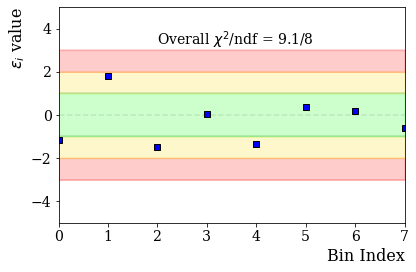

12.00562693937578


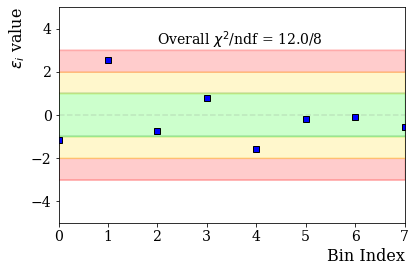

10.529365844017315


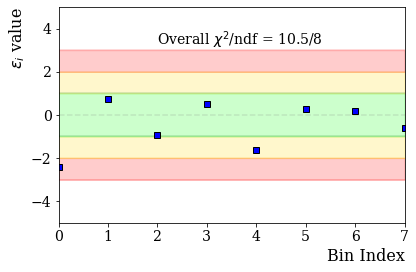

9.548894774062711


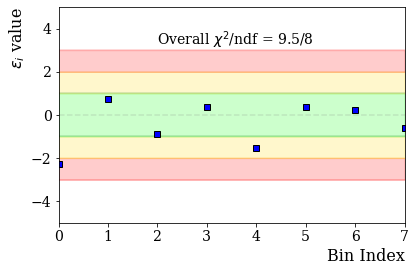

10.45739541191629


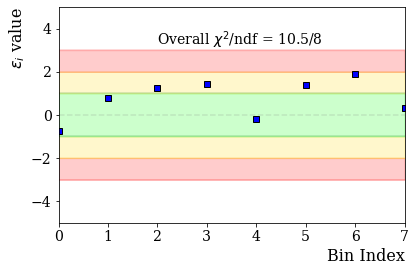

18.63570594589234


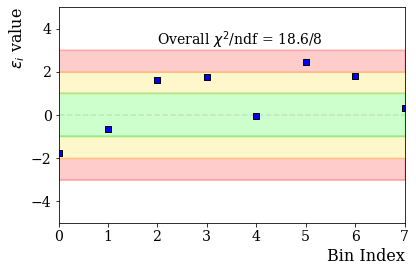

12.31086484577181


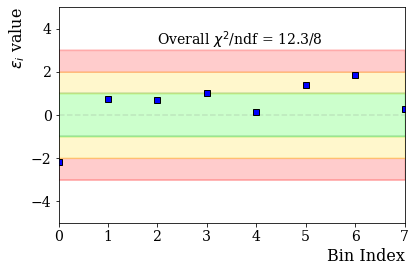

10.68265124530478


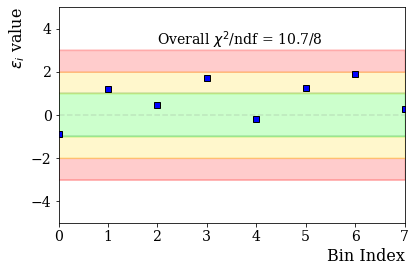

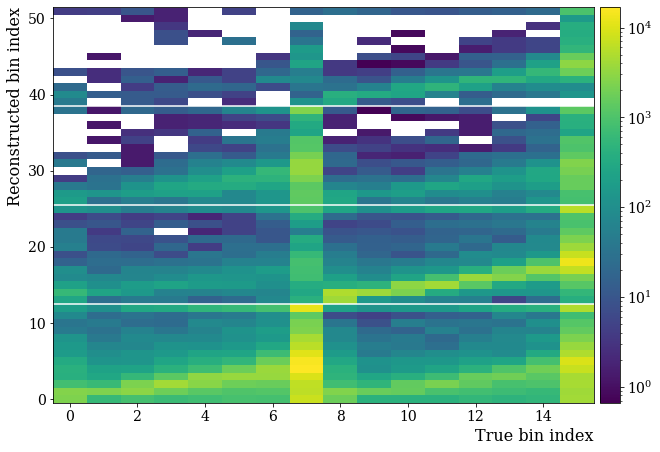

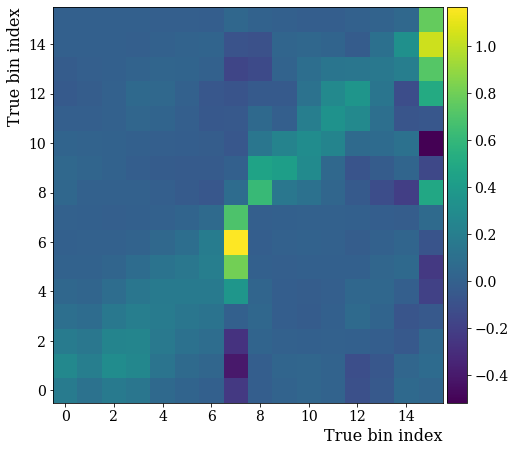

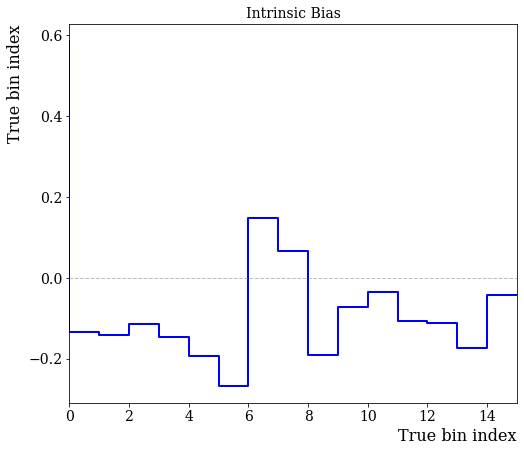

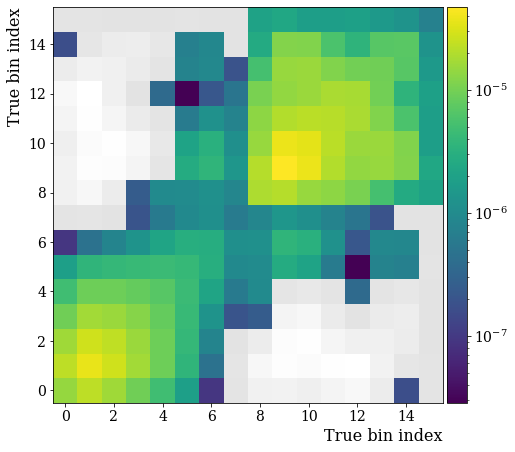

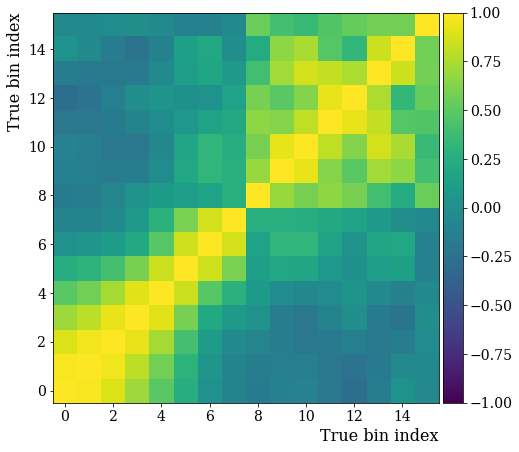

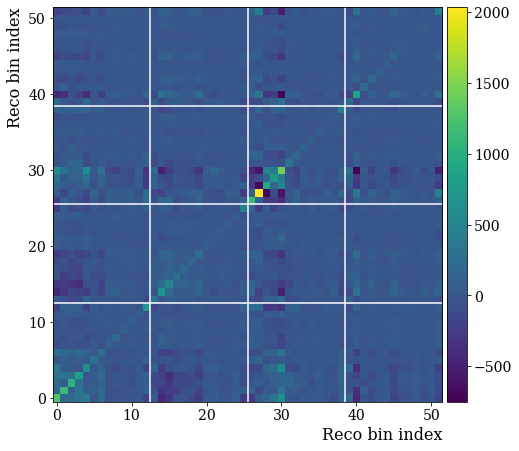

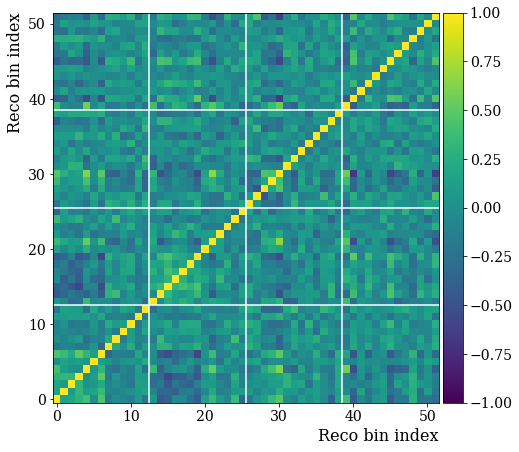

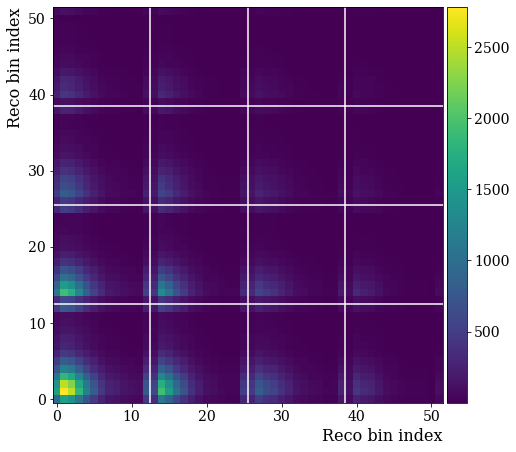

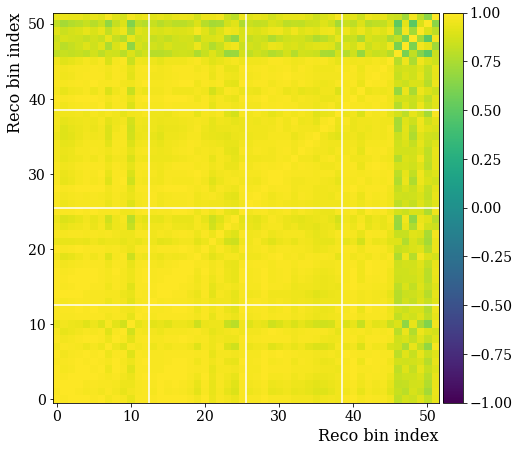

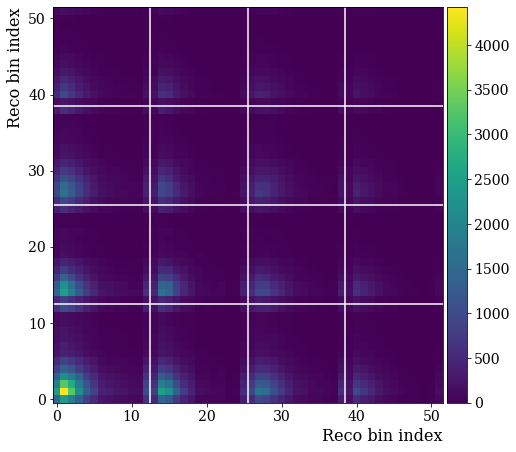

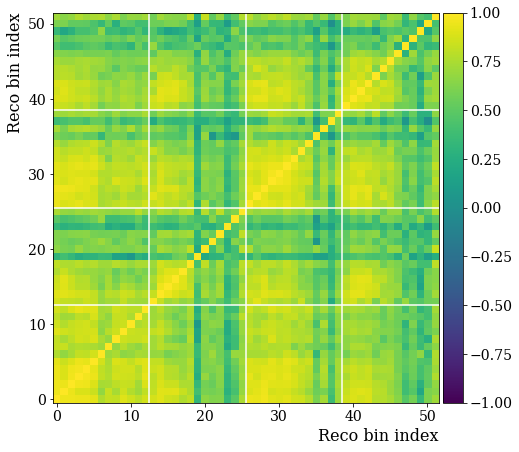

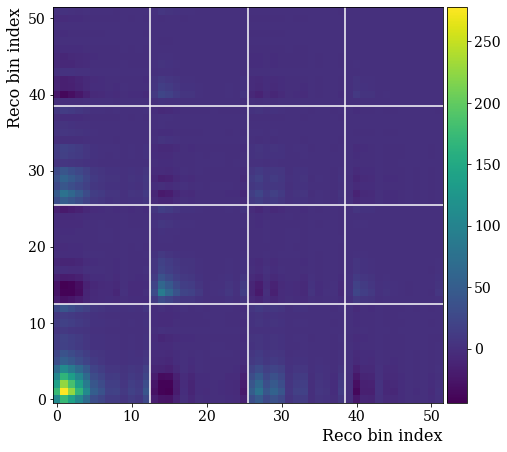

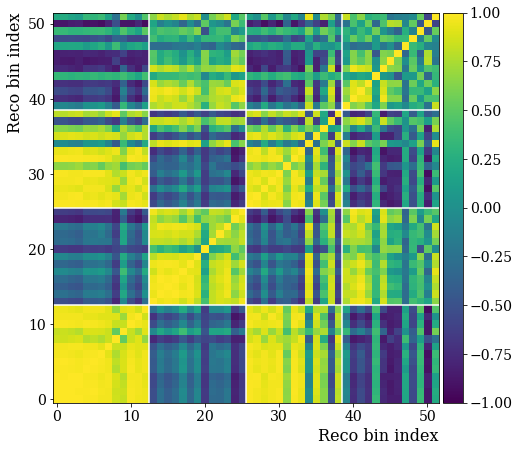

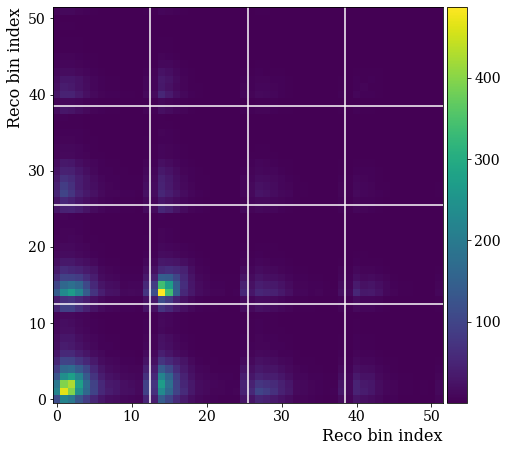

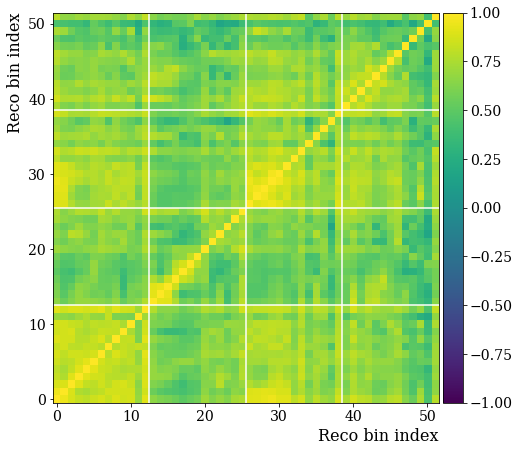

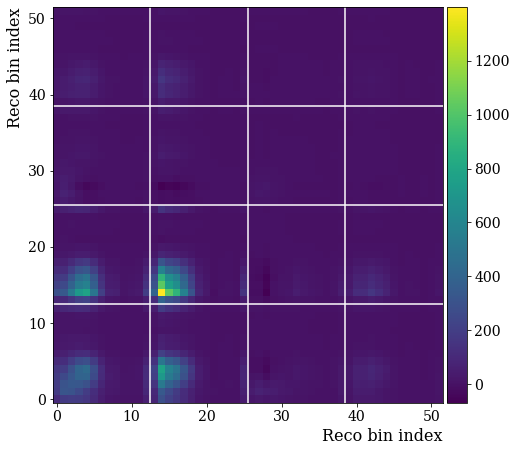

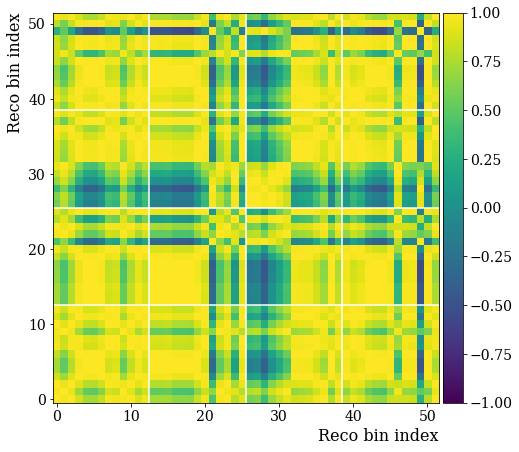

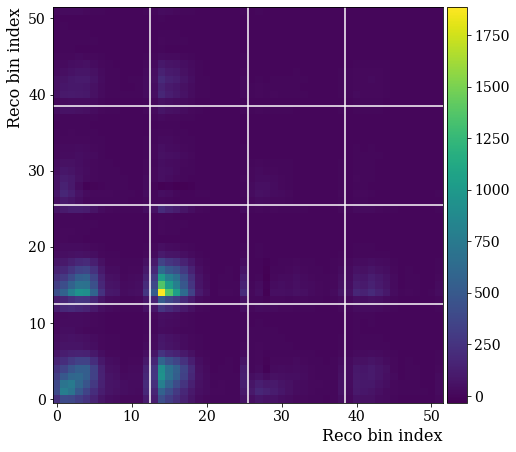

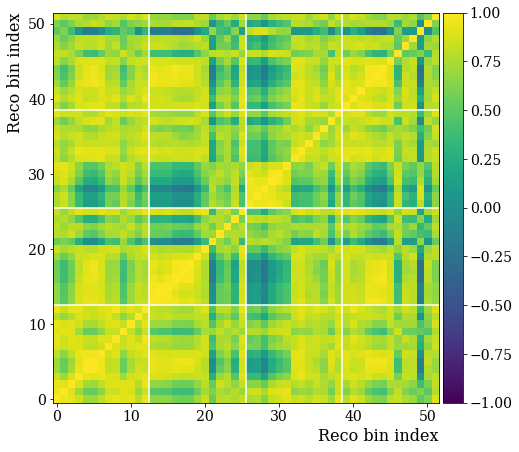

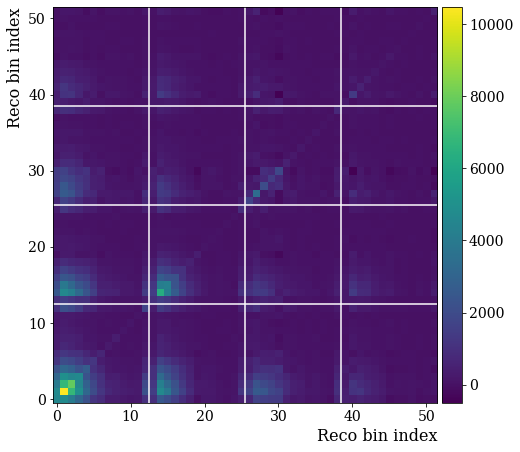

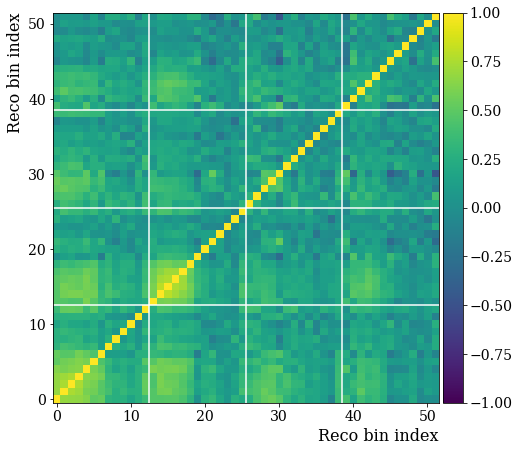

In [447]:
save_name = folder+'_0p'
#cf.chi2_decomposition(GENIE_y[:n], y[:n], unfcov1, save_name=save_name)
cf.chi2_decomposition(gen_smear1['nuwro'], y[:n], unfcov1, save_name=save_name+'_nuwro')
cf.chi2_decomposition(gen_smear1['geniev2'], y[:n], unfcov1, save_name=save_name+'_geniev2')
cf.chi2_decomposition(gen_smear1['geniev3'], y[:n], unfcov1, save_name=save_name+'_geniev3')
cf.chi2_decomposition(gen_smear1['neut'], y[:n], unfcov1, save_name=save_name+'_neut')
save_name = folder+'_Np'
#cf.chi2_decomposition(GENIE_y[n:], y[n:], unfcov2, save_name=save_name)
cf.chi2_decomposition(gen_smear2['nuwro'], y[n:], unfcov2, save_name=save_name+'_nuwro')
cf.chi2_decomposition(gen_smear2['geniev2'], y[n:], unfcov2, save_name=save_name+'_geniev2')
cf.chi2_decomposition(gen_smear2['geniev3'], y[n:], unfcov2, save_name=save_name+'_geniev3')
cf.chi2_decomposition(gen_smear2['neut'], y[n:], unfcov2, save_name=save_name+'_neut')
save_name = folder
cf.visualize_xs_matrix(folder, ch=4, make_plots=True, save_name=save_name)

### Momentum 0p Np, 4ch (Asymov)

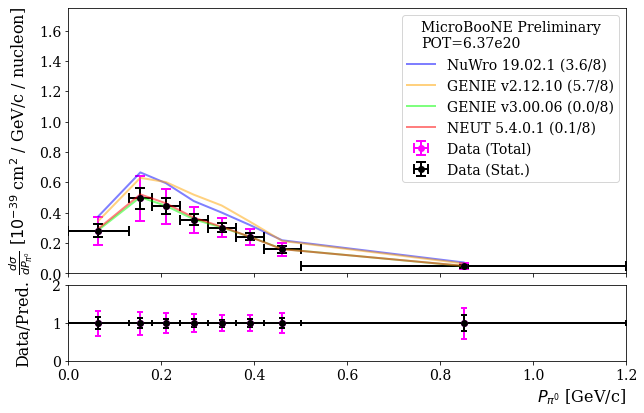

stat/sys = 
[0.541, 0.524, 0.506, 0.508, 0.5, 0.514, 0.549, 0.578]


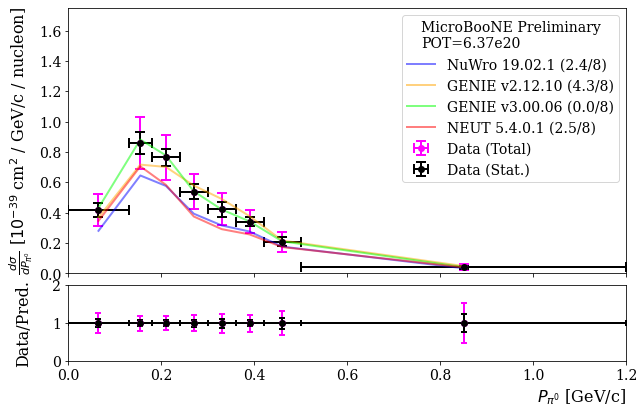

stat/sys = 
[0.487, 0.464, 0.391, 0.467, 0.564, 0.392, 0.514, 0.486]


In [495]:
folder = 'diff_0pNp_mom_rwNEW_asymov___new0p'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.280674, 0.49458, 0.440573, 0.354047, 0.300767, 0.239417, 0.157335, 0.0471663, 0.417755, 0.859679, 0.763999, 0.537877, 0.421731, 0.341143, 0.207744, 0.0402688]
y = [0.280674, 0.49458, 0.440573, 0.354047, 0.300767, 0.239417, 0.157335, 0.0471662, 0.417755, 0.859679, 0.763999, 0.537877, 0.421731, 0.341143, 0.207744, 0.0402688]
yerr_stat = [0.0445155, 0.0687481, 0.0530027, 0.0389462, 0.0289841, 0.0232307, 0.0203443, 0.00962544, 0.0469496, 0.0724055, 0.0537316, 0.0488967, 0.0513783, 0.0281505, 0.0300457, 0.00920355]
yerr_tot = [0.0932948, 0.147548, 0.116843, 0.0856159, 0.0644266, 0.0504736, 0.0421164, 0.0191877, 0.106688, 0.17069, 0.146204, 0.11488, 0.104028, 0.0766381, 0.065526, 0.0210296]
yerr_sys = [0.0819896, 0.130553, 0.10413, 0.0762449, 0.0575388, 0.0448098, 0.0368769, 0.0165987, 0.0958025, 0.154572, 0.135973, 0.103954, 0.090455, 0.0712808, 0.0582315, 0.0189086]
chi2 = '4.54448e-11'
chi2_ch1 = '3.35371e-13'
chi2_ch2 = '2.73829e-13'
chi2 = [chi2_ch1,chi2_ch2]

frac_err_stat = [0.158602, 0.139003, 0.120304, 0.110003, 0.0963673, 0.0970302, 0.129306, 0.204075, 0.112386, 0.0842238, 0.0703294, 0.0909069, 0.121827, 0.0825181, 0.144629, 0.228553]
frac_err_mcstat = [0.0896524, 0.0786428, 0.0677457, 0.0603098, 0.0516262, 0.0515045, 0.0693715, 0.110935, 0.0603441, 0.0428952, 0.0370299, 0.0470312, 0.062517, 0.0445421, 0.0760757, 0.135709]
frac_err_dirt = [0.0165866, 0.0144959, 0.011554, 0.00806934, 0.00541763, 0.00489974, 0.00780165, 0.0134213, 0.00476014, 0.00383853, 0.00286091, 0.00364063, 0.00487627, 0.00313214, 0.0036867, 0.00584253]
frac_err_flux = [0.0682944, 0.0667341, 0.065614, 0.0651142, 0.0634803, 0.0626134, 0.0706627, 0.0964288, 0.0852361, 0.0663989, 0.0642351, 0.0721803, 0.0783176, 0.0781541, 0.0929798, 0.185744]
frac_err_det = [0.195411, 0.171233, 0.149009, 0.134819, 0.118449, 0.112586, 0.146996, 0.243477, 0.133785, 0.0851734, 0.0777682, 0.0947937, 0.121346, 0.0958035, 0.155705, 0.3068]
frac_err_geant4 = [0.0886368, 0.0826898, 0.0753769, 0.0684062, 0.0621823, 0.0559424, 0.0517313, 0.054355, 0.0449932, 0.0298849, 0.0266596, 0.0310721, 0.0331451, 0.0250363, 0.026547, 0.0634635]
frac_err_genie = [0.105422, 0.096895, 0.0892605, 0.0884146, 0.0860959, 0.0841724, 0.0971934, 0.156554, 0.0788318, 0.0629754, 0.0705277, 0.0694453, 0.0713195, 0.0880419, 0.116394, 0.176448]
frac_err_rw = [0.0834348, 0.0806187, 0.0765407, 0.0705616, 0.0622029, 0.0578238, 0.0612632, 0.0700108, 0.0738232, 0.06285, 0.0591937, 0.0622166, 0.0630672, 0.0550846, 0.0576843, 0.086706]
frac_err_rw_cor = [0.0907634, 0.0823683, 0.071572, 0.0527526, 0.0263712, 0.0468912, 0.0870971, 0.102058, 0.100372, 0.100007, 0.10456, 0.106172, 0.105122, 0.122336, 0.149332, 0.175299]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1.75)
yrange2 = (0, 2)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_mom_0pNp.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value) 
        
n = int(len(y)/2)
N = int(len(y))        

gen_smear1 = {'nuwro':gen_smear['nuwro'][:n],
              'geniev2':gen_smear['geniev2'][:n],
              'geniev3':gen_smear['geniev3'][:n],
              'neut':gen_smear['neut'][:n]
             }
gen_smear2 = {'nuwro':gen_smear['nuwro'][n:],
              'geniev2':gen_smear['geniev2'][n:],
              'geniev3':gen_smear['geniev3'][n:],
              'neut':gen_smear['neut'][n:]
             }

# Used in separate chi_square
unfcov1 = np.zeros((n,n))
unfcov2 = np.zeros((n,n))
for ith in range(n):
    for jth in range(n): unfcov1[ith,jth] = unfcov[ith,jth]
for ith in range(n):
    for jth in range(n): unfcov2[ith,jth] = unfcov[n+ith,n+jth]

save_name = folder+'_0p'
cf.plot_single_xs(edges, GENIE_y[:n], y[:n], yerr_stat[:n], [x*z for x,z in zip(frac_err_tot[:n],y[:n])], yerr_sys[:n], chi2_ch1, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov1, weighted_bin=False, save_name=save_name, generator=gen_smear1)

save_name = folder+'_Np'
cf.plot_single_xs(edges, GENIE_y[n:], y[n:], yerr_stat[n:], [x*z for x,z in zip(frac_err_tot[n:],y[n:])], yerr_sys[n:], chi2_ch2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov2, weighted_bin=False, save_name=save_name, generator=gen_smear2)

### Momentum 0p Np, 4ch (fake NUWRO)

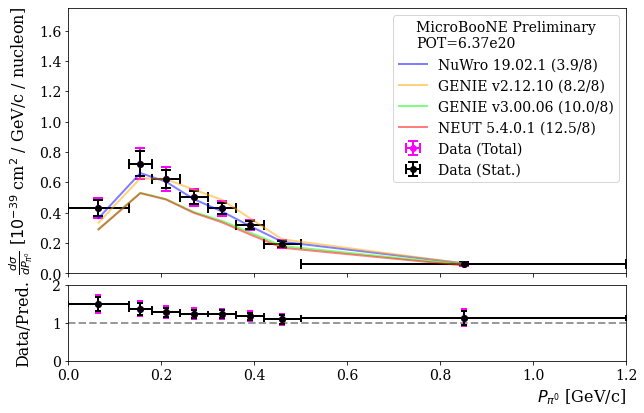

stat/sys = 
[1.303, 1.259, 1.233, 1.174, 1.151, 1.094, 1.272, 1.35]


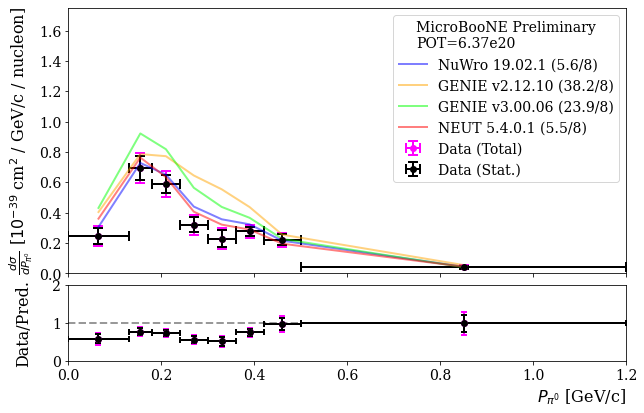

stat/sys = 
[1.264, 1.285, 1.063, 1.226, 1.464, 1.055, 1.341, 1.189]


In [498]:
folder = 'diff_0pNp_mom_rwNO_fakenuwro___new0p'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.286046, 0.52242, 0.483932, 0.400904, 0.344188, 0.267649, 0.177258, 0.0548149, 0.416047, 0.894389, 0.802437, 0.562117, 0.44097, 0.365727, 0.223845, 0.0396399]
y = [0.429371, 0.7223, 0.621977, 0.501408, 0.427871, 0.317609, 0.194869, 0.0627654, 0.245959, 0.693384, 0.588606, 0.318548, 0.227996, 0.276001, 0.219956, 0.0393412]
yerr_stat = [0.0535823, 0.0808861, 0.0607006, 0.0420775, 0.0356082, 0.0249565, 0.0210576, 0.00990496, 0.0521713, 0.0793183, 0.0606974, 0.0497339, 0.0572193, 0.029623, 0.0367049, 0.00919226]
yerr_tot = [0.0667168, 0.101767, 0.0766354, 0.0538833, 0.0459848, 0.0329019, 0.0263501, 0.0122299, 0.0662438, 0.0990409, 0.0820628, 0.0636943, 0.0690675, 0.040251, 0.0454702, 0.0119741]
yerr_sys = [0.0397501, 0.0617564, 0.0467806, 0.0336585, 0.0290974, 0.0214408, 0.0158399, 0.00717371, 0.0408215, 0.0593103, 0.055228, 0.0397933, 0.0386818, 0.027251, 0.0268383, 0.0076734]
chi2 = '4.61512e-05'
chi2_ch1 = '10.8887'
chi2_ch2 = '22.0776'
chi2 = [chi2_ch1,chi2_ch2]

frac_err_stat = [0.124792, 0.111984, 0.0975929, 0.0839186, 0.0832218, 0.078576, 0.10806, 0.157809, 0.212114, 0.114393, 0.103121, 0.156127, 0.250967, 0.107329, 0.166874, 0.233655]
frac_err_mcstat = [0.0641054, 0.0577345, 0.0502819, 0.0427353, 0.041687, 0.0395872, 0.0538546, 0.0795058, 0.113339, 0.0578322, 0.0533493, 0.0812292, 0.12951, 0.0557665, 0.08613, 0.135404]
frac_err_genie = [0.0667914, 0.0630628, 0.0559347, 0.0517675, 0.0537296, 0.0546813, 0.0608845, 0.0821096, 0.121243, 0.0630245, 0.0771857, 0.0949055, 0.109598, 0.0814784, 0.0864273, 0.140389]
frac_err_dirt = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
frac_err_flux = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
frac_err_det = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
frac_err_geant4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
frac_err_rw = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
frac_err_rw_cor = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1.75)
yrange2 = (0, 2)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_mom_0pNp.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value) 
        
n = int(len(y)/2)
N = int(len(y))        

gen_smear1 = {'nuwro':gen_smear['nuwro'][:n],
              'geniev2':gen_smear['geniev2'][:n],
              'geniev3':gen_smear['geniev3'][:n],
              'neut':gen_smear['neut'][:n]
             }
gen_smear2 = {'nuwro':gen_smear['nuwro'][n:],
              'geniev2':gen_smear['geniev2'][n:],
              'geniev3':gen_smear['geniev3'][n:],
              'neut':gen_smear['neut'][n:]
             }

# Used in separate chi_square
unfcov1 = np.zeros((n,n))
unfcov2 = np.zeros((n,n))
for ith in range(n):
    for jth in range(n): unfcov1[ith,jth] = unfcov[ith,jth]
for ith in range(n):
    for jth in range(n): unfcov2[ith,jth] = unfcov[n+ith,n+jth]

save_name = folder+'_0p'
cf.plot_single_xs(edges, GENIE_y[:n], y[:n], yerr_stat[:n], [x*z for x,z in zip(frac_err_tot[:n],y[:n])], yerr_sys[:n], chi2_ch1, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov1, weighted_bin=False, save_name=save_name, generator=gen_smear1)

save_name = folder+'_Np'
cf.plot_single_xs(edges, GENIE_y[n:], y[n:], yerr_stat[n:], [x*z for x,z in zip(frac_err_tot[n:],y[n:])], yerr_sys[n:], chi2_ch2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov2, weighted_bin=False, save_name=save_name, generator=gen_smear2)

### Momentum 0p, 2ch

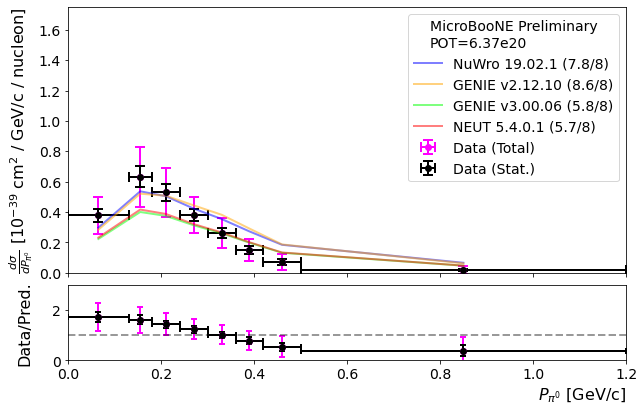

stat/sys = 
[0.404, 0.384, 0.354, 0.34, 0.365, 0.381, 0.39, 0.427]
5.745135365945766


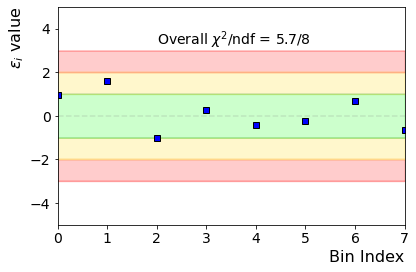

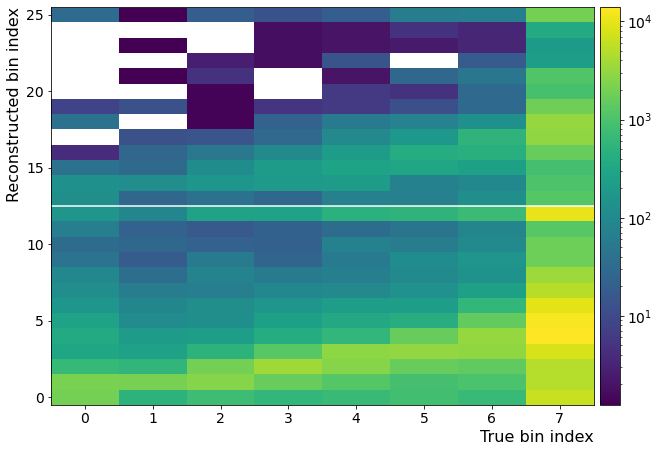

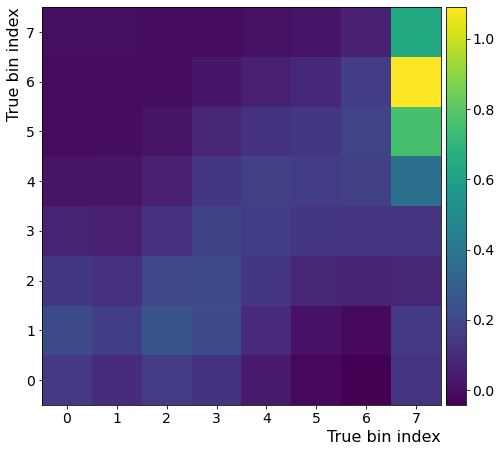

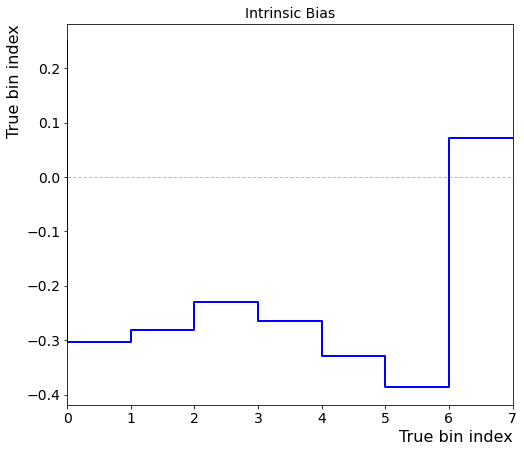

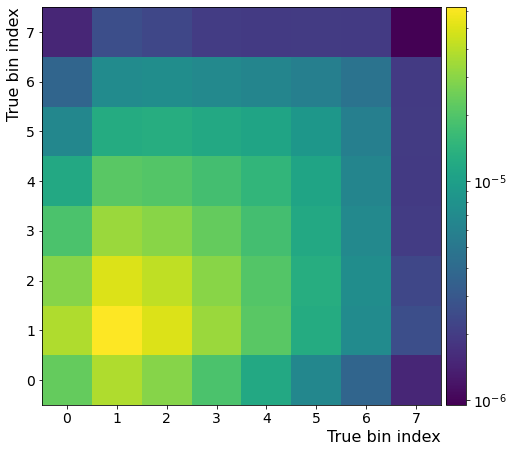

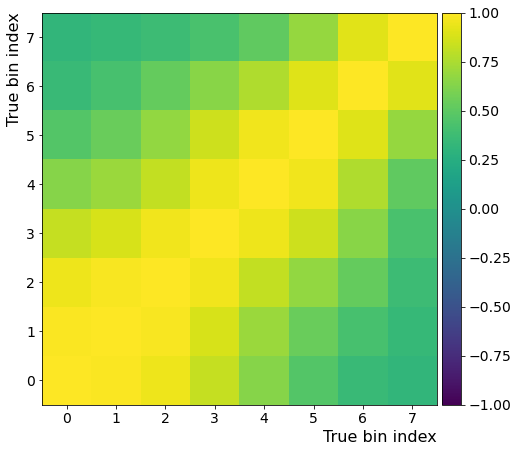

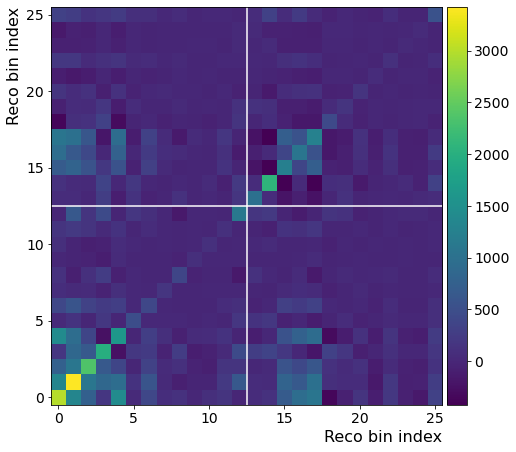

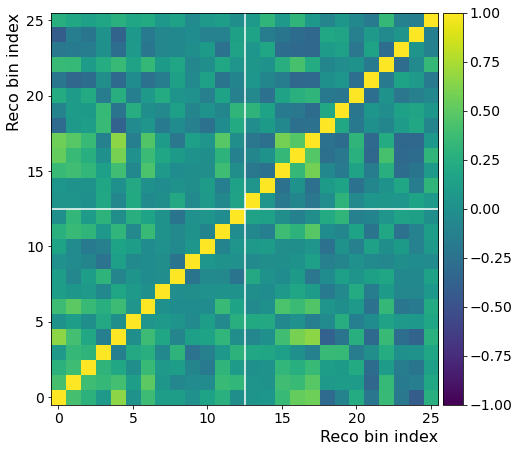

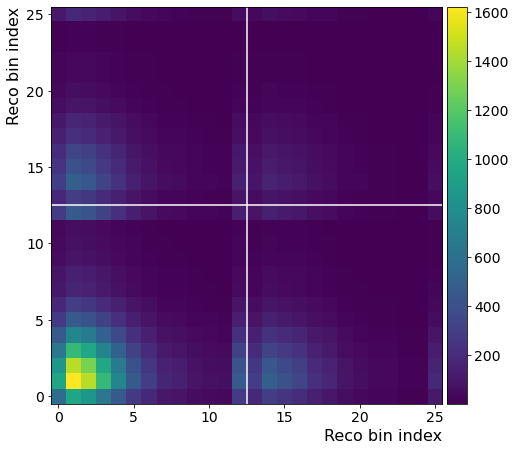

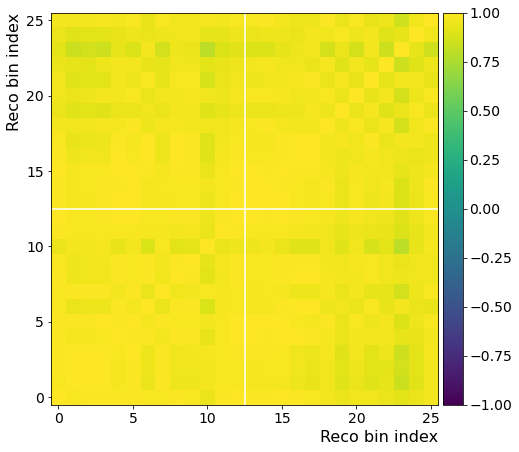

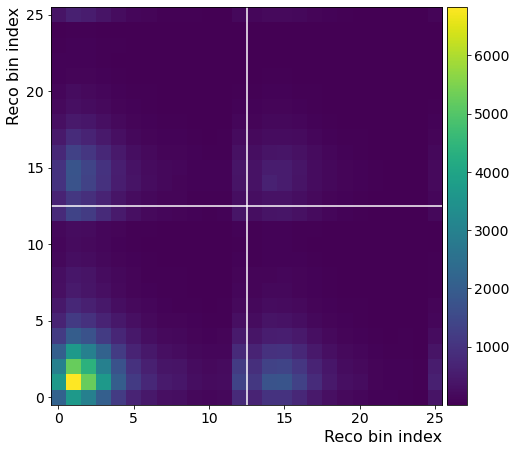

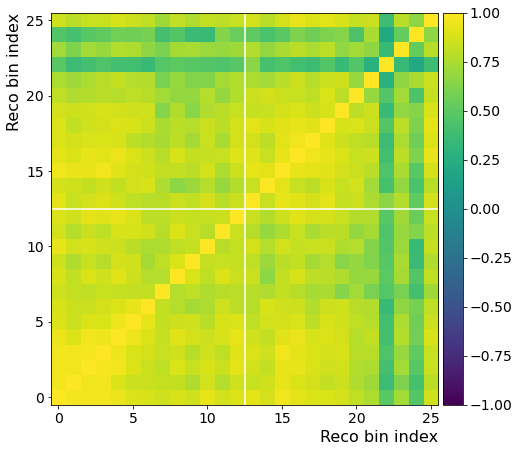

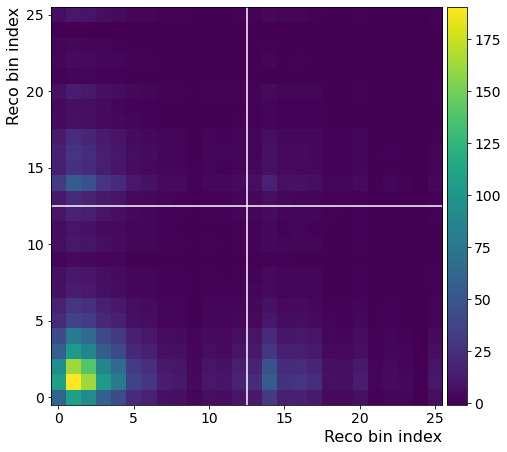

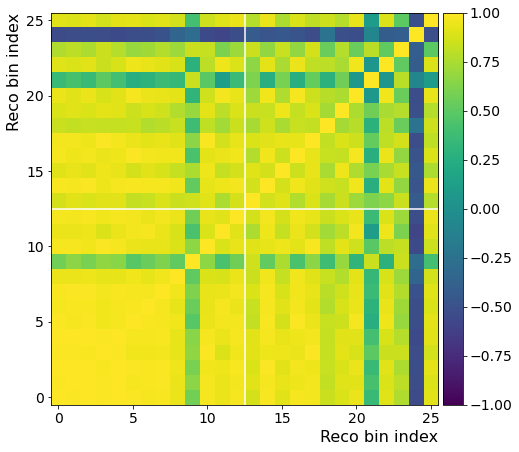

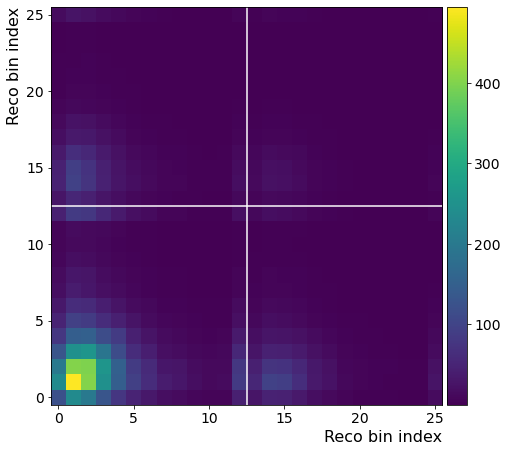

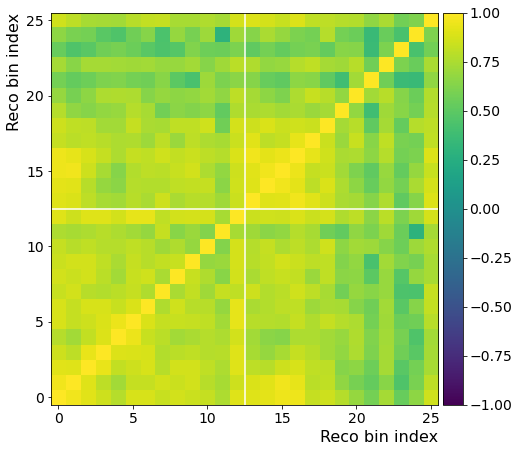

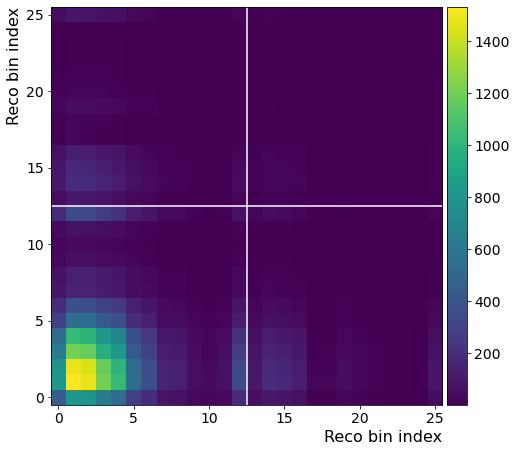

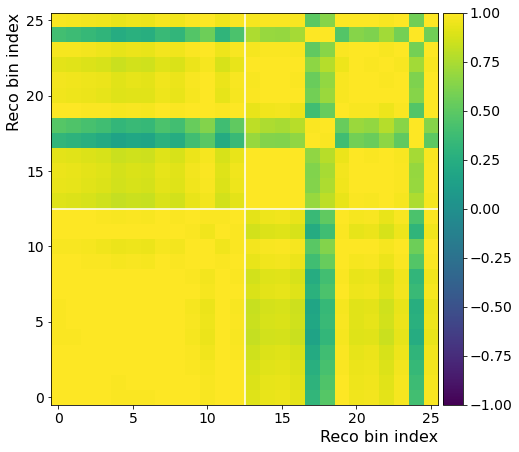

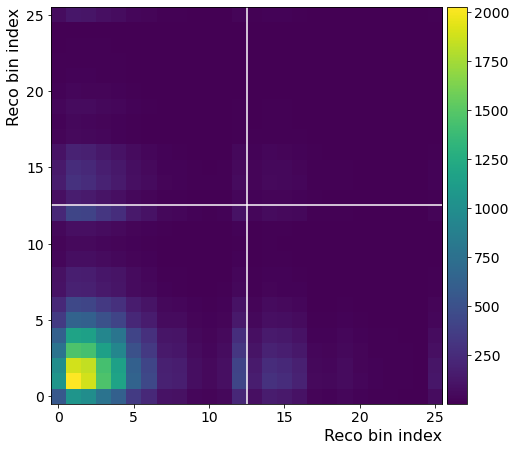

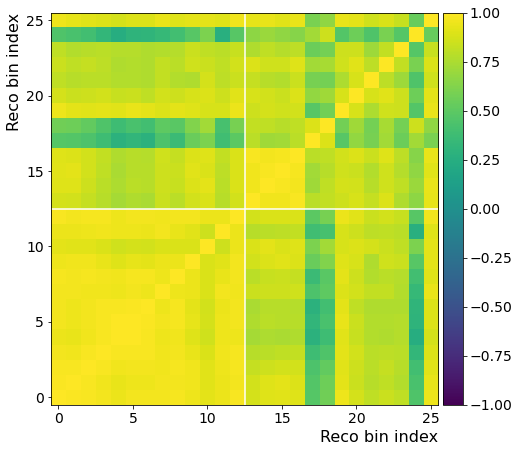

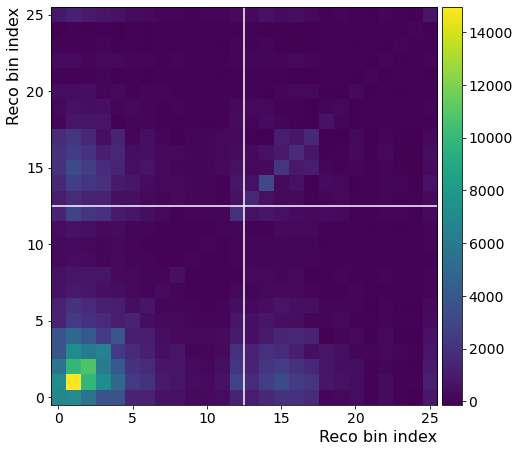

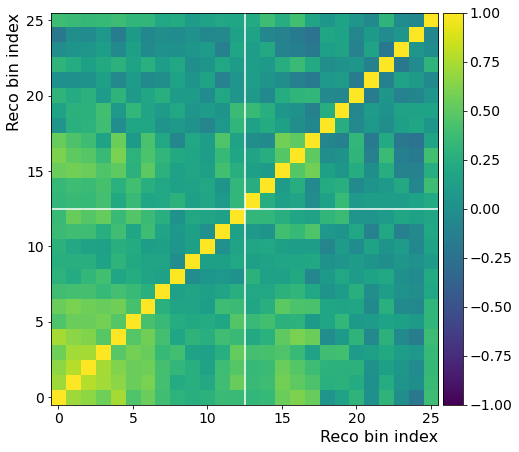

In [278]:
folder = 'diff_0p_mom_rwNEW'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.218495, 0.394432, 0.370029, 0.309285, 0.257562, 0.195226, 0.128997, 0.0444582]
y = [0.376528, 0.632486, 0.528578, 0.380064, 0.260571, 0.150692, 0.0693169, 0.0168981]
yerr_stat = [0.0450622, 0.070962, 0.0540955, 0.0388826, 0.0333453, 0.0262235, 0.0197281, 0.00959076]
yerr_tot = [0.120046, 0.197293, 0.161469, 0.120428, 0.0969785, 0.0736087, 0.0542474, 0.0244294]
yerr_sys = [0.111268, 0.184089, 0.152138, 0.113978, 0.0910654, 0.0687792, 0.050533, 0.022468]
chi2 = '5.74639'

frac_err_stat = [0.119678, 0.112195, 0.102342, 0.102306, 0.12797, 0.17402, 0.284608, 0.567564]
frac_err_mcstat = [0.0609735, 0.0572172, 0.0524161, 0.0522553, 0.0642697, 0.0867514, 0.143542, 0.289107]
frac_err_dirt = [0.0101873, 0.00924303, 0.00780299, 0.0064162, 0.00694972, 0.0103998, 0.0198727, 0.0394472]
frac_err_flux = [0.0666409, 0.0681069, 0.0713363, 0.077887, 0.0924978, 0.128481, 0.224055, 0.416559]
frac_err_det = [0.183176, 0.172539, 0.160267, 0.163112, 0.201261, 0.26366, 0.430242, 0.889209]
frac_err_geant4 = [0.0308722, 0.0311674, 0.0311447, 0.0310717, 0.0321374, 0.0370018, 0.050542, 0.0745102]
frac_err_genie = [0.160152, 0.157782, 0.153241, 0.149798, 0.15406, 0.175647, 0.258625, 0.485635]
frac_err_rw = [0.059828, 0.0599588, 0.0608806, 0.0656854, 0.0781261, 0.102676, 0.148347, 0.212398]
frac_err_rw_cor = [0.123809, 0.132231, 0.145261, 0.163624, 0.195005, 0.268141, 0.428609, 0.657286]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1.75)
yrange2 = (0, 3)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_mom_0p.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value)

save_name = folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov, weighted_bin=False, save_name=save_name, generator=gen_smear)
                  
                  
cf.chi2_decomposition(GENIE_y, y, unfcov, save_name=save_name)
cf.visualize_xs_matrix(folder, ch=2, make_plots=True, save_name=save_name)                              

### Momentum Np, 2ch

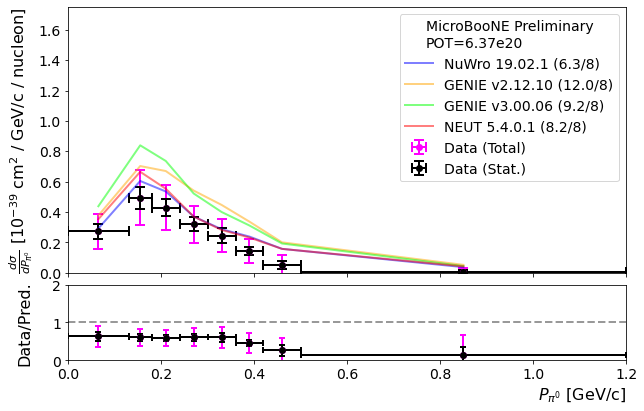

8.99571846380486


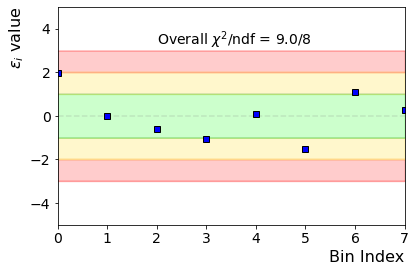

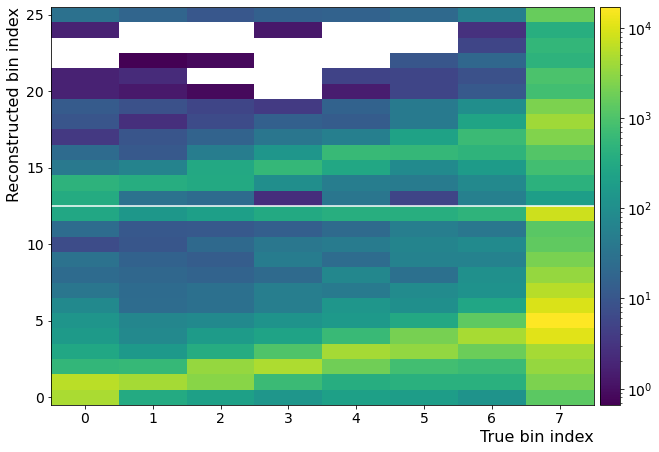

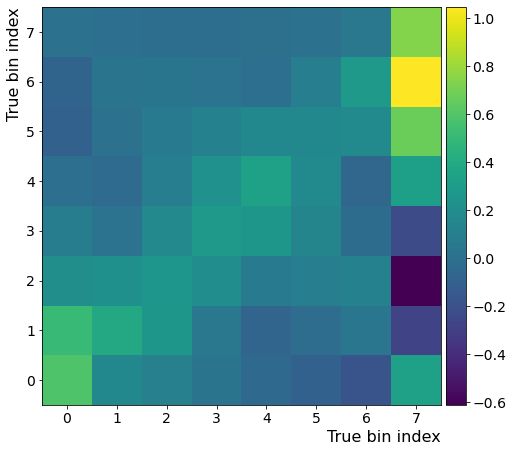

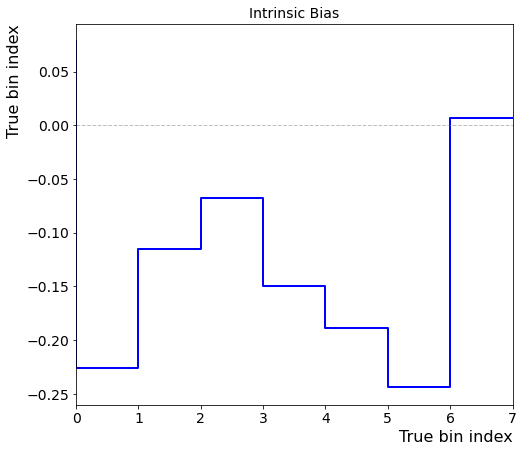

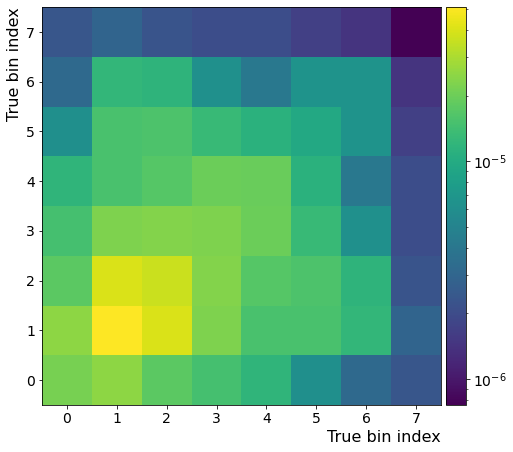

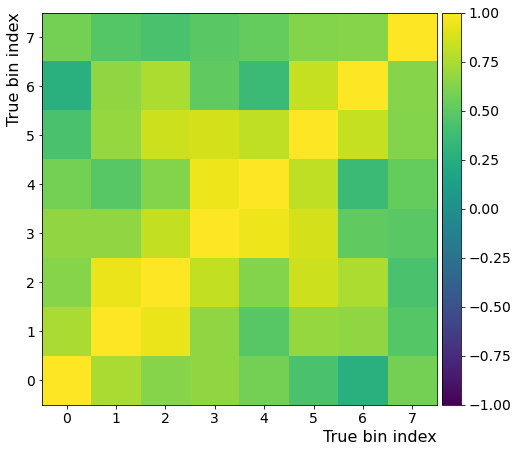

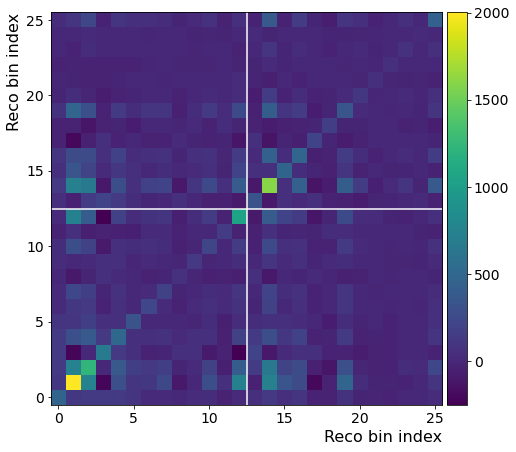

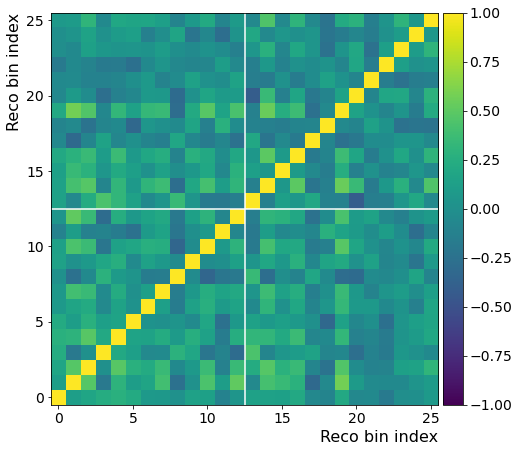

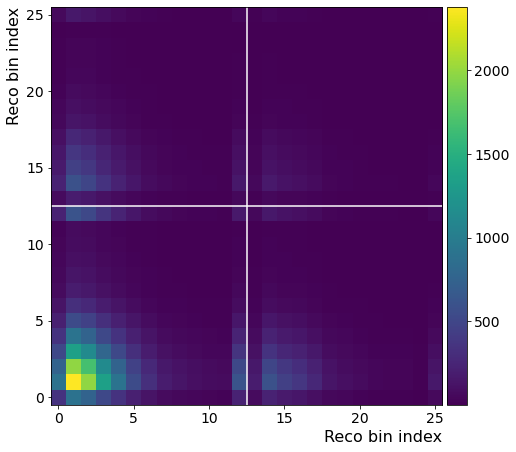

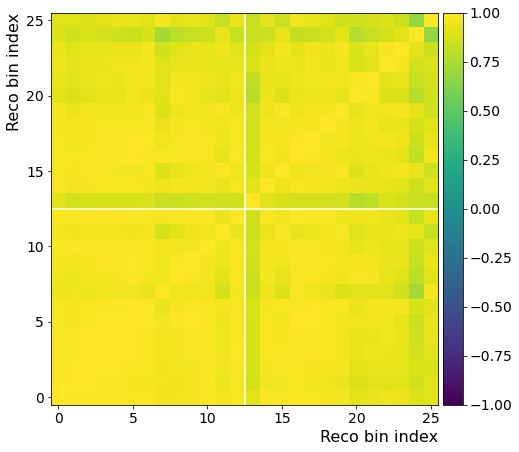

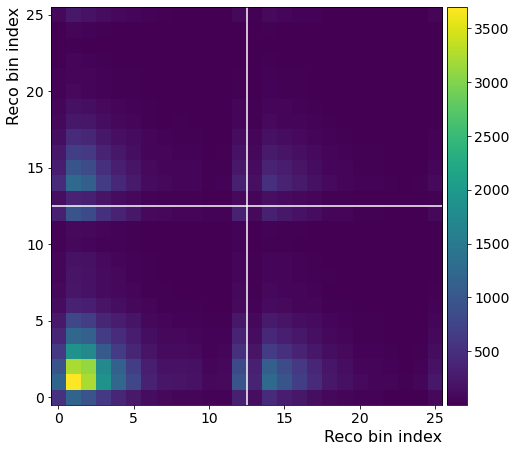

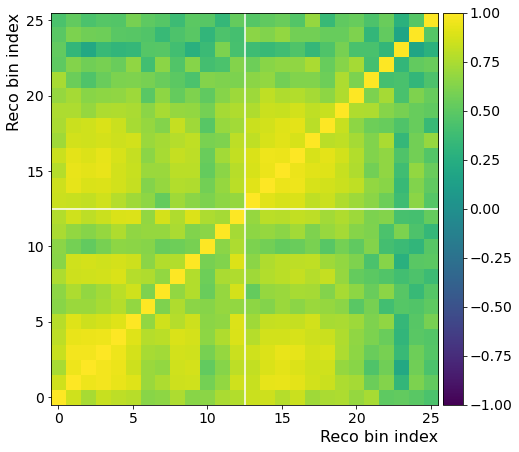

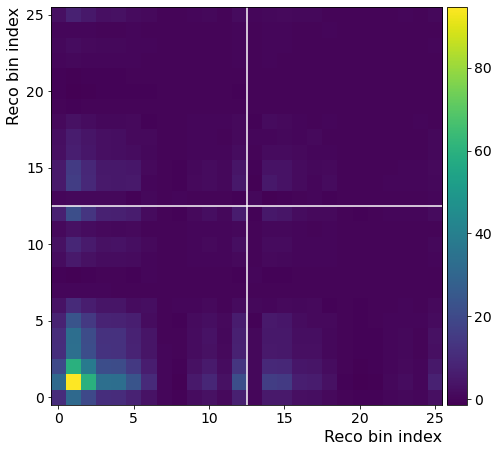

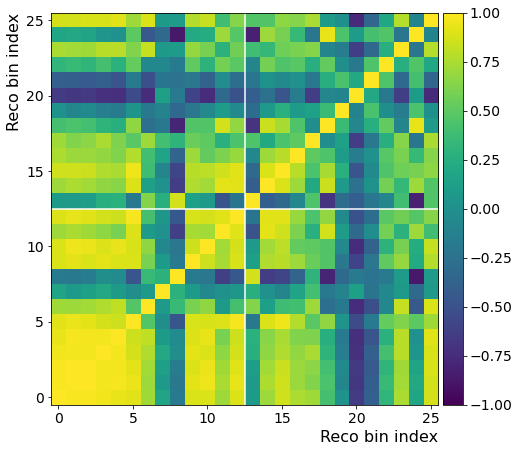

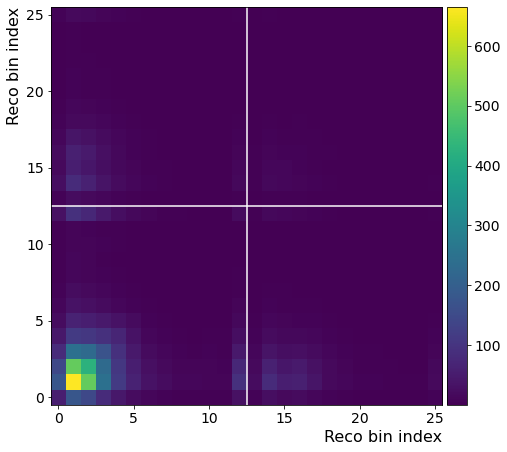

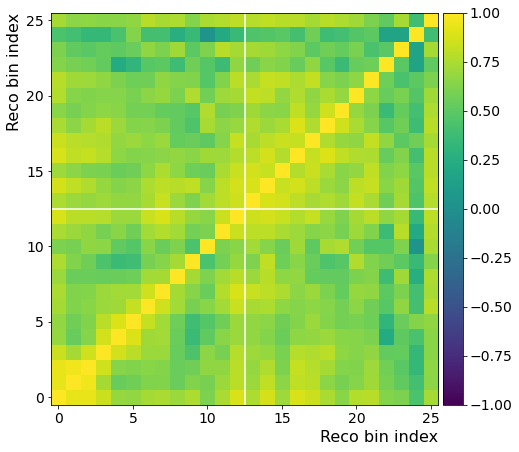

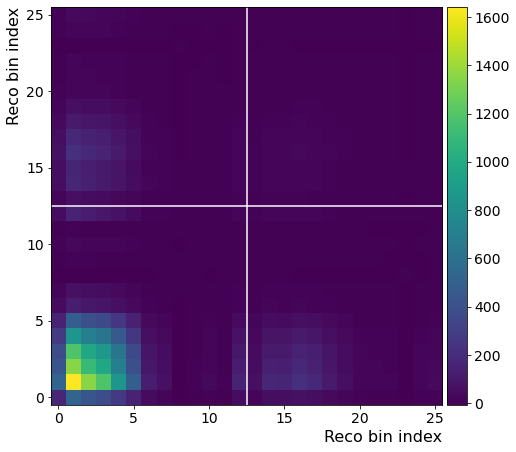

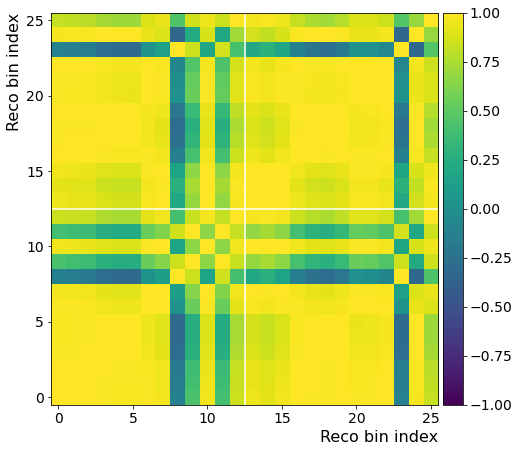

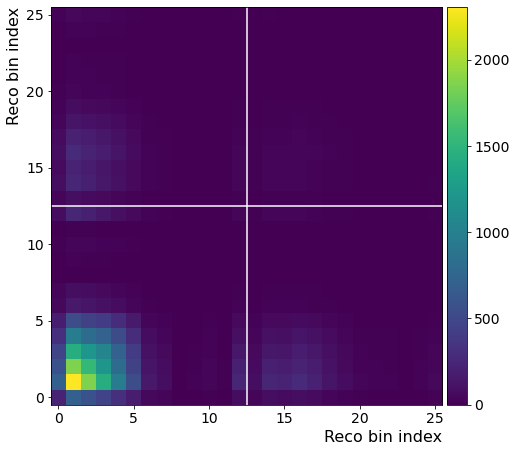

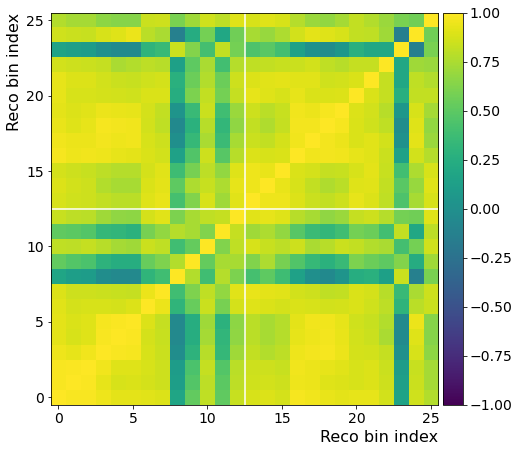

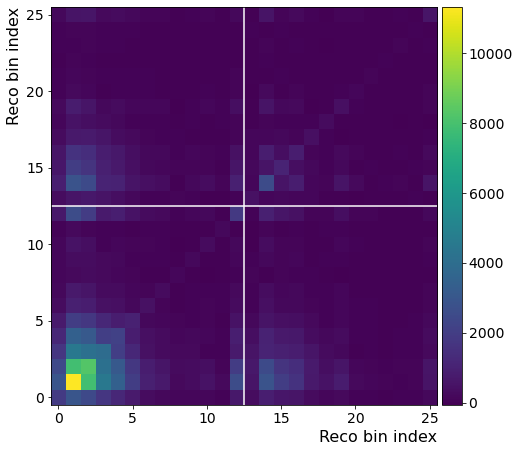

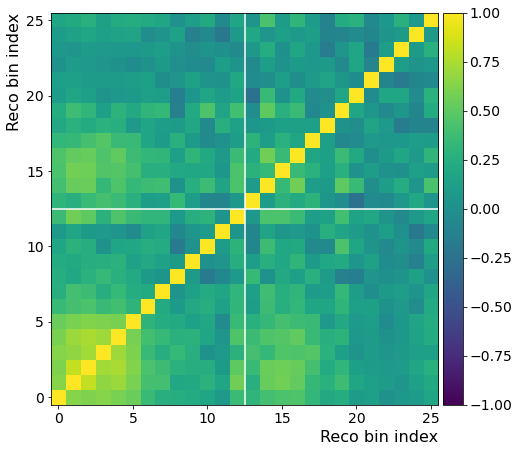

In [240]:
folder = 'diff_Np_mom_rwNEW'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.425048, 0.817944, 0.723201, 0.518494, 0.400552, 0.309431, 0.189167, 0.0424805]
y = [0.271233, 0.493952, 0.428938, 0.31776, 0.243187, 0.142198, 0.0497499, 0.00621702]
yerr_stat = [0.0497835, 0.0730823, 0.0548407, 0.046128, 0.0484663, 0.0272237, 0.0273497, 0.00877669]
yerr_tot = [0.116356, 0.178655, 0.150715, 0.119266, 0.110405, 0.0778165, 0.0644054, 0.0217853]
yerr_sys = [0.105169, 0.163023, 0.140383, 0.109984, 0.0991985, 0.0728991, 0.0583099, 0.0199391]
chi2 = '8.99579'

frac_err_stat = [0.183545, 0.147954, 0.127852, 0.145166, 0.199296, 0.19145, 0.549744, 1.41172]
frac_err_mcstat = [0.091957, 0.0725048, 0.0638171, 0.0722036, 0.0990176, 0.0974359, 0.282861, 0.747949]
frac_err_dirt = [0.00681344, 0.00636844, 0.00488591, 0.00442165, 0.00493394, 0.00509634, 0.0146477, 0.0229462]
frac_err_flux = [0.166192, 0.13167, 0.129071, 0.148982, 0.17143, 0.209758, 0.391793, 1.38191]
frac_err_det = [0.239324, 0.183541, 0.161989, 0.170732, 0.233016, 0.235656, 0.679262, 2.01201]
frac_err_geant4 = [0.0387024, 0.0379099, 0.0339469, 0.0261303, 0.0222896, 0.0405351, 0.106888, 0.243876]
frac_err_genie = [0.17527, 0.143693, 0.154255, 0.165268, 0.181057, 0.244229, 0.502004, 1.44138]
frac_err_rw = [0.108587, 0.101621, 0.0984357, 0.101116, 0.107712, 0.124181, 0.221654, 0.542164]
frac_err_rw_cor = [0.113739, 0.142098, 0.159622, 0.158121, 0.167325, 0.277593, 0.605011, 1.15638]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1.75)
yrange2 = (0, 2)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_mom_Np.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value)

save_name = folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov, weighted_bin=False, save_name=save_name, generator=gen_smear)
                  
                  
cf.chi2_decomposition(GENIE_y, y, unfcov, save_name=save_name)
cf.visualize_xs_matrix(folder, ch=2, make_plots=True, save_name=save_name)                

### Costheta Xp

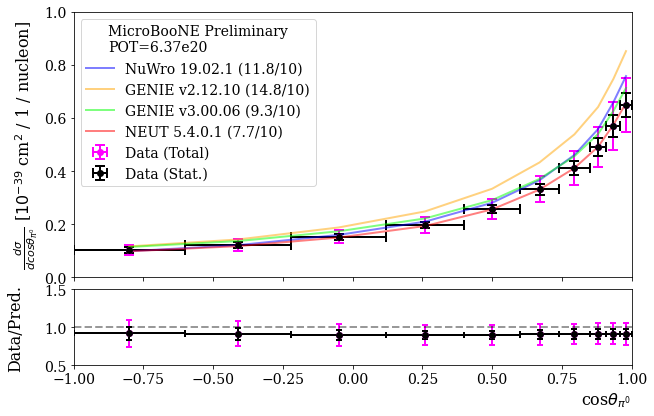

stat/sys = 
[0.57, 0.537, 0.486, 0.447, 0.448, 0.474, 0.492, 0.501, 0.505, 0.507]


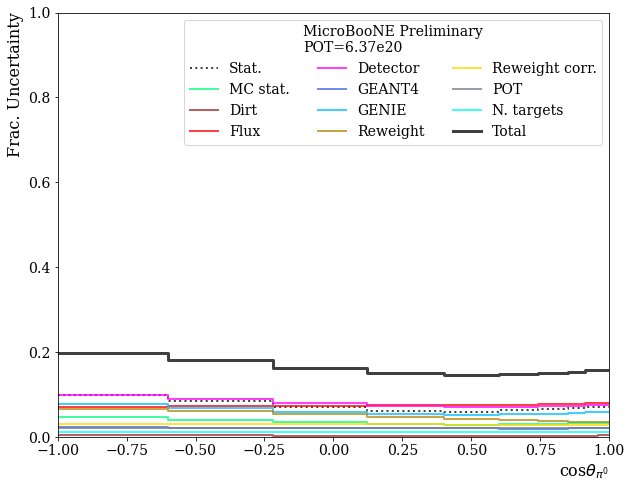

In [465]:
folder = 'diff_Xp_cos_rwNEW___new0p'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.111682, 0.133662, 0.170316, 0.2186, 0.2873, 0.367106, 0.452388, 0.535895, 0.622351, 0.708175]
y = [0.102408, 0.121817, 0.153201, 0.196021, 0.258191, 0.331794, 0.411713, 0.489609, 0.569569, 0.648664]
yerr_stat = [0.0100829, 0.0104938, 0.0109642, 0.0120692, 0.0155242, 0.0211199, 0.0275501, 0.033804, 0.0402662, 0.0465226]
yerr_tot = [0.0201968, 0.0219925, 0.0248182, 0.0291771, 0.037407, 0.0486688, 0.0615284, 0.0745549, 0.0882663, 0.101632]
yerr_sys = [0.0174998, 0.0193275, 0.0222649, 0.0265639, 0.0340336, 0.0438475, 0.0550158, 0.0664509, 0.0785466, 0.0903591]
chi2 = '8.78488'

frac_err_stat = [0.0984585, 0.0861437, 0.071567, 0.0615711, 0.0601269, 0.0636535, 0.0669158, 0.0690429, 0.070696, 0.0717206]
frac_err_mcstat = [0.0469851, 0.0413131, 0.0347239, 0.0300425, 0.0290667, 0.0303503, 0.0316183, 0.0325025, 0.0332423, 0.0337132]
frac_err_dirt = [0.00399284, 0.00377408, 0.00357343, 0.00347225, 0.00353644, 0.00366749, 0.00372581, 0.00373888, 0.00376313, 0.00378609]
frac_err_flux = [0.0711743, 0.0722023, 0.0739955, 0.0748377, 0.0754078, 0.0761378, 0.0770435, 0.078171, 0.0791601, 0.0797101]
frac_err_det = [0.100208, 0.0904628, 0.0798223, 0.0724405, 0.0703229, 0.0714108, 0.0727267, 0.0739186, 0.0750974, 0.0758928]
frac_err_geant4 = [0.0228801, 0.0221021, 0.0215845, 0.0208466, 0.0202705, 0.0200678, 0.0202318, 0.0204997, 0.0207463, 0.0208934]
frac_err_genie = [0.0772749, 0.0692659, 0.0601872, 0.0543562, 0.0527192, 0.0533194, 0.0546914, 0.0567228, 0.0587979, 0.060084]
frac_err_rw = [0.066641, 0.061826, 0.0548855, 0.0479096, 0.0427872, 0.0395194, 0.0375805, 0.0365611, 0.036054, 0.0358389]
frac_err_rw_cor = [0.0305641, 0.0307647, 0.0309012, 0.0302811, 0.0294168, 0.0287378, 0.0283692, 0.0283037, 0.0283768, 0.0284465]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Cos
xlabel = r'cos$\theta_{\pi^{0}}$'
ylabel = r'$\frac{d\sigma}{dcos\theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1)
yrange2 = (0.5, 1.5)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_cos_Xp.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value)

save_name = None#folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov, weighted_bin=False, save_name=save_name, generator=gen_smear)
yrange = (0, 1)
ylabel='Frac. Uncertainty'
cf.plot_single_xs_err(edges, POT_bnb, xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                       frac_err_det, frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor,
                       #xrange, yrange, weighted_bin=False, save_name=save_name+'_frac_unc')
                       xrange, yrange, weighted_bin=False, save_name=None)

In [466]:
first = 5
last = 10
print(cf.calc_GoF(gen_smear['nuwro'][first:last], y[first:last], unfcov[first:last,first:last]))
print(cf.calc_GoF(gen_smear['geniev2'][first:last], y[first:last], unfcov[first:last,first:last]))
print(cf.calc_GoF(gen_smear['geniev3'][first:last], y[first:last], unfcov[first:last,first:last]))
print(cf.calc_GoF(gen_smear['neut'][first:last], y[first:last], unfcov[first:last,first:last]))
print('dof = '+str(len(y[first:last])))

3.918864066465403
5.81308467165627
2.447655099491385
1.5507726550362833
dof = 5


11.78848763037557


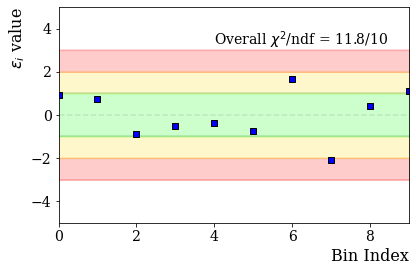

14.772995949455861


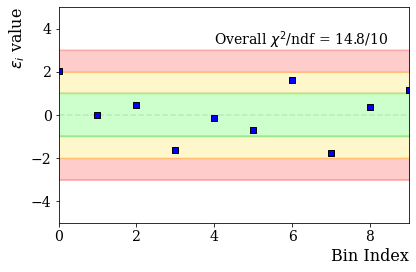

9.25194465933137


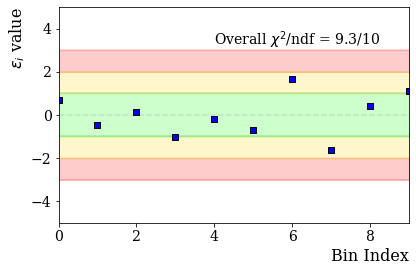

7.6824812837308425


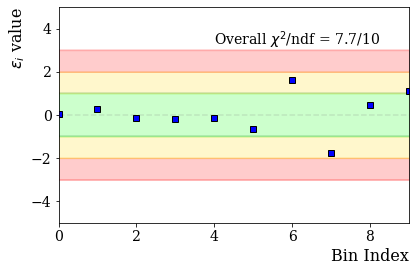

/mnt/c/Users/Giacomo/Dropbox/Wirecell_related/NCpi0_training/custom_functions.py:808: RuntimeWarning: invalid value encountered in true_divide
  corr = cov / outer_v


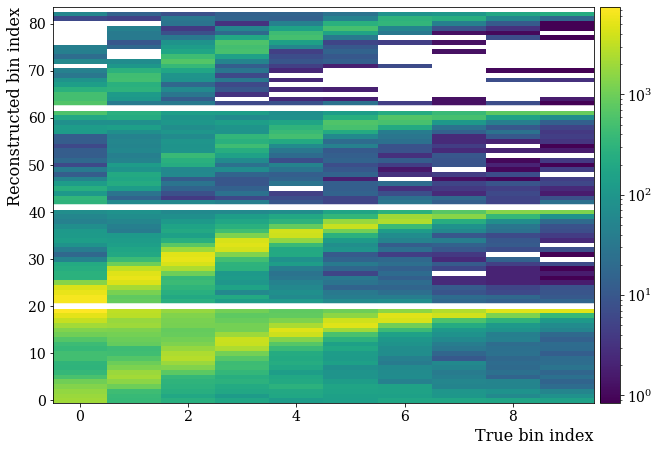

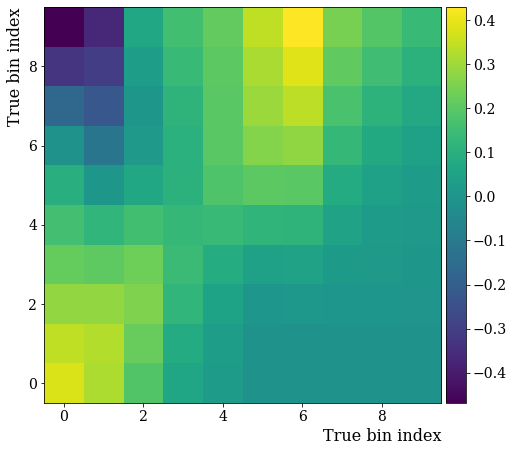

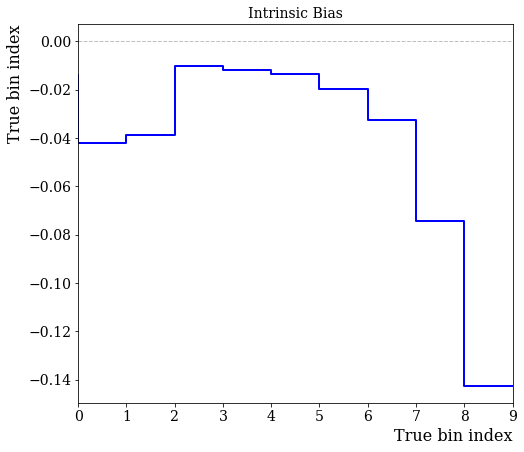

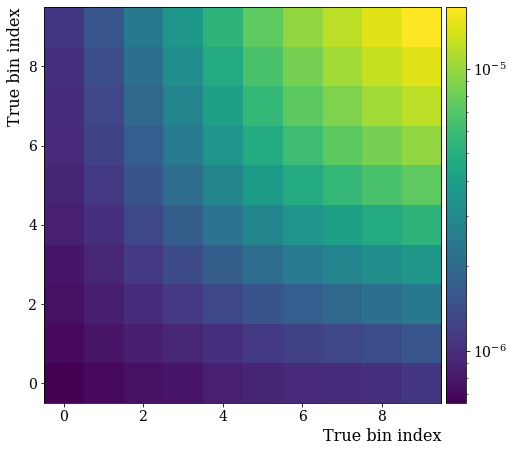

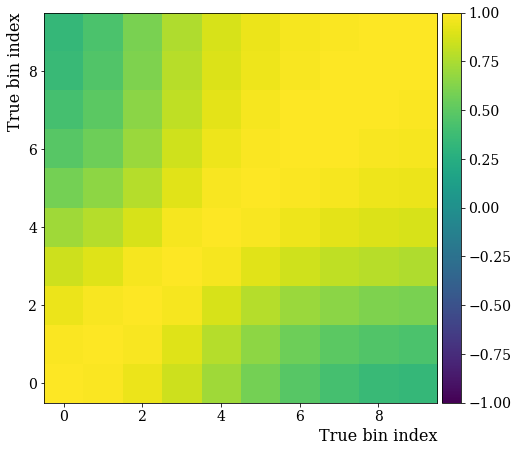

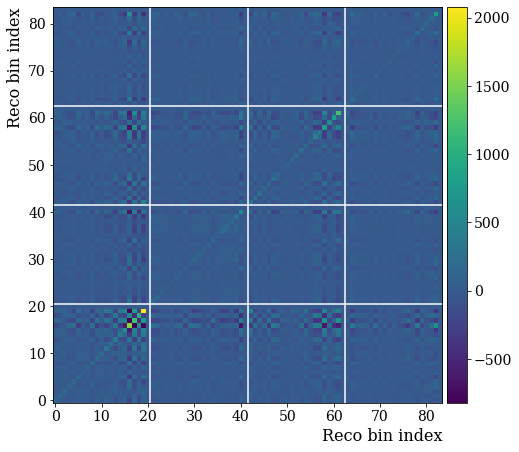

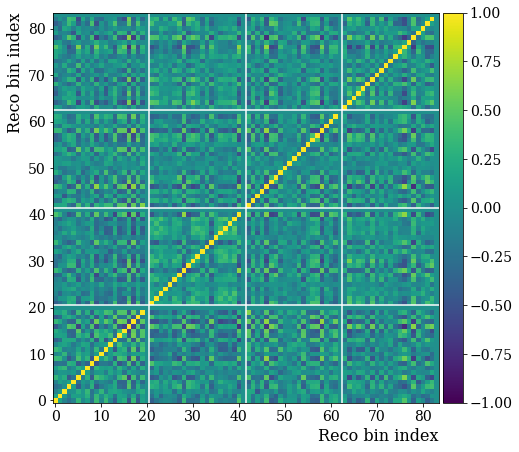

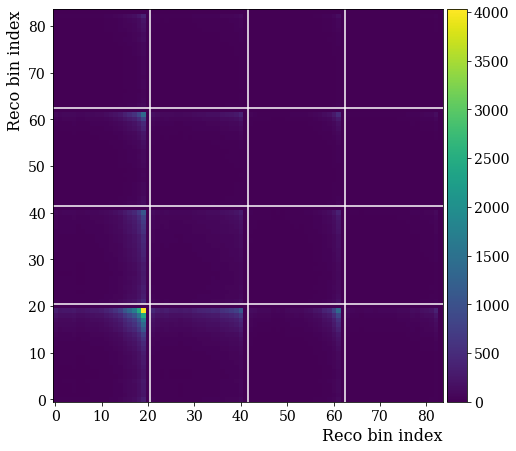

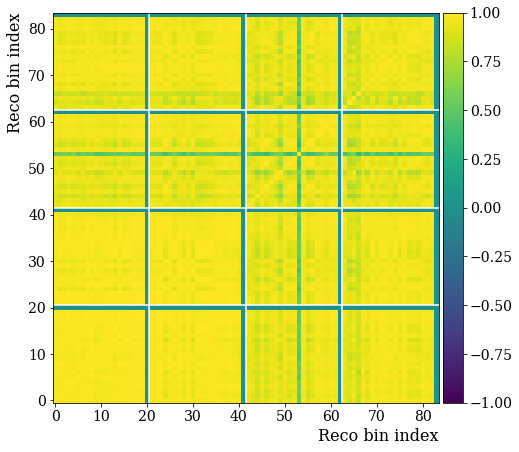

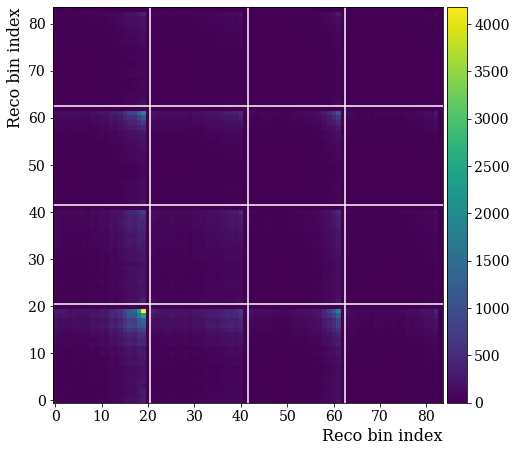

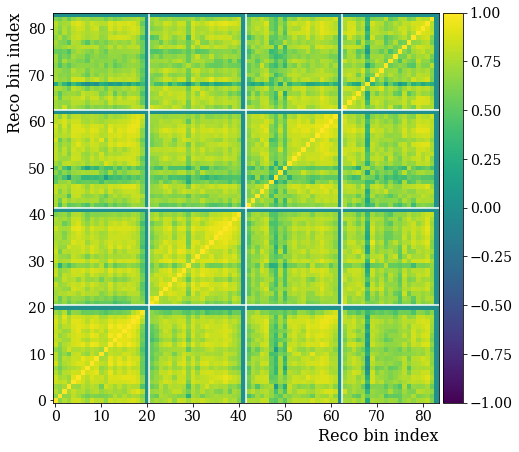

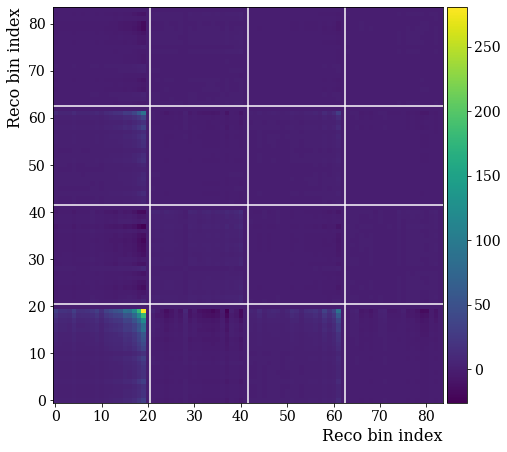

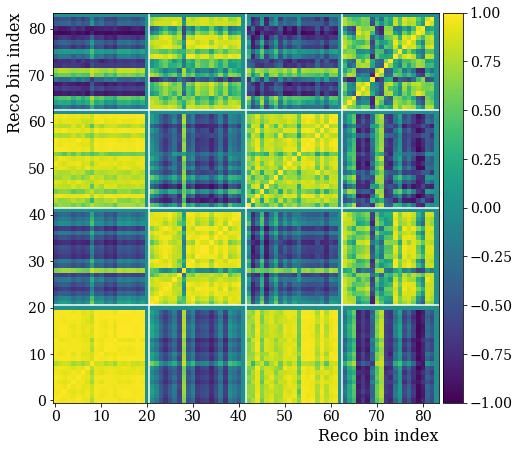

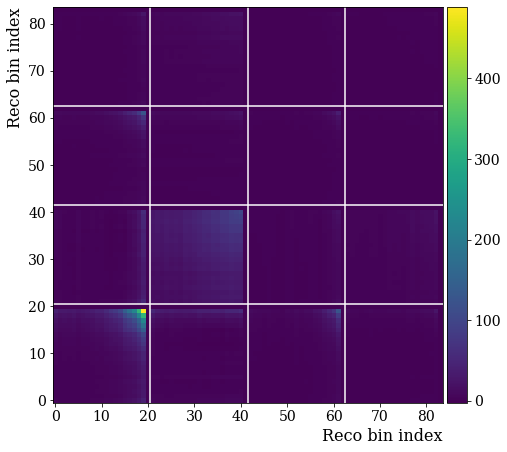

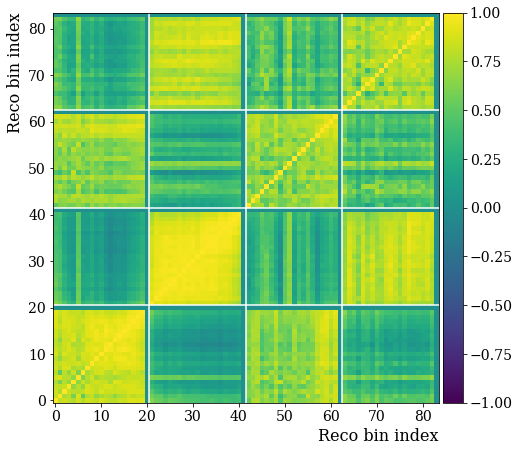

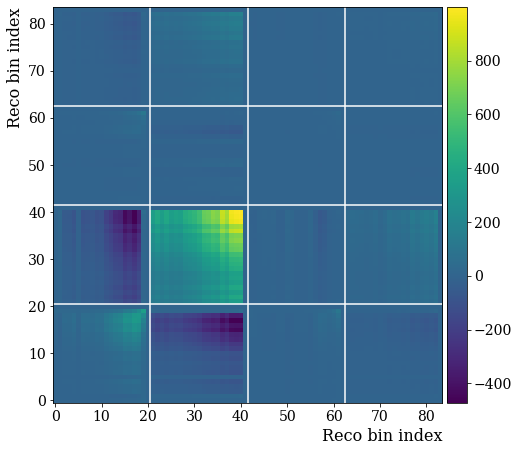

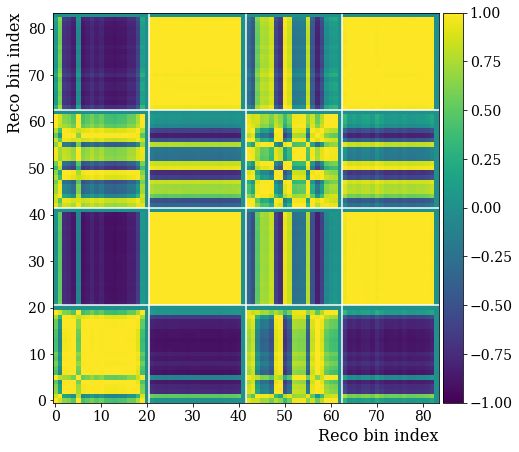

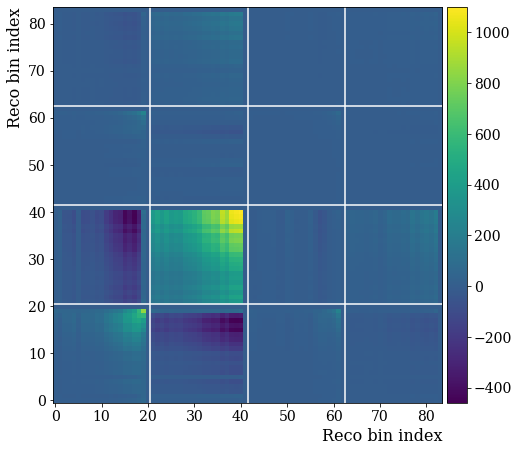

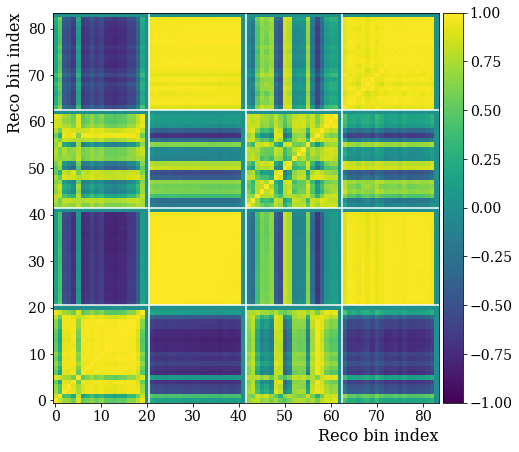

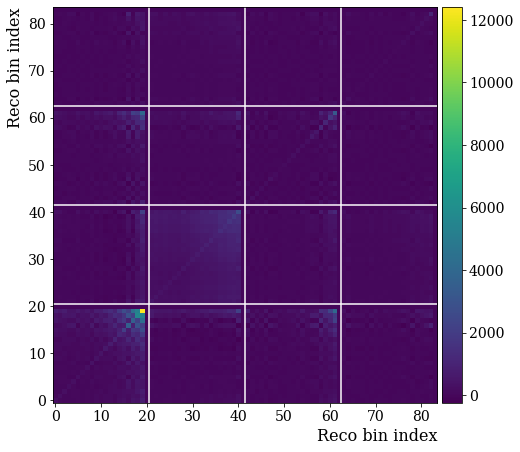

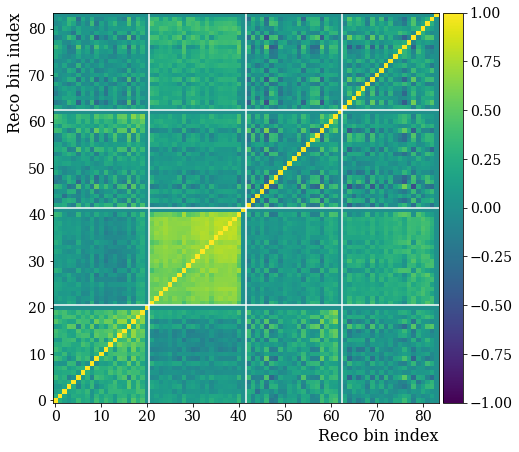

In [452]:
cf.chi2_decomposition(gen_smear['nuwro'], y, unfcov, save_name=save_name+'_nuwro')
cf.chi2_decomposition(gen_smear['geniev2'], y, unfcov, save_name=save_name+'_geniev2')
cf.chi2_decomposition(gen_smear['geniev3'], y, unfcov, save_name=save_name+'_geniev3')
cf.chi2_decomposition(gen_smear['neut'], y, unfcov, save_name=save_name+'_neut')
cf.visualize_xs_matrix(folder, ch=4, make_plots=True, save_name=save_name)

### Costheta 0p, Costheta Np

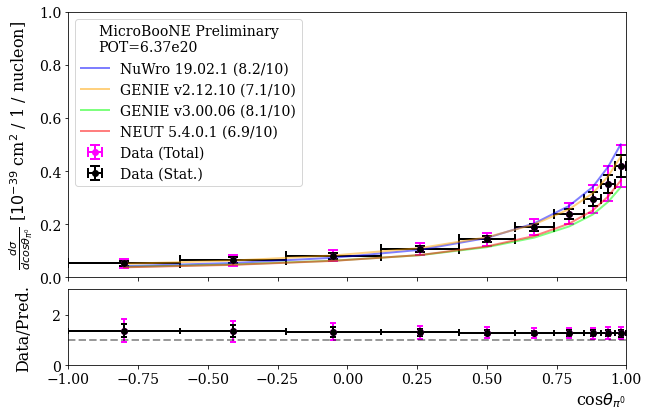

stat/sys = 
[0.692, 0.681, 0.653, 0.604, 0.548, 0.533, 0.558, 0.585, 0.602, 0.609]


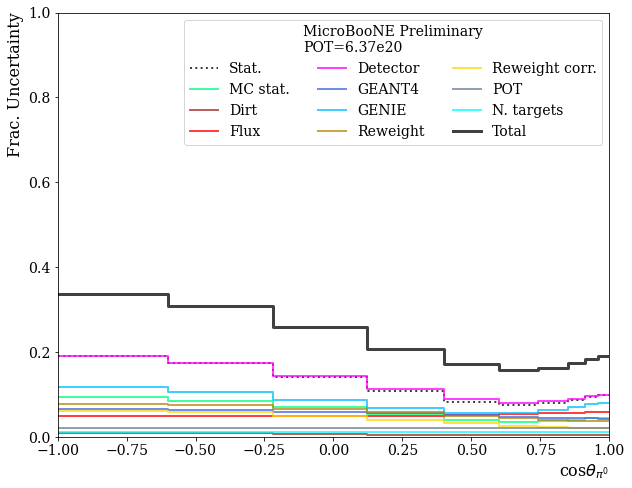

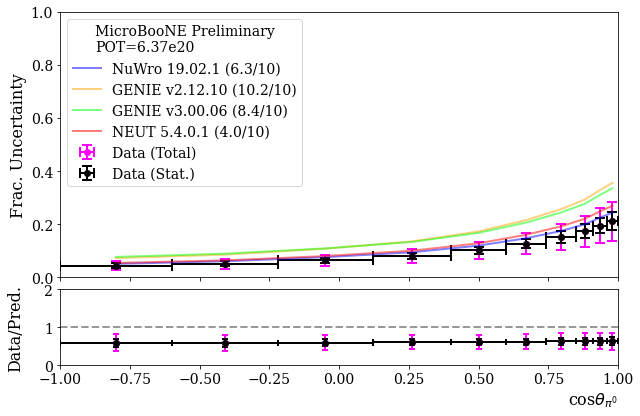

stat/sys = 
[0.539, 0.514, 0.473, 0.439, 0.431, 0.444, 0.465, 0.483, 0.496, 0.503]


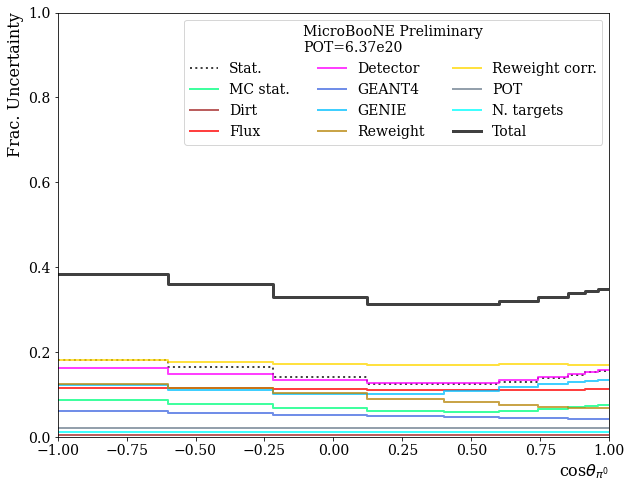

In [472]:
folder = 'diff_0pNp_cos_rwNEW___new0p'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.038395, 0.0475842, 0.0618901, 0.0822788, 0.112151, 0.147655, 0.189091, 0.233387, 0.280366, 0.334236, 0.0753136, 0.0873492, 0.107297, 0.131632, 0.165832, 0.204608, 0.242355, 0.27553, 0.309038, 0.334394]
y = [0.0521631, 0.0638465, 0.0814436, 0.10641, 0.143419, 0.187834, 0.239799, 0.294697, 0.352433, 0.419035, 0.0439298, 0.0512044, 0.0637326, 0.0797511, 0.101578, 0.126727, 0.151798, 0.173562, 0.194932, 0.210953]
yerr_stat = [0.010023, 0.0110851, 0.0115738, 0.0114464, 0.0118036, 0.0140166, 0.0191582, 0.026048, 0.0335979, 0.0415141, 0.0080227, 0.00842242, 0.00900837, 0.0100476, 0.0125897, 0.0165354, 0.0211316, 0.0255632, 0.0299062, 0.0330536]
yerr_tot = [0.0175638, 0.0196397, 0.021078, 0.0219945, 0.0243074, 0.0294405, 0.0388504, 0.0510625, 0.0645904, 0.079135, 0.0168656, 0.0183728, 0.0210123, 0.0249194, 0.0317405, 0.0406017, 0.0499729, 0.0585833, 0.0670965, 0.0733782]
yerr_sys = [0.0144231, 0.0162124, 0.0176161, 0.0187813, 0.0212491, 0.0258898, 0.0337983, 0.043919, 0.0551643, 0.0673715, 0.0148353, 0.0163286, 0.0189833, 0.022804, 0.0291369, 0.0370821, 0.0452851, 0.0527117, 0.060063, 0.065512]
chi2 = '-3.05829e-05'
chi2_ch1 = '8.19052'
chi2_ch2 = '8.23904'
chi2 = [chi2_ch1,chi2_ch2]

frac_err_stat = [0.192148, 0.173621, 0.142109, 0.107569, 0.0823012, 0.074622, 0.0798927, 0.0883891, 0.0953311, 0.0990709, 0.182626, 0.164486, 0.141346, 0.125987, 0.123941, 0.130481, 0.139209, 0.147285, 0.153418, 0.156687]
frac_err_mcstat = [0.0942349, 0.0853677, 0.0702118, 0.0533678, 0.0404967, 0.0356742, 0.0373385, 0.0409776, 0.0440991, 0.0458042, 0.0867677, 0.0785082, 0.068128, 0.0610328, 0.0597963, 0.0625094, 0.0663518, 0.0700549, 0.072941, 0.0744985]
frac_err_dirt = [0.00967715, 0.00878197, 0.00727142, 0.00564409, 0.00450225, 0.0042062, 0.00448316, 0.00491787, 0.00529396, 0.00550371, 0.00482971, 0.00452782, 0.00426615, 0.0041976, 0.0043033, 0.0045486, 0.00478796, 0.00494255, 0.00503303, 0.00507449]
frac_err_flux = [0.0498563, 0.0494933, 0.0494943, 0.0503927, 0.0520287, 0.0538826, 0.0556926, 0.057379, 0.0586978, 0.0594221, 0.114675, 0.114533, 0.113522, 0.11166, 0.111185, 0.111131, 0.111282, 0.112076, 0.113075, 0.113707]
frac_err_det = [0.191667, 0.174123, 0.144619, 0.112814, 0.0895887, 0.0812376, 0.0841076, 0.0906651, 0.0965024, 0.0997623, 0.161582, 0.148306, 0.133815, 0.126332, 0.128, 0.134745, 0.142259, 0.149095, 0.154289, 0.157058]
frac_err_geant4 = [0.0656351, 0.063703, 0.0602759, 0.0560683, 0.0518831, 0.0484155, 0.046038, 0.0446328, 0.043871, 0.0435355, 0.0614546, 0.0576863, 0.0532221, 0.0494167, 0.0471985, 0.0456327, 0.0442278, 0.0431254, 0.0424097, 0.0420513]
frac_err_genie = [0.117381, 0.106399, 0.0880735, 0.0690985, 0.0573089, 0.0566648, 0.0631549, 0.0710355, 0.0772368, 0.0805347, 0.122914, 0.110903, 0.100991, 0.100678, 0.108823, 0.118043, 0.124694, 0.129252, 0.132336, 0.133902]
frac_err_rw = [0.0790291, 0.074673, 0.0670551, 0.0580971, 0.0500004, 0.0441325, 0.040651, 0.0389483, 0.0382372, 0.037997, 0.125565, 0.116348, 0.102847, 0.0905033, 0.0822123, 0.0762968, 0.0720568, 0.0695002, 0.0681663, 0.0676014]
frac_err_rw_cor = [0.0626463, 0.058234, 0.0505101, 0.0413821, 0.0328931, 0.0264978, 0.0226884, 0.0209606, 0.0204116, 0.0203161, 0.180506, 0.176722, 0.172212, 0.169772, 0.170614, 0.171321, 0.17104, 0.17064, 0.170424, 0.170301]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Cos
xlabel = r'cos$\theta_{\pi^{0}}$'
ylabel = r'$\frac{d\sigma}{dcos\theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1)
yrange2 = (0, 3)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_cos_0pNp.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value) 
                
n = int(len(y)/2)
N = int(len(y))        

gen_smear1 = {'nuwro':gen_smear['nuwro'][:n],
              'geniev2':gen_smear['geniev2'][:n],
              'geniev3':gen_smear['geniev3'][:n],
              'neut':gen_smear['neut'][:n]
             }
gen_smear2 = {'nuwro':gen_smear['nuwro'][n:],
              'geniev2':gen_smear['geniev2'][n:],
              'geniev3':gen_smear['geniev3'][n:],
              'neut':gen_smear['neut'][n:]
             }

# Used in separate chi_square
unfcov1 = np.zeros((n,n))
unfcov2 = np.zeros((n,n))
for ith in range(n):
    for jth in range(n): unfcov1[ith,jth] = unfcov[ith,jth]
for ith in range(n):
    for jth in range(n): unfcov2[ith,jth] = unfcov[n+ith,n+jth]

save_name = None#folder+'_0p'
cf.plot_single_xs(edges, GENIE_y[:n], y[:n], yerr_stat[:n], [x*z for x,z in zip(frac_err_tot[:n],y[:n])], yerr_sys[:n], chi2_ch1, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov1, weighted_bin=False, save_name=save_name, generator=gen_smear1)
yrange = (0, 1)
ylabel='Frac. Uncertainty'
cf.plot_single_xs_err(edges, POT_bnb, xlabel, ylabel, frac_err_stat[:n], frac_err_mcstat[:n], frac_err_dirt[:n], frac_err_flux[:n], 
                       frac_err_det[:n], frac_err_geant4[:n], frac_err_genie[:n], frac_err_rw[:n], frac_err_rw_cor[:n],
                       xrange, yrange, weighted_bin=False, save_name=None)
                       #xrange, yrange, weighted_bin=False, save_name=save_name+'_frac_unc')

yrange = (0, 1)
yrange2 = (0, 2)
save_name = None#folder+'_Np'
cf.plot_single_xs(edges, GENIE_y[n:], y[n:], yerr_stat[n:], [x*z for x,z in zip(frac_err_tot[n:],y[n:])], yerr_sys[n:], chi2_ch2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, yrange2, unfcov2, weighted_bin=False, save_name=save_name, generator=gen_smear2)

yrange = (0, 1)
ylabel='Frac. Uncertainty'
cf.plot_single_xs_err(edges, POT_bnb, xlabel, ylabel, frac_err_stat[n:], frac_err_mcstat[n:], frac_err_dirt[n:], frac_err_flux[n:], 
                       frac_err_det[n:], frac_err_geant4[n:], frac_err_genie[n:], frac_err_rw[n:], frac_err_rw_cor[n:],
                       xrange, yrange, weighted_bin=False, save_name=None)
                       #xrange, yrange, weighted_bin=False, save_name=save_name+'_frac_unc')

8.18642773503936


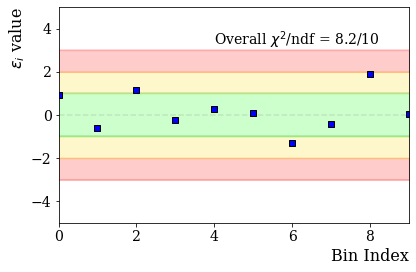

7.052242333322105


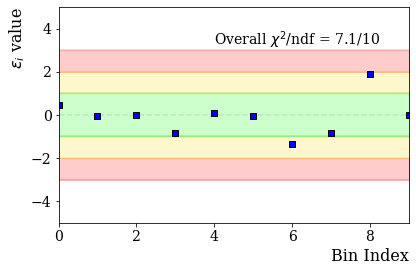

8.144025443206418


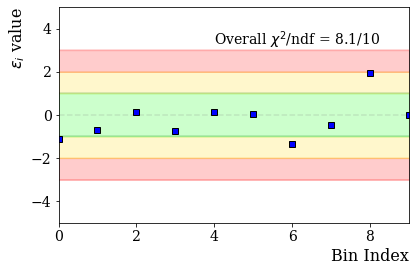

6.863525790237573


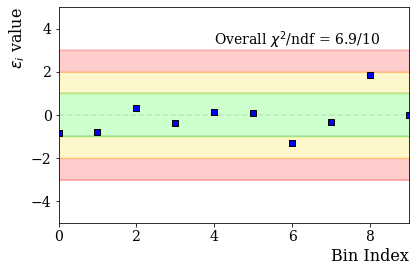

6.347073850271831


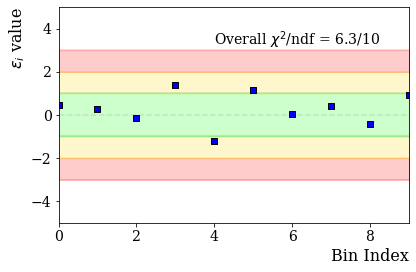

10.19083760479751


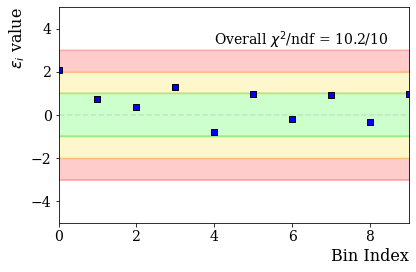

8.437174183145887


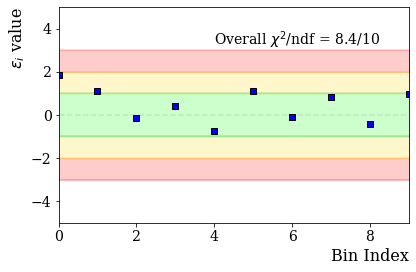

4.039674608608528


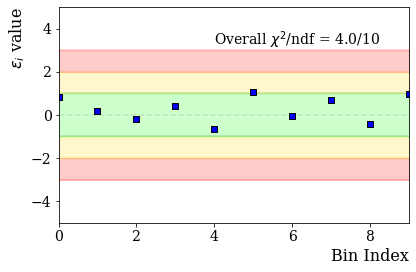

/mnt/c/Users/Giacomo/Dropbox/Wirecell_related/NCpi0_training/custom_functions.py:808: RuntimeWarning: invalid value encountered in true_divide
  corr = cov / outer_v


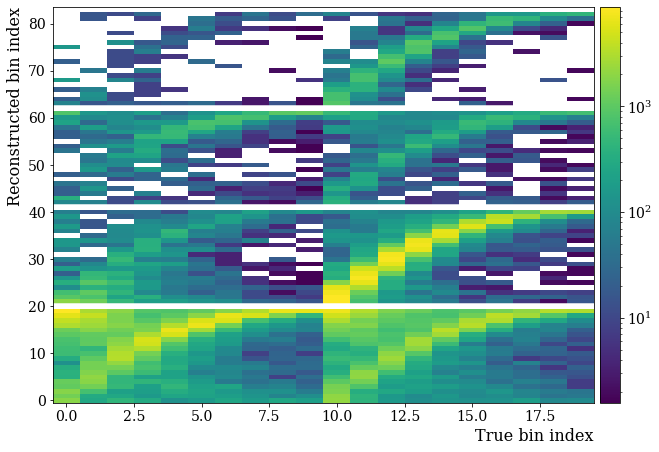

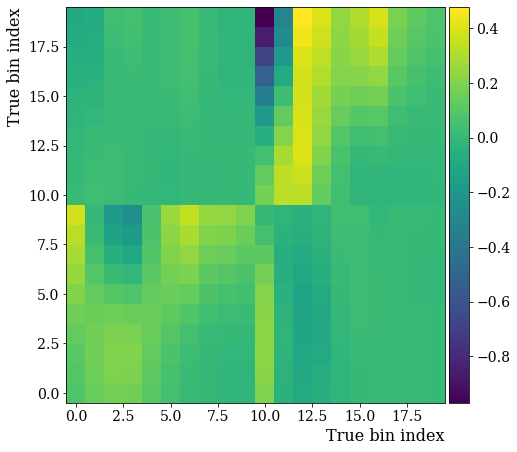

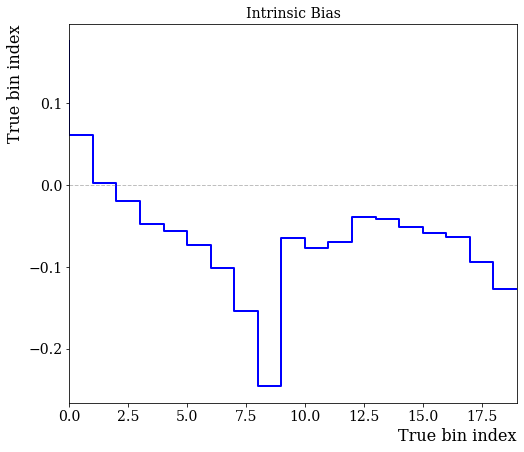

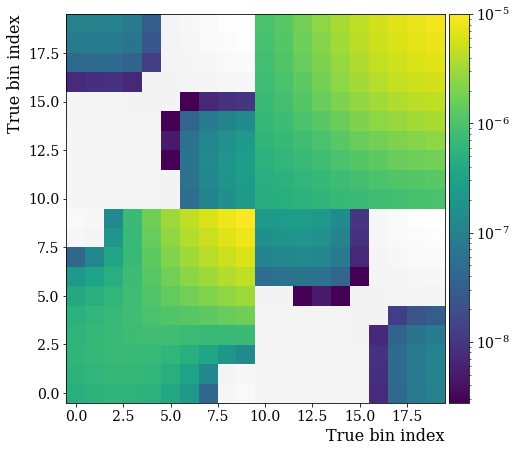

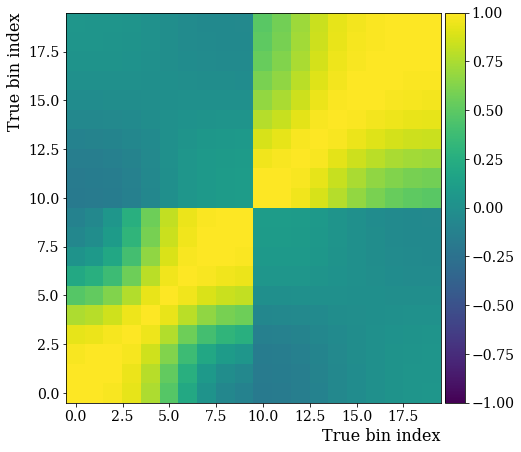

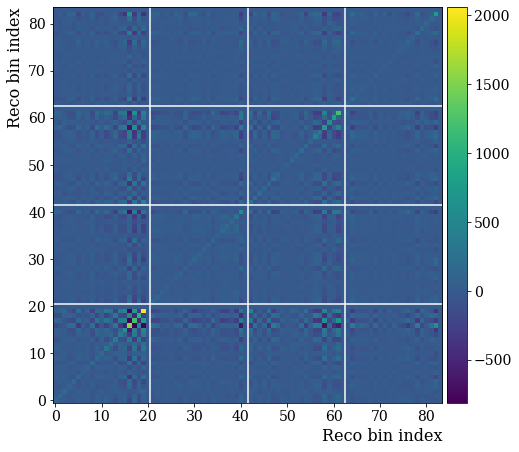

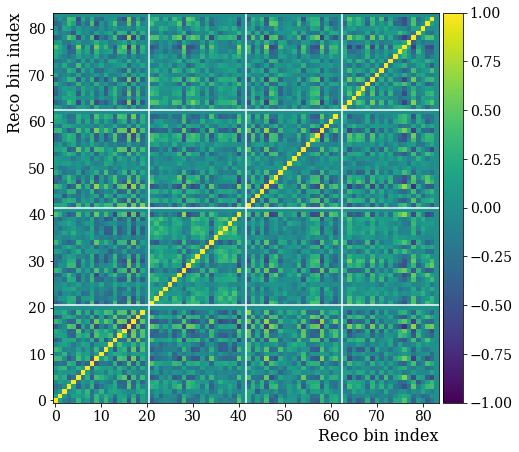

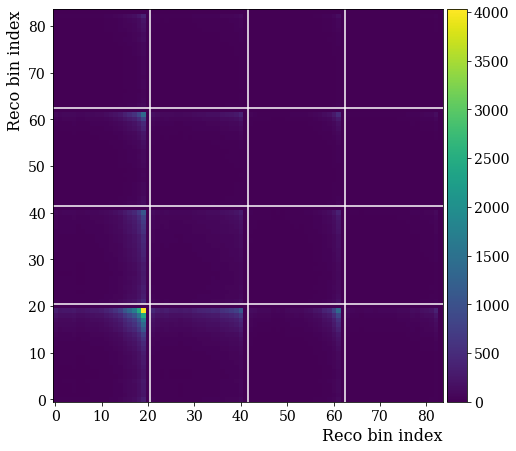

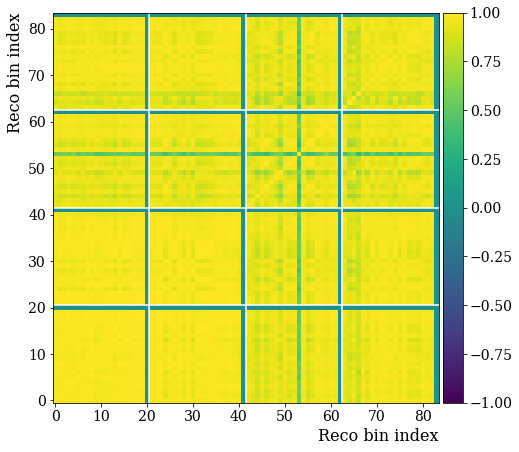

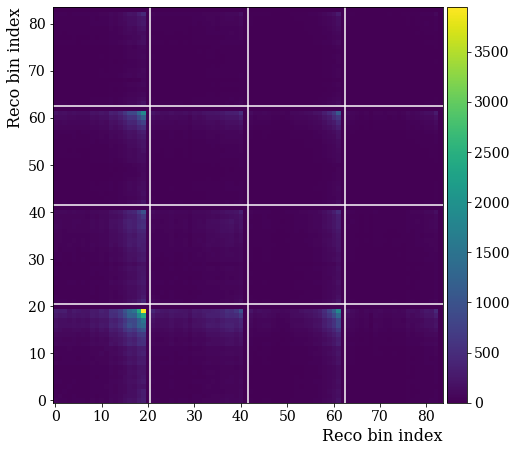

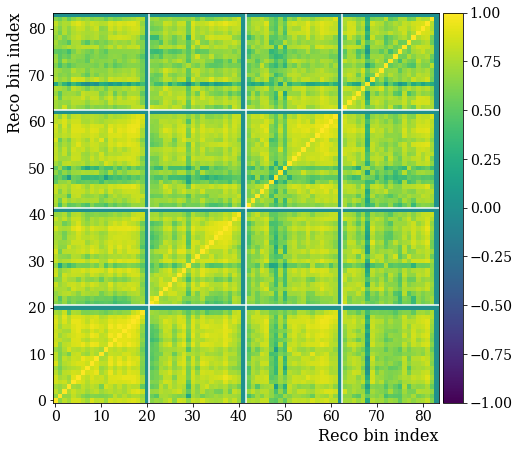

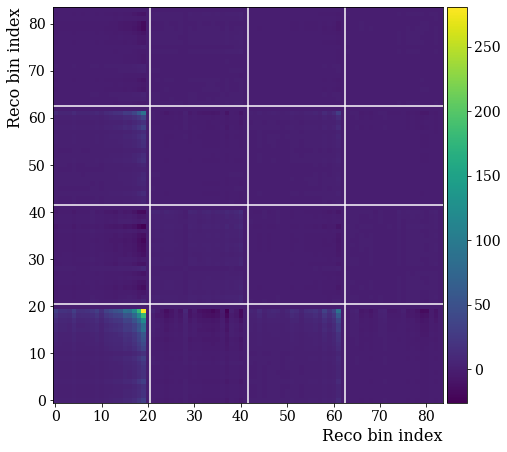

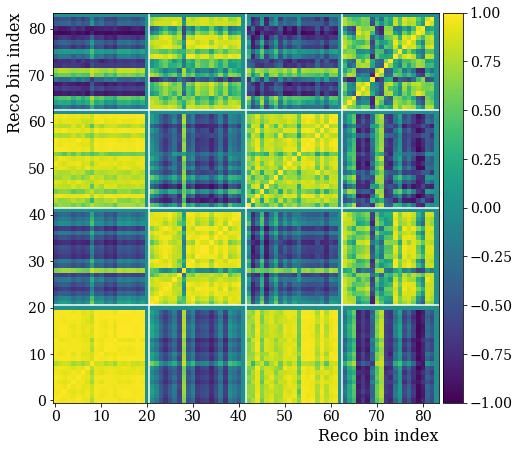

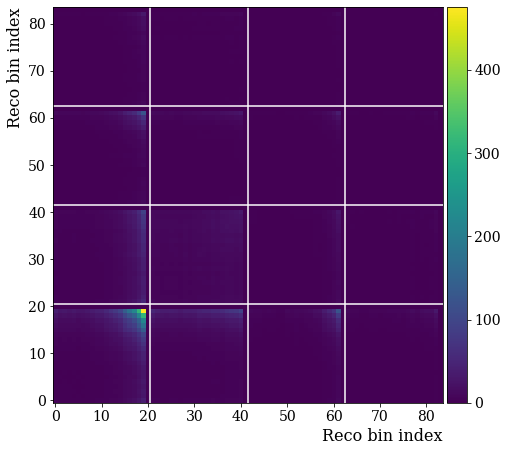

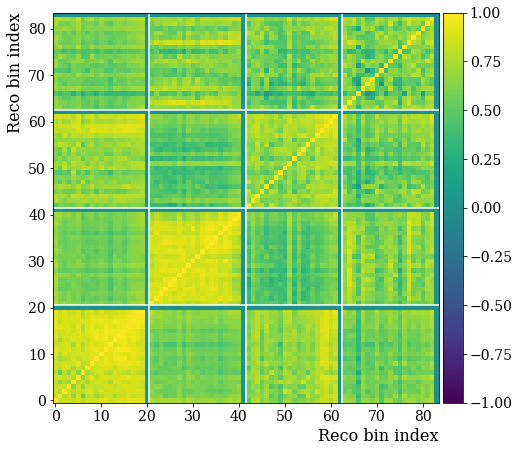

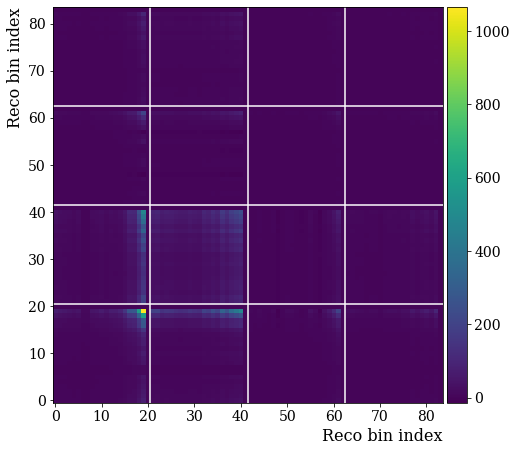

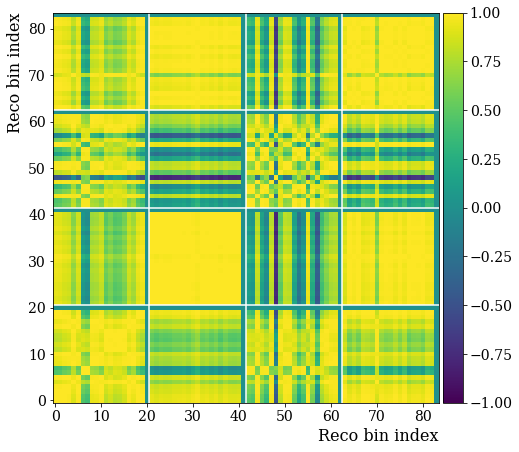

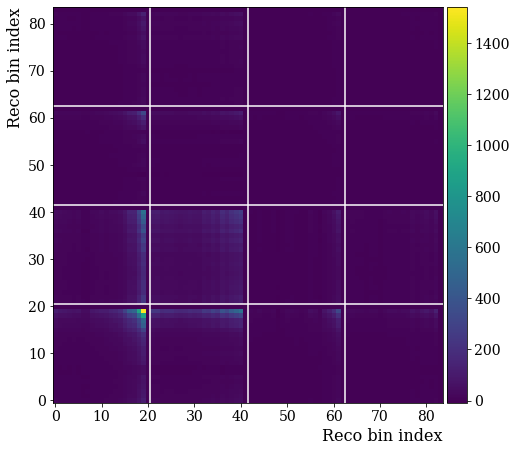

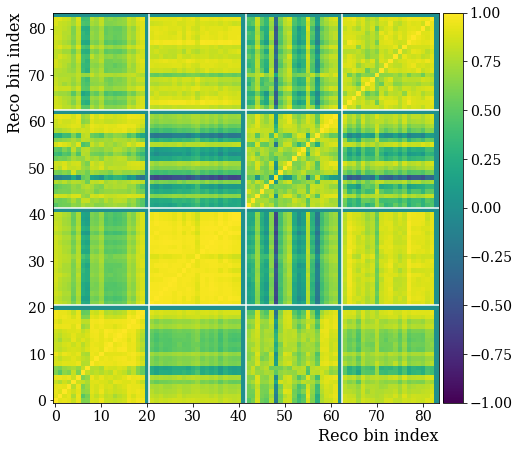

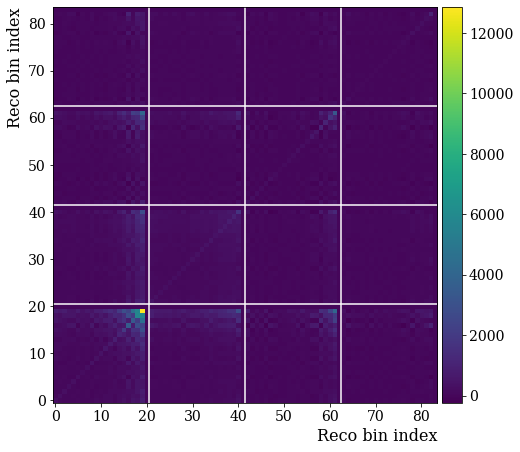

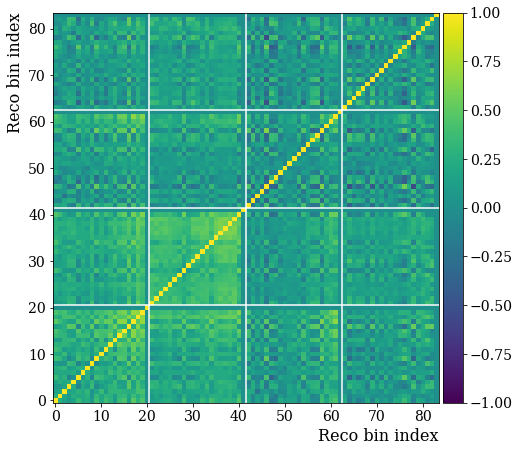

In [455]:
save_name = folder+'_0p'
#cf.chi2_decomposition(GENIE_y[:n], y[:n], unfcov1, save_name=save_name)
cf.chi2_decomposition(gen_smear1['nuwro'], y[:n], unfcov1, save_name=save_name+'_nuwro')
cf.chi2_decomposition(gen_smear1['geniev2'], y[:n], unfcov1, save_name=save_name+'_geniev2')
cf.chi2_decomposition(gen_smear1['geniev3'], y[:n], unfcov1, save_name=save_name+'_geniev3')
cf.chi2_decomposition(gen_smear1['neut'], y[:n], unfcov1, save_name=save_name+'_neut')
save_name = folder+'_Np'
#cf.chi2_decomposition(GENIE_y[n:], y[n:], unfcov2, save_name=save_name)
cf.chi2_decomposition(gen_smear2['nuwro'], y[n:], unfcov2, save_name=save_name+'_nuwro')
cf.chi2_decomposition(gen_smear2['geniev2'], y[n:], unfcov2, save_name=save_name+'_geniev2')
cf.chi2_decomposition(gen_smear2['geniev3'], y[n:], unfcov2, save_name=save_name+'_geniev3')
cf.chi2_decomposition(gen_smear2['neut'], y[n:], unfcov2, save_name=save_name+'_neut')
save_name = folder
cf.visualize_xs_matrix(folder, ch=4, make_plots=True, save_name=save_name)

In [473]:
[x/z for x,z in zip(gen_smear2['neut'],y[n:])]

[1.2286208694468268,
 1.2420901516531873,
 1.2535251798835483,
 1.2543386825874032,
 1.2604462855918377,
 1.263060030215138,
 1.2629803746828607,
 1.2667038597982037,
 1.2723333814431723,
 1.2758393123175744]

## 2D

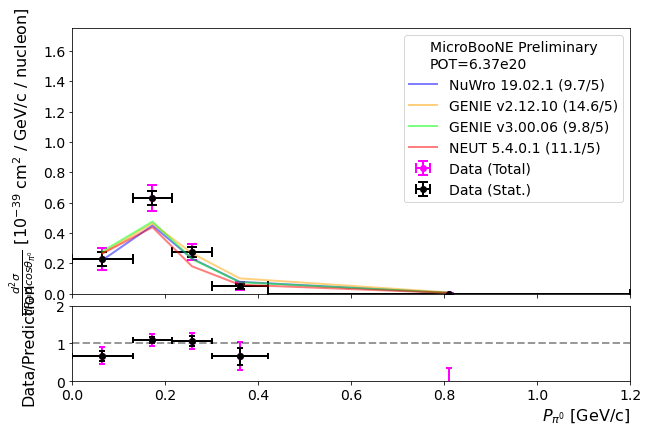

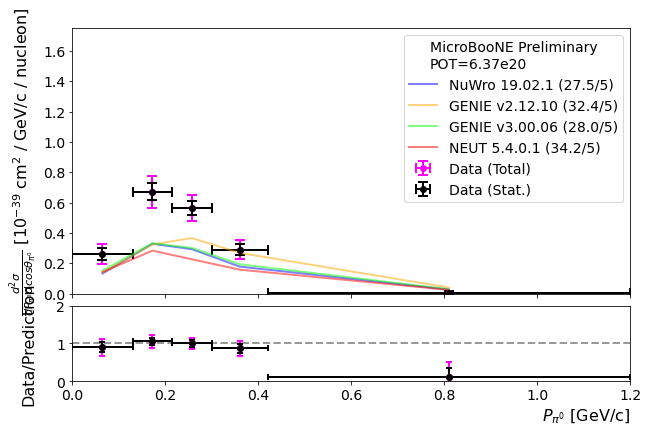

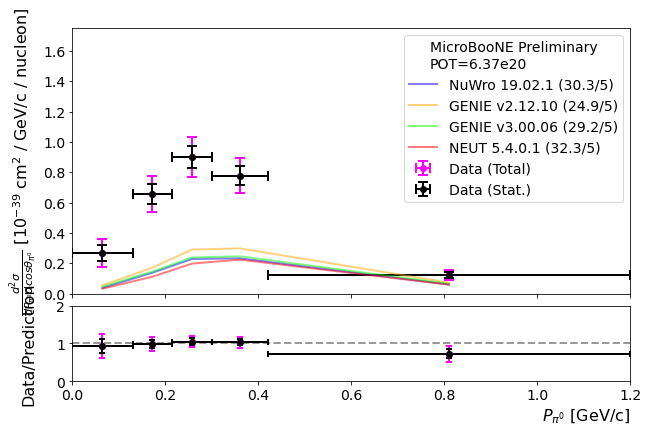

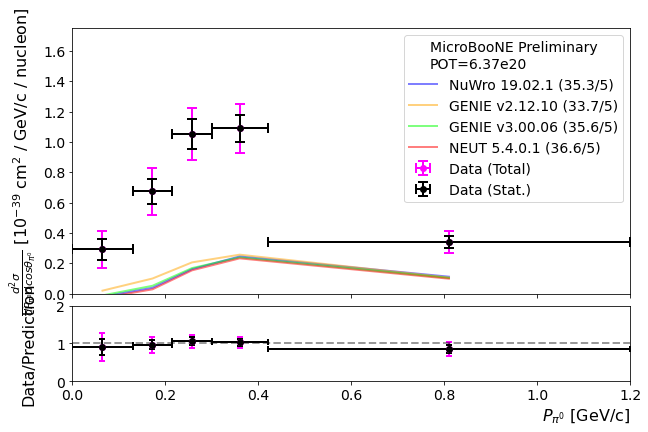

In [15]:
folder = 'diff_Xp_2D_mom_rwNEW'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.337715, 0.573009, 0.253059, 0.071621, 0.00400973, 0.289496, 0.634892, 0.56428, 0.334408, 0.0397799, 0.286901, 0.665583, 0.859031, 0.755059, 0.16667, 0.324116, 0.700214, 0.991873, 1.06127, 0.39621]
y = [0.229078, 0.627948, 0.272367, 0.0476188, -0.0039131, 0.26058, 0.670958, 0.564161, 0.290082, 0.00512728, 0.26872, 0.656186, 0.902109, 0.778087, 0.121525, 0.29168, 0.672889, 1.05117, 1.08929, 0.341454]
yerr_stat = [0.0453094, 0.0462989, 0.033434, 0.0158004, 0.00303828, 0.0376537, 0.0567156, 0.0465971, 0.038465, 0.00893009, 0.0541309, 0.0654938, 0.0720855, 0.0632833, 0.0202993, 0.0702542, 0.0840249, 0.0979659, 0.0881417, 0.0401555]
yerr_tot = [0.0729992, 0.0843025, 0.0525159, 0.0269698, 0.00537603, 0.0652368, 0.102393, 0.0848254, 0.0629273, 0.0150218, 0.0910648, 0.120616, 0.130123, 0.112122, 0.0348119, 0.121134, 0.154961, 0.169621, 0.15799, 0.0733812]
yerr_sys = [0.0572359, 0.0704508, 0.0404981, 0.0218568, 0.00443515, 0.0532733, 0.0852511, 0.0708807, 0.0498025, 0.0120792, 0.07323, 0.101285, 0.108332, 0.0925563, 0.0282808, 0.0986805, 0.130203, 0.13847, 0.131117, 0.0614193]
chi2 = '19.058'
chi2_ch0 = '6.89718'
chi2_ch1 = '9.11859'
chi2_ch2 = '2.46805'
chi2_ch3 = '2.68314'
chi2 = [chi2_ch0,chi2_ch1,chi2_ch2,chi2_ch3]

frac_err_stat = [0.197791, 0.0737304, 0.122753, 0.331809, -0.776437, 0.1445, 0.0845293, 0.0825953, 0.1326, 1.74168, 0.20144, 0.0998098, 0.0799077, 0.0813319, 0.167038, 0.240861, 0.124872, 0.0931973, 0.0809165, 0.117602]
frac_err_mcstat = [0.093363, 0.0346142, 0.0569722, 0.170984, -0.428784, 0.0717201, 0.041753, 0.038827, 0.063827, 0.924928, 0.0971897, 0.0481424, 0.0372395, 0.0375107, 0.0844534, 0.115904, 0.0600302, 0.0431572, 0.0378203, 0.0555014]
frac_err_dirt = [0.0070709, 0.00265221, 0.00296135, 0.00788546, -0.0187058, 0.00516262, 0.00370368, 0.00278897, 0.00317057, 0.068267, 0.00705133, 0.003723, 0.00263743, 0.00227272, 0.00425511, 0.00801964, 0.00440301, 0.00299101, 0.00221137, 0.00287393]
frac_err_flux = [0.102011, 0.0530448, 0.0585432, 0.131683, -0.18081, 0.0823862, 0.0605173, 0.0616833, 0.0749143, 0.784027, 0.0878564, 0.0686261, 0.0569993, 0.0572456, 0.107967, 0.0984338, 0.0750286, 0.0593233, 0.0613965, 0.0952696]
frac_err_det = [0.169545, 0.0658202, 0.102286, 0.369322, -0.991274, 0.14277, 0.0774882, 0.0759463, 0.107291, 1.71314, 0.199806, 0.100122, 0.0743396, 0.0727119, 0.153399, 0.249084, 0.130821, 0.0850359, 0.0728659, 0.105301]
frac_err_geant4 = [0.0307966, 0.0153158, 0.0176902, 0.0523687, -0.0883862, 0.02434, 0.0164174, 0.015789, 0.0215655, 0.140645, 0.0282365, 0.0200018, 0.0151288, 0.0162705, 0.0198224, 0.0307926, 0.0215412, 0.0172089, 0.0191479, 0.0292728]
frac_err_genie = [0.0785613, 0.0457334, 0.052058, 0.119657, -0.208625, 0.0634022, 0.045381, 0.0491226, 0.0618859, 0.858618, 0.109064, 0.0626829, 0.0471946, 0.0445637, 0.0741533, 0.154602, 0.0906009, 0.0521724, 0.0436918, 0.0657469]
frac_err_rw = [0.0749056, 0.0363448, 0.0362938, 0.0922922, -0.178744, 0.0606269, 0.0415482, 0.0370573, 0.0546041, 0.566142, 0.0574077, 0.0406965, 0.0352441, 0.0366472, 0.0672386, 0.0561062, 0.039887, 0.034224, 0.0331479, 0.0521242]
frac_err_rw_cor = [0.0421588, 0.0242649, 0.0249813, 0.0454042, -0.0425826, 0.0341648, 0.0257867, 0.025722, 0.0314878, 0.250765, 0.0337537, 0.0278298, 0.0235269, 0.0240834, 0.0374865, 0.0350858, 0.02849, 0.0232686, 0.0244983, 0.0347227]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_2Dpi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d^2\sigma}{dP_{\pi^{0}}dcos\theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, 1.75)

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
gen_smear = gen_mom_2D.copy()
for key,value in gen_smear.items(): 
    if len(value): gen_smear[key] = np.matmul(smear,value) 
        
n = int(len(y)/4)
N = int(len(y))  

gen_smear0 = {'nuwro':gen_smear['nuwro'][:n],
              'geniev2':gen_smear['geniev2'][:n],
              'geniev3':gen_smear['geniev3'][:n],
              'neut':gen_smear['neut'][:n]
             }
gen_smear1 = {'nuwro':gen_smear['nuwro'][n:2*n],
              'geniev2':gen_smear['geniev2'][n:2*n],
              'geniev3':gen_smear['geniev3'][n:2*n],
              'neut':gen_smear['neut'][n:2*n]
             }
gen_smear2 = {'nuwro':gen_smear['nuwro'][2*n:3*n],
              'geniev2':gen_smear['geniev2'][2*n:3*n],
              'geniev3':gen_smear['geniev3'][2*n:3*n],
              'neut':gen_smear['neut'][2*n:3*n]
             }
gen_smear3 = {'nuwro':gen_smear['nuwro'][3*n:],
              'geniev2':gen_smear['geniev2'][3*n:],
              'geniev3':gen_smear['geniev3'][3*n:],
              'neut':gen_smear['neut'][3*n:]
             }

# Used in separate chi_square
unfcov0 = np.zeros((n,n))
unfcov1 = np.zeros((n,n))
unfcov2 = np.zeros((n,n))
unfcov3 = np.zeros((n,n))
for ith in range(n):
    for jth in range(n): unfcov0[ith,jth] = unfcov[ith,jth]
for ith in range(n):
    for jth in range(n): unfcov1[ith,jth] = unfcov[n+ith,n+jth]
for ith in range(n):
    for jth in range(n): unfcov2[ith,jth] = unfcov[2*n+ith,2*n+jth]
for ith in range(n):
    for jth in range(n): unfcov3[ith,jth] = unfcov[3*n+ith,3*n+jth]

save_name = None #folder+'_theta0'
cf.plot_single_xs(edges, GENIE_y[:n], y[:n], yerr_stat[:n], [x*z for x,z in zip(frac_err_tot[:n],y[:n])], yerr_sys[:n], chi2_ch0, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, unfcov0, weighted_bin=False, save_name=save_name, generator=gen_smear0)
save_name = None #folder+'_theta1'
cf.plot_single_xs(edges, GENIE_y[n:2*n], y[n:2*n], yerr_stat[n:2*n], [x*z for x,z in zip(frac_err_tot[n:2*n],y[n:2*n])], yerr_sys[n:2*n], chi2_ch1, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, unfcov1, weighted_bin=False, save_name=save_name, generator=gen_smear1)
save_name = None #folder+'_theta2'
cf.plot_single_xs(edges, GENIE_y[2*n:3*n], y[2*n:3*n], yerr_stat[2*n:3*n], [x*z for x,z in zip(frac_err_tot[2*n:3*n],y[2*n:3*n])], yerr_sys[2*n:3*n], chi2_ch2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, unfcov2, weighted_bin=False, save_name=save_name, generator=gen_smear2)
save_name = None #folder+'_theta3'
cf.plot_single_xs(edges, GENIE_y[3*n:], y[3*n:], yerr_stat[3*n:], [x*z for x,z in zip(frac_err_tot[3*n:],y[3*n:])], yerr_sys[3*n:], chi2_ch3, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, yrange, unfcov3, weighted_bin=False, save_name=save_name, generator=gen_smear3)

## FAKE DATA SET - NUWRO

### Momentum Xp

In [ ]:
folder = '4ch_fakenuwro23_diffPpi0_rwNO_2nd_perNucleon_newnew'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.639475, 1.35948, 1.29391, 0.98077, 0.782222, 0.626555, 0.400305, 0.0918357]
y = [0.549886, 1.36659, 1.26129, 0.809247, 0.577046, 0.588603, 0.477588, 0.103241]
yerr_stat = [0.0698568, 0.104286, 0.0820986, 0.0672922, 0.0810267, 0.0412613, 0.0509136, 0.0126032]
yerr_tot = [0.128986, 0.193175, 0.161994, 0.127719, 0.135756, 0.0797934, 0.0818583, 0.0248582]
yerr_sys = [0.108432, 0.162606, 0.139649, 0.108554, 0.108924, 0.0682971, 0.0640982, 0.0214263]
chi2 = '4.72415'

frac_err_stat = [0.127039, 0.0763113, 0.0650909, 0.083154, 0.140416, 0.0701004, 0.106606, 0.122076]
frac_err_mcstat = [0.0664279, 0.0395468, 0.0336517, 0.04263, 0.0713048, 0.0357823, 0.053312, 0.064054]
frac_err_dirt = [0, 0, 0, 0, 0, 0, 0, 0]
frac_err_flux = [0.0912994, 0.0603579, 0.058736, 0.0769488, 0.0943963, 0.0698757, 0.0593236, 0.115827]
frac_err_det = [0.135746, 0.0765722, 0.0678173, 0.0838056, 0.13163, 0.0686256, 0.0952527, 0.134418]
frac_err_geant4 = [0.0201581, 0.0171205, 0.0152905, 0.0131445, 0.0126825, 0.0131807, 0.0143325, 0.014438]
frac_err_genie = [0.0854536, 0.052862, 0.0533223, 0.0553118, 0.0644108, 0.049167, 0.0487131, 0.0853002]
frac_err_rw = [0]*len(frac_err_stat)
frac_err_rw_cor = [0]*len(frac_err_stat)
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (0, edges[-1])
yrange = (0, max(y)*1.5)
generator = {'nuwro':[0.39143, 1.59754, 1.41524, 0.9337, 0.79534, 0.66347, 0.47036, 0.10301],
             'geniev2':[0.65056, 1.35038, 1.39189, 1.25132, 1.12227, 0.88741, 0.54975, 0.1033],
             'geniev3':[0.58109, 1.65382, 1.3533, 0.9709, 0.8072, 0.6802, 0.46043, 0.08626],
             #'neut':[0.50683, 1.61238, 1.08863, 0.74154, 0.72513, 0.59447, 0.42102, 0.08392],
            }

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
for key,value in generator.items(): 
    if len(value): generator[key] = np.matmul(smear,value)

save_name = folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_nuwro, 
                  xlabel, ylabel, xrange, (0,2), unfcov, weighted_bin=False, save_name=save_name, generator=generator)

In [ ]:
#chi2_decomposition(generator['geniev3'], GENIE_y, unfcov, save_name=None)
chi2_decomposition(generator['nuwro'], y, unfcov, save_name=None)
#chi2_decomposition(generator['geniev2'], y, unfcov, save_name=None)
#chi2_decomposition(generator['geniev3'], y, unfcov, save_name=None)
#chi2_decomposition(generator['neut'], y, unfcov, save_name=None)

In [ ]:
folder = '4ch_fakenuwro23_diffPpi0_rwNO_2nd_perNucleon_limited_newnew'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.628929, 1.40942, 1.33465, 0.984669, 0.786699, 0.651599, 0.422004, 0.089668]
y = [0.484852, 1.39639, 1.28398, 0.778569, 0.564022, 0.615004, 0.49794, 0.0939501]
yerr_stat = [0.0774972, 0.118616, 0.0917245, 0.0740833, 0.0915404, 0.0437438, 0.0601206, 0.0128886]
yerr_tot = [0.0984841, 0.15064, 0.122126, 0.0939019, 0.109385, 0.0576377, 0.0717974, 0.0169454]
yerr_sys = [0.132169, 0.202678, 0.156098, 0.122423, 0.134207, 0.0760853, 0.0852561, 0.0252114]
chi2 = '6.99116'

frac_err_stat = [0.159837, 0.0849445, 0.0714377, 0.0951531, 0.162299, 0.0711276, 0.120739, 0.137186]
frac_err_mcstat = [0.083814, 0.0436759, 0.0366532, 0.0487934, 0.0827323, 0.0365272, 0.0604331, 0.0727217]
frac_err_genie = [0.0931983, 0.0501454, 0.0509916, 0.0557804, 0.0665258, 0.0488867, 0.0506008, 0.0917801]
frac_err_dirt = [0]*len(frac_err_stat)
frac_err_flux = [0]*len(frac_err_stat)
frac_err_det = [0]*len(frac_err_stat)
frac_err_geant4 = [0]*len(frac_err_stat)
frac_err_rw = [0]*len(frac_err_stat)
frac_err_rw_cor = [0]*len(frac_err_stat)
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (0, edges[-1])
yrange = (0, max(y)*1.5)
generator = {'nuwro':[0.39143, 1.59754, 1.41524, 0.9337, 0.79534, 0.66347, 0.47036, 0.10301],
             'geniev2':[0.65056, 1.35038, 1.39189, 1.25132, 1.12227, 0.88741, 0.54975, 0.1033],
             'geniev3':[0.58109, 1.65382, 1.3533, 0.9709, 0.8072, 0.6802, 0.46043, 0.08626],
             #'neut':[0.50683, 1.61238, 1.08863, 0.74154, 0.72513, 0.59447, 0.42102, 0.08392],
            }

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
for key,value in generator.items(): 
    if len(value): generator[key] = np.matmul(smear,value)

save_name = folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_nuwro, 
                  xlabel, ylabel, xrange, (0,2), unfcov, weighted_bin=False, save_name=save_name, generator=generator)

In [ ]:
#chi2_decomposition(generator['geniev3'], GENIE_y, unfcov, save_name=None)
chi2_decomposition(generator['nuwro'], y, unfcov, save_name=None)
#chi2_decomposition(generator['geniev2'], y, unfcov, save_name=None)
#chi2_decomposition(generator['geniev3'], y, unfcov, save_name=None)
#chi2_decomposition(generator['neut'], y, unfcov, save_name=None)

In [ ]:
folder = '4ch_fakenuwro23_diffPpi0_rwNO_2nd_perNucleon_limited_rebin'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.621361, 1.39562, 1.43747, 1.1573, 0.932986, 0.790966, 0.714862, 0.619102, 0.40956, 0.0923035]
y = [0.476615, 1.3692, 1.43764, 1.0322, 0.698237, 0.537867, 0.572691, 0.635956, 0.483164, 0.0961724]
yerr_stat = [0.0770935, 0.11281, 0.121958, 0.0774818, 0.0901646, 0.110933, 0.0703775, 0.0611544, 0.0651864, 0.0130226]
yerr_tot = [0.150632, 0.232976, 0.236494, 0.151125, 0.162579, 0.193227, 0.13117, 0.111959, 0.11579, 0.0286479]
yerr_sys = [0.129408, 0.203842, 0.202621, 0.129751, 0.135286, 0.158211, 0.110692, 0.093781, 0.0956973, 0.0255169]
chi2 = '10.4845'

frac_err_stat = [0.161752, 0.0823908, 0.0848321, 0.075065, 0.129132, 0.206246, 0.122889, 0.0961614, 0.134916, 0.135409]
frac_err_mcstat = [0.0851961, 0.0425256, 0.0435816, 0.0381999, 0.0656645, 0.104733, 0.0632296, 0.0483495, 0.0671545, 0.0719863]
frac_err_genie = [0.0975457, 0.0499727, 0.0537014, 0.0523018, 0.0608082, 0.0761842, 0.0552243, 0.0493101, 0.0489, 0.0897936]
frac_err_dirt = [0]*len(frac_err_stat)
frac_err_flux = [0]*len(frac_err_stat)
frac_err_det = [0]*len(frac_err_stat)
frac_err_geant4 = [0]*len(frac_err_stat)
frac_err_rw = [0]*len(frac_err_stat)
frac_err_rw_cor = [0]*len(frac_err_stat)
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Mom_fakerebin_GeV
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (0, edges[-1])
yrange = (0, max(y)*1.5)
generator = {'nuwro':[0.39143, 1.59754, 1.52291, 1.1261, 0.87439, 0.81666, 0.73678, 0.63478, 0.47036, 0.10301],
             'geniev2':[0.65056, 1.35038, 1.41273, 1.31841, 1.23367, 1.16082, 1.02309, 0.83059, 0.54975, 0.1033],
             'geniev3':[0.58109, 1.65382, 1.43742, 1.10949, 0.93938, 0.83099, 0.74708, 0.65302, 0.46043, 0.08626],
             #'neut':[0.50683, 1.61238, 1.19591, 0.8278, 0.72154, 0.72823, 0.68752, 0.56366, 0.42102, 0.08392],
            }

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
for key,value in generator.items(): 
    if len(value): generator[key] = np.matmul(smear,value)

save_name = folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_nuwro, 
                  xlabel, ylabel, xrange, (0,2), unfcov, weighted_bin=False, save_name=save_name, generator=generator)

In [ ]:
chi2_decomposition(generator['nuwro'], y, unfcov, save_name=None)

In [ ]:
folder = 'diff_Xp_cos_rwNEW'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.111931, 0.133907, 0.170523, 0.218776, 0.287476, 0.367265, 0.452442, 0.535748, 0.621987, 0.707644]
y = [0.111698, 0.131406, 0.162947, 0.206282, 0.270167, 0.345664, 0.42682, 0.504754, 0.584634, 0.664262]
yerr_stat = [0.0102892, 0.010738, 0.0112492, 0.0123411, 0.0157143, 0.0212238, 0.0276178, 0.0338362, 0.0402372, 0.0464379]
yerr_tot = [0.020551, 0.0223687, 0.0252119, 0.0295761, 0.0377946, 0.0490347, 0.0618921, 0.0749188, 0.0886243, 0.101994]
yerr_sys = [0.0177898, 0.0196228, 0.0225632, 0.0268783, 0.0343729, 0.0442036, 0.0553886, 0.0668427, 0.0789635, 0.0908096]
chi2 = '10.9044'

frac_err_stat = [0.0921161, 0.0817166, 0.0690361, 0.0598264, 0.058165, 0.0613999, 0.0647058, 0.0670349, 0.0688246, 0.0699091]
frac_err_mcstat = [0.0448555, 0.0400983, 0.0343613, 0.0299703, 0.0288098, 0.0299112, 0.031173, 0.0321375, 0.032935, 0.0334319]
frac_err_dirt = [0.00369605, 0.00352798, 0.00337051, 0.00327708, 0.00330522, 0.00339624, 0.00343473, 0.00344197, 0.00346051, 0.00347986]
frac_err_flux = [0.0647429, 0.0663895, 0.0690064, 0.070666, 0.071802, 0.073023, 0.0744263, 0.0760633, 0.0774367, 0.0781938]
frac_err_det = [0.0953829, 0.0870983, 0.0777448, 0.0706744, 0.0681011, 0.0687398, 0.069899, 0.0711491, 0.0724191, 0.0732689]
frac_err_geant4 = [0.0177728, 0.017579, 0.0179146, 0.018395, 0.019055, 0.0197045, 0.0203397, 0.0209096, 0.0213403, 0.0215724]
frac_err_genie = [0.074303, 0.0671154, 0.0589428, 0.0536907, 0.0521802, 0.0527546, 0.054202, 0.0564297, 0.0586973, 0.0600967]
frac_err_rw = [0.0585569, 0.0552796, 0.0502712, 0.0448889, 0.0406978, 0.037899, 0.0362111, 0.0353563, 0.0349516, 0.0347873]
frac_err_rw_cor = [0.0280225, 0.0285664, 0.0292076, 0.0290562, 0.0284724, 0.0279628, 0.0277275, 0.027796, 0.0279733, 0.0280965]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Cos
xlabel = r'$Cos\Theta_{\pi^{0}}$'
ylabel = r'$\frac{d\sigma}{dcos\Theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, max(y)*1.5)
generator = {'nuwro':[0.10779, 0.12927, 0.16307, 0.2058, 0.27315, 0.33922, 0.43747, 0.59859, 0.78807, 1.10955],
             'geniev2':[0.11453, 0.14492, 0.19471, 0.26795, 0.35211, 0.44395, 0.54589, 0.64192, 0.78199, 0.97819],
             'geniev3':[0.11769, 0.14131, 0.17877, 0.22518, 0.29446, 0.37579, 0.46094, 0.55794, 0.67244, 0.85399],
             'neut':[0.11136, 0.12465, 0.14579, 0.18426, 0.24307, 0.30842, 0.42083, 0.54538, 0.65355, 0.85739],
            }

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
for key,value in generator.items(): 
    if len(value): generator[key] = np.matmul(smear,value)

save_name = False
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, (0,2), unfcov, weighted_bin=False, save_name=save_name, generator=generator)

In [ ]:
folder = 'diff_0pNp_cos_rwNEW'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.0379944, 0.0471686, 0.0615329, 0.0820721, 0.1122, 0.148062, 0.189941, 0.234751, 0.282275, 0.336686, 0.0758387, 0.0877485, 0.107434, 0.131439, 0.165382, 0.204048, 0.241768, 0.274908, 0.308363, 0.333669]
y = [0.0631666, 0.0765988, 0.0959603, 0.122364, 0.160857, 0.206218, 0.258993, 0.314942, 0.374457, 0.444128, 0.0430671, 0.0492884, 0.0593636, 0.0722007, 0.0899361, 0.110425, 0.130949, 0.148609, 0.166035, 0.179193]
yerr_stat = [0.0100421, 0.0110976, 0.0115676, 0.0114178, 0.0117789, 0.0140477, 0.01926, 0.0262324, 0.0338798, 0.0418963, 0.00817678, 0.00855516, 0.00909074, 0.0100216, 0.0124185, 0.0161697, 0.0205381, 0.0247344, 0.0288582, 0.0318555]
yerr_tot = [0.0177008, 0.0197614, 0.0211208, 0.021867, 0.0239481, 0.0289529, 0.038418, 0.050805, 0.0645339, 0.0792283, 0.0174465, 0.0189611, 0.0215931, 0.0254825, 0.0323105, 0.0411432, 0.0504173, 0.0588887, 0.0672812, 0.0734908]
yerr_sys = [0.0145765, 0.016351, 0.0176714, 0.0186494, 0.020851, 0.0253166, 0.0332415, 0.0435087, 0.0549252, 0.0672445, 0.0154117, 0.0169214, 0.0195862, 0.0234292, 0.0298287, 0.0378326, 0.0460444, 0.0534424, 0.0607779, 0.0662278]
chi2 = '25.3503'
chi2_ch1 = '14.7526'
chi2_ch2 = '11.3301'
chi2 = [chi2_ch1,chi2_ch2]

frac_err_stat = [0.158977, 0.144879, 0.120546, 0.0933101, 0.073226, 0.0681205, 0.074365, 0.083293, 0.0904773, 0.0943337, 0.189861, 0.173574, 0.153137, 0.138803, 0.138081, 0.146431, 0.156841, 0.166439, 0.173808, 0.177772]
frac_err_mcstat = [0.0770907, 0.0704779, 0.059023, 0.0460473, 0.0360397, 0.0326782, 0.0348237, 0.0385891, 0.0417486, 0.043467, 0.0915696, 0.0842277, 0.0751865, 0.0684516, 0.0676245, 0.0709952, 0.0754666, 0.0797709, 0.0831625, 0.0850079]
frac_err_dirt = [0.00799719, 0.00730695, 0.00614096, 0.00490526, 0.00413148, 0.00411123, 0.0045349, 0.00503704, 0.00544208, 0.00566274, 0.00545931, 0.00514726, 0.00483667, 0.00470878, 0.00479184, 0.0050538, 0.00533862, 0.00555346, 0.00569168, 0.0057597]
frac_err_flux = [0.041211, 0.0415323, 0.042484, 0.0442079, 0.0464621, 0.0488274, 0.0510686, 0.0530059, 0.0544233, 0.0551708, 0.114366, 0.116374, 0.119564, 0.121396, 0.124002, 0.126494, 0.128487, 0.13076, 0.132837, 0.134043]
frac_err_det = [0.16277, 0.149286, 0.126272, 0.100886, 0.0819918, 0.0756348, 0.0791958, 0.0859788, 0.0918895, 0.0951629, 0.173936, 0.161931, 0.149277, 0.142271, 0.144693, 0.152666, 0.161346, 0.169469, 0.175839, 0.179301]
frac_err_geant4 = [0.0421309, 0.0414761, 0.0403828, 0.0390801, 0.0377538, 0.0366731, 0.0360812, 0.0358766, 0.0358393, 0.0358421, 0.0529988, 0.049992, 0.0468193, 0.0436911, 0.0415696, 0.039851, 0.038234, 0.0370171, 0.0362606, 0.0358886]
frac_err_genie = [0.100014, 0.0912405, 0.076134, 0.0596639, 0.0489966, 0.0495329, 0.0577555, 0.0671611, 0.0743736, 0.0781576, 0.138158, 0.125469, 0.114268, 0.113704, 0.123614, 0.135463, 0.144341, 0.150812, 0.15538, 0.157744]
frac_err_rw = [0.0597391, 0.0570314, 0.0522498, 0.0465054, 0.0411442, 0.03718, 0.0348733, 0.033827, 0.0334548, 0.0333566, 0.124692, 0.117407, 0.10673, 0.0959443, 0.0882999, 0.0822939, 0.0774826, 0.0743409, 0.0725878, 0.0718104]
frac_err_rw_cor = [0.0608709, 0.0568966, 0.0498405, 0.0412592, 0.0329593, 0.026481, 0.0225068, 0.0206518, 0.0200426, 0.01993, 0.197145, 0.197366, 0.199904, 0.203891, 0.210447, 0.215165, 0.216963, 0.217878, 0.218533, 0.218844]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Cos
xlabel = r'$Cos\Theta_{\pi^{0}}$'
ylabel = r'$\frac{d\sigma}{dcos\Theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
xrange = (edges[0], edges[-1])
yrange = (0, max(y)*1.5)
generator = {'nuwro':[0.04983, 0.06324, 0.08105, 0.10447, 0.13878, 0.18268, 0.24523, 0.37277, 0.52974, 0.80314, 0.05796, 0.06602, 0.08202, 0.10132, 0.13436, 0.15654, 0.19223, 0.22582, 0.25832, 0.30641],
             'geniev2':[0.04058, 0.05718, 0.08062, 0.11828, 0.16203, 0.22222, 0.28511, 0.3432, 0.44912, 0.60133, 0.07395, 0.08775, 0.1141, 0.14967, 0.19009, 0.22172, 0.26078, 0.29872, 0.33287, 0.37686],
             'geniev3':[0.03503, 0.04467, 0.06328, 0.08441, 0.11833, 0.15578, 0.20816, 0.25782, 0.33868, 0.44956, 0.08265, 0.09664, 0.11549, 0.14077, 0.17613, 0.22001, 0.25277, 0.30013, 0.33377, 0.40443],
             #'neut':[0.04703, 0.05189, 0.06173, 0.07901, 0.10697, 0.14173, 0.20537, 0.28744, 0.35831, 0.51582, 0.06434, 0.07276, 0.08406, 0.10525, 0.1361, 0.16669, 0.21546, 0.25794, 0.29524, 0.34157],
            }

hR, bias, smear, unfcov = cf.get_matrices(folder)
n = int(len(y)/2)
N = int(len(y))
unfcov1 = np.zeros((n,n))
unfcov2 = np.zeros((n,n))
for ith in range(n):
    for jth in range(n): unfcov1[ith,jth] = unfcov[ith,jth]*1000*1000/40/40 # 1e-39/nucleon
for ith in range(n):
    for jth in range(n): unfcov2[ith,jth] = unfcov[n+ith,n+jth]*1000*1000/40/40 # 1e-39/nucleon

for key,value in generator.items(): 
    if len(value): generator[key] = np.matmul(smear,value)
        
generator1 = {'nuwro':generator['nuwro'][:n],
              'geniev2':generator['geniev2'][:n],
              'geniev3':generator['geniev3'][:n],
              #'neut':generator['neut'][:n]
             }
generator2 = {'nuwro':generator['nuwro'][n:],
              'geniev2':generator['geniev2'][n:],
              'geniev3':generator['geniev3'][n:],
              #'neut':generator['neut'][n:]
             }

save_name = None #folder+'_0p'
cf.plot_single_xs(edges, GENIE_y[:n], y[:n], yerr_stat[:n], [x*z for x,z in zip(frac_err_tot[:n],y[:n])], yerr_sys[:n], chi2_ch1, 'magenta', POT_nuwro, 
                  xlabel, ylabel, xrange, (0,1.5), unfcov1, weighted_bin=False, save_name=save_name, generator=generator1)

save_name = None #folder+'_Np'
cf.plot_single_xs(edges, GENIE_y[n:], y[n:], yerr_stat[n:], [x*z for x,z in zip(frac_err_tot[n:],y[n:])], yerr_sys[n:], chi2_ch2, 'magenta', POT_nuwro, 
                  xlabel, ylabel, xrange, (0,1.5), unfcov2, weighted_bin=False, save_name=save_name, generator=generator2)

In [ ]:
folder = '4ch_cos_rwNEW_C2_nucleon'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
x = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
GENIE_y = [0.0879999, 0.105245, 0.131737, 0.163966, 0.209869, 0.260065, 0.313568, 0.368866, 0.426692, 0.487276]
y = [0.117966, 0.140982, 0.176859, 0.223046, 0.290718, 0.365842, 0.445291, 0.525322, 0.607447, 0.693239]
yerr_stat = [0.0109908, 0.0116293, 0.011928, 0.0123198, 0.0149066, 0.0197361, 0.0258593, 0.0322962, 0.038849, 0.0452705]
yerr_tot = [0.0222353, 0.0240464, 0.0258724, 0.0283162, 0.0346341, 0.0441224, 0.0558365, 0.0685345, 0.0817822, 0.094972]
yerr_sys = [0.019329, 0.0210473, 0.0229588, 0.0254957, 0.031262, 0.0394623, 0.0494875, 0.0604478, 0.0719659, 0.0834881]
chi2 = '18.9745'

frac_err_stat = [0.0931696, 0.0824878, 0.0674435, 0.0552342, 0.0512749, 0.0539471, 0.0580727, 0.0614789, 0.0639545, 0.0653028]
frac_err_mcstat = [0.0448444, 0.0400555, 0.0332759, 0.0275628, 0.0253197, 0.0260602, 0.0276272, 0.0290304, 0.0300983, 0.0306913]
frac_err_dirt = [0.00410942, 0.00379557, 0.00340148, 0.00310687, 0.00304299, 0.00314247, 0.00324107, 0.00330525, 0.0033564, 0.00338902]
frac_err_flux = [0.0507213, 0.0511567, 0.0518715, 0.0521617, 0.0523083, 0.0528082, 0.0537089, 0.0548538, 0.0558557, 0.0564195]
frac_err_det = [0.104836, 0.0940894, 0.079489, 0.067613, 0.0628002, 0.0638531, 0.0667937, 0.0697635, 0.0721975, 0.0735865]
frac_err_geant4 = [0.0134816, 0.0130659, 0.0128781, 0.0131111, 0.0137229, 0.0144246, 0.0150417, 0.0155223, 0.0158633, 0.0160424]
frac_err_genie = [0.0838671, 0.0741774, 0.061026, 0.0507601, 0.0462263, 0.0461529, 0.0482392, 0.0510842, 0.0536238, 0.0550837]
frac_err_rw = [0.0599091, 0.0554308, 0.0488219, 0.0427147, 0.0387473, 0.0367953, 0.0360251, 0.0357718, 0.0356875, 0.0356592]
frac_err_rw_cor = [0.0212574, 0.0212915, 0.0212177, 0.0207679, 0.0201638, 0.0197054, 0.0194959, 0.0195178, 0.0196353, 0.0197254]
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Cos
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (-1, edges[-1])
yrange = (0, max(y)*1.5)
generator = {'nuwro':[0.10779, 0.12927, 0.16307, 0.2058, 0.27315, 0.33922, 0.43747, 0.59859, 0.78807, 1.10955],
             'geniev2':[0.11453, 0.14492, 0.19471, 0.26795, 0.35211, 0.44395, 0.54589, 0.64192, 0.78199, 0.97819],
             'geniev3':[0.11769, 0.14131, 0.17877, 0.22518, 0.29446, 0.37579, 0.46094, 0.55794, 0.67244, 0.85399],
             'neut':[0.11136, 0.12465, 0.14579, 0.18426, 0.24307, 0.30842, 0.42083, 0.54538, 0.65355, 0.85739],
            }

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
for key,value in generator.items(): 
    if len(value): generator[key] = np.matmul(smear,value)

save_name = False
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_bnb, 
                  xlabel, ylabel, xrange, (0,2), unfcov, weighted_bin=False, save_name=save_name, generator=generator)

In [ ]:
folder = '4ch_fakenuwro23_diffCosthetapi0_rwNO_2nd_perNucleon_limited'
#cf.print_xs_info(folder)
# ------------------- Add info here -------------------
GENIE_y = [0.0695431, 0.0830461, 0.10622, 0.136406, 0.17878, 0.229186, 0.282158, 0.334908, 0.390263, 0.446321]
y = [0.0721165, 0.0826192, 0.101761, 0.129115, 0.168944, 0.21669, 0.265564, 0.309892, 0.35476, 0.401525]
yerr_stat = [0.00605891, 0.00617889, 0.00634932, 0.00666991, 0.00838642, 0.0117028, 0.0153998, 0.0191246, 0.0233327, 0.0275755]
yerr_tot = [0.0121105, 0.0130894, 0.0153074, 0.0183882, 0.0235498, 0.0310996, 0.0397341, 0.0489385, 0.0592415, 0.0695366]
yerr_sys = [0.0104859, 0.0115392, 0.0139285, 0.0171359, 0.0220059, 0.0288138, 0.0366285, 0.0450469, 0.0544531, 0.0638352]
chi2 = '10.8902'

frac_err_stat = [0.0840157, 0.0747876, 0.0623944, 0.0516587, 0.0496402, 0.0540071, 0.0579892, 0.0617139, 0.0657705, 0.0686768]
frac_err_mcstat = [0.0441506, 0.0394106, 0.0333346, 0.0280153, 0.0268296, 0.0287496, 0.0304998, 0.0322738, 0.0343053, 0.0357791]
frac_err_genie = [0.0609367, 0.0560471, 0.0499065, 0.0456316, 0.0447023, 0.0457698, 0.0479804, 0.0515943, 0.0553735, 0.0577547]
frac_err_dirt = [0]*len(frac_err_stat)
frac_err_flux = [0]*len(frac_err_stat)
frac_err_det = [0]*len(frac_err_stat)
frac_err_geant4 = [0]*len(frac_err_stat)
frac_err_rw = [0]*len(frac_err_stat)
frac_err_rw_cor = [0]*len(frac_err_stat)
# -----------------------------------------------------
frac_err_tot = cf.return_frac_err_tot(frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, frac_err_det, 
                                      frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor)
edges = edges_pi0Cos
xlabel = r'$Cos\Theta_{\pi^{0}}$'
ylabel = r'$\frac{d\sigma}{dcos\Theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
xrange = (-1, x[-1])
yrange = (0, max(y)*1.5)
generator = {'nuwro':[0.10779, 0.12927, 0.16307, 0.2058, 0.27315, 0.33922, 0.43747, 0.59859, 0.78807, 1.10955],
             'geniev2':[0.11453, 0.14492, 0.19471, 0.26795, 0.35211, 0.44395, 0.54589, 0.64192, 0.78199, 0.97819],
             'geniev3':[0.11769, 0.14131, 0.17877, 0.22518, 0.29446, 0.37579, 0.46094, 0.55794, 0.67244, 0.85399],
             #'neut':[0.11136, 0.12465, 0.14579, 0.18426, 0.24307, 0.30842, 0.42083, 0.54538, 0.65355, 0.85739],
            }

hR, bias, smear, unfcov = cf.get_matrices(folder)
unfcov = unfcov*1000*1000/40/40 # 1e-39/nucleon
for key,value in generator.items(): 
    if len(value): generator[key] = np.matmul(smear,value)

save_name = folder
cf.plot_single_xs(edges, GENIE_y, y, yerr_stat, [x*z for x,z in zip(frac_err_tot,y)], yerr_sys, chi2, 'magenta', POT_nuwro, 
                  xlabel, ylabel, xrange, (0,2), unfcov, weighted_bin=False, save_name=save_name, generator=generator)

In [ ]:
def plot_single_xs_err(edges, POT, xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                       frac_err_det, frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor, frac_err_tot,
                       xrange, yrange, weighted_bin=False, save_name=None):
    
    diff_x, diff_ex = cf.binning(edges, weighted_bin)

    frac_err_pot = [0.022]*len(diff_x)
    frac_err_tar = [0.011]*len(diff_x)
    fig = plt.figure(figsize=(10,6.5))
    plt.step(edges, [frac_err_stat[0]]+frac_err_stat, color='black', label='Stat.', lw=2, ls='--', where='pre')
    plt.step(edges, [frac_err_mcstat[0]]+frac_err_mcstat, color='red', label='MC stat.', lw=2, where='pre')
    plt.step(edges, [frac_err_dirt[0]]+frac_err_dirt, color='brown', label='Dirt', lw=2, where='pre')
    plt.step(edges, [frac_err_flux[0]]+frac_err_flux, color='blue', label='Flux', lw=2, where='pre')
    plt.step(edges, [frac_err_det[0]]+frac_err_det, color='lime', label='Detector', lw=2, where='pre')
    plt.step(edges, [frac_err_genie[0]]+frac_err_genie, color='deepskyblue', label='Genie', lw=2, where='pre')
    plt.step(edges, [frac_err_geant4[0]]+frac_err_geant4, color='royalblue', label='GEANT4', lw=2, where='pre')
    plt.step(edges, [frac_err_rw[0]]+frac_err_rw, color='gold', label='Reweight', lw=2, where='pre')
    plt.step(edges, [frac_err_rw_cor[0]]+frac_err_rw_cor, color='orange', label='Reweight corr.', lw=2, where='pre')
    plt.step(edges, [frac_err_pot[0]]+frac_err_pot, color='magenta', label='POT', lw=2, where='pre')
    plt.step(edges, [frac_err_tar[0]]+frac_err_tar, color='purple', label='N. targets', lw=2, where='pre')
    plt.step(edges, [frac_err_tot[0]]+frac_err_tot, color='black', label='Total', lw=2, where='pre')
    plt.xlabel(xlabel, loc='right', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlim(xrange)
    plt.ylim(yrange)
    plt.legend(title='MicroBooNE Preliminary\n'+'POT='+str(POT), loc='best', ncol=3)
    # ---------------------------------------------------------------------------------------------------
    if save_name: 
        plt.savefig('xs_plots/'+save_name+'_err.png')
        plt.savefig('xs_plots/'+save_name+'_err.pdf')
    #plt.tight_layout()
    plt.show()

In [ ]:
def plot_double_xs_err(edges, POT, xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                       frac_err_det, frac_err_geant4, frac_err_genie, frac_err_rw, frac_err_rw_cor, frac_err_tot,
                       xrange, yrange, weighted_bin=False, save_name=None):
    
    diff_x, diff_ex = binning(edges, weighted_bin)
    N = len(y)//2 # true bins per cross section
    
    frac_err_stat1 = frac_err_stat[:N]
    frac_err_mcstat1 = frac_err_mcstat[:N]
    frac_err_dirt1 = frac_err_dirt[:N]
    frac_err_flux1 = frac_err_flux[:N]
    frac_err_det1 = frac_err_det[:N]
    frac_err_genie1 = frac_err_genie[:N]
    frac_err_geant41 = frac_err_geant4[:N]
    frac_err_rw1 = frac_err_rw[:N]
    frac_err_rw_cor1 = frac_err_rw_cor[:N]
    frac_err_tot1 = frac_err_tot[:N]
    
    frac_err_stat2 = frac_err_stat[N:]
    frac_err_mcstat2 = frac_err_mcstat[N:]
    frac_err_dirt2 = frac_err_dirt[N:]
    frac_err_flux2 = frac_err_flux[N:]
    frac_err_det2 = frac_err_det[N:]
    frac_err_genie2 = frac_err_genie[N:]
    frac_err_geant42 = frac_err_geant4[N:]
    frac_err_rw2 = frac_err_rw[N:]
    frac_err_rw_cor2 = frac_err_rw_cor[N:]
    frac_err_tot2 = frac_err_tot[N:]

    frac_err_pot = [0.022]*len(diff_x)
    frac_err_tar = [0.011]*len(diff_x)
    fig = plt.figure(figsize=(17,7))
    plt.subplot(121)
    plt.step(edges, [frac_err_stat1[0]]+frac_err_stat1, color='black', label='Stat.', lw=2, ls='--', where='pre')
    plt.step(edges, [frac_err_mcstat1[0]]+frac_err_mcstat1, color='red', label='MC stat.', lw=2, where='pre')
    plt.step(edges, [frac_err_dirt1[0]]+frac_err_dirt1, color='brown', label='Dirt', lw=2, where='pre')
    plt.step(edges, [frac_err_flux1[0]]+frac_err_flux1, color='blue', label='Flux', lw=2, where='pre')
    plt.step(edges, [frac_err_det1[0]]+frac_err_det1, color='lime', label='Detector', lw=2, where='pre')
    plt.step(edges, [frac_err_genie1[0]]+frac_err_genie1, color='deepskyblue', label='Genie', lw=2, where='pre')
    plt.step(edges, [frac_err_geant41[0]]+frac_err_geant41, color='royalblue', label='GEANT4', lw=2, where='pre')
    plt.step(edges, [frac_err_rw1[0]]+frac_err_rw1, color='gold', label='Reweight', lw=2, where='pre')
    plt.step(edges, [frac_err_rw_cor1[0]]+frac_err_rw_cor1, color='orange', label='Reweight corr.', lw=2, where='pre')
    plt.step(edges, [frac_err_pot[0]]+frac_err_pot, color='magenta', label='POT', lw=2, where='pre')
    plt.step(edges, [frac_err_tar[0]]+frac_err_tar, color='purple', label='N. targets', lw=2, where='pre')
    plt.step(edges, [frac_err_tot1[0]]+frac_err_tot1, color='black', label='Total', lw=2, where='pre')
    plt.xlabel(xlabel, loc='right', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlim(xrange)
    plt.ylim(yrange)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(title='MicroBooNE Preliminary\n'+'POT='+str(POT), loc='best', ncol=3, prop={'size': 14})
    # ---------------------------------------------------------------------------------------------------
    plt.subplot(122)
    plt.step(edges, [frac_err_stat2[0]]+frac_err_stat2, color='black', label='Stat.', lw=2, ls='--', where='pre')
    plt.step(edges, [frac_err_mcstat2[0]]+frac_err_mcstat2, color='red', label='MC stat.', lw=2, where='pre')
    plt.step(edges, [frac_err_dirt2[0]]+frac_err_dirt2, color='brown', label='Dirt', lw=2, where='pre')
    plt.step(edges, [frac_err_flux2[0]]+frac_err_flux2, color='blue', label='Flux', lw=2, where='pre')
    plt.step(edges, [frac_err_det2[0]]+frac_err_det2, color='lime', label='Detector', lw=2, where='pre')
    plt.step(edges, [frac_err_genie2[0]]+frac_err_genie2, color='deepskyblue', label='Genie', lw=2, where='pre')
    plt.step(edges, [frac_err_geant42[0]]+frac_err_geant42, color='royalblue', label='GEANT4', lw=2, where='pre')
    plt.step(edges, [frac_err_rw2[0]]+frac_err_rw2, color='gold', label='Reweight', lw=2, where='pre')
    plt.step(edges, [frac_err_rw_cor2[0]]+frac_err_rw_cor2, color='orange', label='Reweight corr.', lw=2, where='pre')
    plt.step(edges, [frac_err_pot[0]]+frac_err_pot, color='magenta', label='POT', lw=2, where='pre')
    plt.step(edges, [frac_err_tar[0]]+frac_err_tar, color='purple', label='N. targets', lw=2, where='pre')
    plt.step(edges, [frac_err_tot2[0]]+frac_err_tot2, color='black', label='Total', lw=2, where='pre')
    plt.xlabel(xlabel, loc='right', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlim(xrange)
    plt.ylim(yrange)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(title='MicroBooNE Preliminary\n'+'POT='+str(POT), loc='best', ncol=3, prop={'size': 14})
    if save_name: 
        plt.savefig('xs_plots/'+save_name+'_err.png')
        plt.savefig('xs_plots/'+save_name+'_err.pdf')
    #plt.tight_layout()
    plt.show()

In [ ]:
POT = '5.33e19'

fig = plt.figure(figsize=(15,10.5))
# ---------------------------------------------------------------------------------------------------
gs = gridspec.GridSpec(1, 3, figure=fig, wspace=0.0)
gsA = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], hspace=0.07, height_ratios=(3.5,1))
ax1 = fig.add_subplot(gsA[0,0])
ax1.errorbar([1], y[0], xerr=[0.], yerr=yerr_tot[0], color='magenta', label=r'WC $NC\pi^{0}$ (Total)', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax1.errorbar([1], y[0], xerr=[0.], yerr=yerr_stat[0], color='black', label=r'WC $NC\pi^{0}$ (Stat. only)', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax1.hlines(GENIE_y[0], 0, 2, colors='red', linestyles='solid', label=r'GENIE v3 MicroBooNE tune', lw=2)
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel(r'$\sigma_{NC\pi^{0}}$ [$10^{-38}$ cm$^{2}$ / Ar]')
ax1.set_xlim(0,2)
ax1.set_ylim(0,2.5)
plt.xticks([])
plt.yticks(fontsize=tick_size)
#ax1.legend(loc='lower center', ncol=1, prop={'size': 12})

ax2 = fig.add_subplot(gsA[1,0])
ax2.errorbar([1], [x/y for x,y in zip([y[0]],[GENIE_y[0]])], xerr=[0.], yerr=[x/y for x,y in zip([yerr_tot[0]],[GENIE_y[0]])], color='magenta', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax2.errorbar([1], [x/y for x,y in zip([y[0]],[GENIE_y[0]])], xerr=[0.], yerr=[x/y for x,y in zip([yerr_stat[0]],[GENIE_y[0]])], color='black', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax2.hlines(1, 0, 2, ls='--', color='black', lw=2, alpha=0.4)
ax2.set_xlabel('')
ax2.axes.xaxis.set_ticklabels([])
ax2.set_ylabel('Data/Prediction')
ax2.set_xlim((0,2))
ax2.set_ylim((0.,2))
plt.xticks([])
# ---------------------------------------------------------------------------------------------------
gsB = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], hspace=0.07, height_ratios=(3.5,1))
ax3 = fig.add_subplot(gsB[0,0])
ax3.errorbar([1], y[1], xerr=[0.], yerr=yerr_tot[1], color='magenta', label=r'WC $NC\pi^{0}$ 0p (Total)', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax3.errorbar([1], y[1], xerr=[0.], yerr=yerr_stat[1], color='black', label=r'WC $NC\pi^{0}$ 0p (Stat. only)', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax3.hlines(GENIE_y[1], 0, 2, colors='red', linestyles='solid', label=r'GENIE v3 MicroBooNE tune', lw=2)
ax3.axes.xaxis.set_ticklabels([])
ax3.set_xlim(0,2)
ax3.set_ylim(0,2.5)
plt.xticks([])
plt.yticks([])
#ax3.legend(loc='upper center', ncol=1, prop={'size': 12})

ax4 = fig.add_subplot(gsB[1,0])
ax4.errorbar([1], [x/y for x,y in zip([y[1]],[GENIE_y[1]])], xerr=[0.], yerr=[x/y for x,y in zip([yerr_tot[1]],[GENIE_y[1]])], color='magenta', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax4.errorbar([1], [x/y for x,y in zip([y[1]],[GENIE_y[1]])], xerr=[0.], yerr=[x/y for x,y in zip([yerr_stat[1]],[GENIE_y[1]])], color='black', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax4.hlines(1, 0, 2, ls='--', color='black', lw=2, alpha=0.4)
ax4.set_xlabel('')
ax4.axes.xaxis.set_ticklabels([])
ax4.set_xlim((0,2))
ax4.set_ylim((0.,2))
plt.xticks([])
plt.yticks([])
# ---------------------------------------------------------------------------------------------------
gsC = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], hspace=0.07, height_ratios=(3.5,1))
ax5 = fig.add_subplot(gsC[0,0])
ax5.errorbar([1], y[2], xerr=[0.], yerr=yerr_tot[2], color='magenta', label=r'WC $NC\pi^{0}$ (Total)', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax5.errorbar([1], y[2], xerr=[0.], yerr=yerr_stat[2], color='black', label=r'WC $NC\pi^{0}$ (Stat. only)', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax5.hlines(GENIE_y[2], 0, 2, colors='red', linestyles='solid', label=r'GENIE v3 MicroBooNE tune', lw=2)
ax5.axes.xaxis.set_ticklabels([])
ax5.set_xlim(0,2)
ax5.set_ylim(0,2.5)
plt.xticks([])
plt.yticks([])
#ax5.legend(loc='upper center', ncol=1, prop={'size': 12})
plt.legend(title='MicroBooNE Preliminary\n'+'POT='+str(POT), loc='best', ncol=1, prop={'size': 14}, frameon=True, framealpha=1.0)

ax6 = fig.add_subplot(gsC[1,0])
ax6.errorbar([1], [x/y for x,y in zip([y[2]],[GENIE_y[2]])], xerr=[0.], yerr=[x/y for x,y in zip([yerr_tot[2]],[GENIE_y[2]])], color='magenta', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax6.errorbar([1], [x/y for x,y in zip([y[2]],[GENIE_y[2]])], xerr=[0.], yerr=[x/y for x,y in zip([yerr_stat[2]],[GENIE_y[2]])], color='black', fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
ax6.hlines(1, 0, 2, ls='--', color='black', lw=2, alpha=0.4)
ax6.set_xlabel('')
ax6.axes.xaxis.set_ticklabels([])
ax6.set_xlim((0,2))
ax6.set_ylim((0.,2))
plt.xticks([])
plt.yticks([])
# ---------------------------------------------------------------------------------------------------
plt.savefig('xs_plots/NCpi0_total_3panel_WC.png')
plt.savefig('xs_plots/NCpi0_total_3panel_WC.pdf')
plt.xticks([])
plt.show()

In [ ]:
POT = '5.33e19'
ylim = (0,0.5)

fig = plt.figure(figsize=(12,10.5))
# ---------------------------------------------------------------------------------------------------
gs = gridspec.GridSpec(1, 3, figure=fig, wspace=0.0)
gsA = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0], hspace=0.07)
ax1 = fig.add_subplot(gsA[0])
plt.axhline(y=frac_err_stat[0], color='black', label='Stat.', lw=2, ls='--')
plt.axhline(y=frac_err_mcstat[0], color='red', label='MC stat.', lw=2)
plt.axhline(y=frac_err_dirt[0], color='brown', label='Dirt', lw=2)
plt.axhline(y=frac_err_flux[0], color='blue', label='Flux', lw=2)
plt.axhline(y=frac_err_det[0], color='lime', label='Detector', lw=2)
plt.axhline(y=frac_err_xs[0], color='deepskyblue', label='Cross Section', lw=2)
plt.axhline(y=frac_err_rw[0], color='gold', label='Reweight', lw=2)
plt.axhline(y=frac_err_rw_cor[0], color='orange', label='Reweight corr.', lw=2)
plt.axhline(y=frac_err_pot[0], color='magenta', label='POT', lw=2)
plt.axhline(y=frac_err_tar[0], color='purple', label='N. targets', lw=2)
plt.axhline(y=frac_err_tot[0], color='black', label='Total', lw=2)
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel('Fractional Uncertainty')
plt.xticks([])
plt.yticks(fontsize=tick_size)
plt.ylim(ylim)
#plt.legend(title='MicroBooNE Preliminary\n'+'POT='+str(POT), loc='best', ncol=2, prop={'size': 14}, frameon=True, framealpha=1.0)
# ---------------------------------------------------------------------------------------------------
gsB = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], hspace=0.07)
ax2 = fig.add_subplot(gsB[0])
plt.axhline(y=frac_err_stat[1], color='black', label='Stat.', lw=2, ls='--')
plt.axhline(y=frac_err_mcstat[1], color='red', label='MC stat.', lw=2)
plt.axhline(y=frac_err_dirt[1], color='brown', label='Dirt', lw=2)
plt.axhline(y=frac_err_flux[1], color='blue', label='Flux', lw=2)
plt.axhline(y=frac_err_det[1], color='lime', label='Detector', lw=2)
plt.axhline(y=frac_err_xs[1], color='deepskyblue', label='Cross Section', lw=2)
plt.axhline(y=frac_err_rw[1], color='gold', label='Reweight', lw=2)
plt.axhline(y=frac_err_rw_cor[1], color='orange', label='Reweight corr.', lw=2)
plt.axhline(y=frac_err_pot[1], color='magenta', label='POT', lw=2)
plt.axhline(y=frac_err_tar[1], color='purple', label='N. targets', lw=2)
plt.axhline(y=frac_err_tot[1], color='black', label='Total', lw=2)
ax2.axes.xaxis.set_ticklabels([])
plt.xticks([])
plt.yticks([])
plt.ylim(ylim)
#plt.legend(title='MicroBooNE Preliminary\n'+'POT='+str(POT), loc='best', ncol=2, prop={'size': 14}, frameon=True, framealpha=1.0)
# ---------------------------------------------------------------------------------------------------
gsC = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[2], hspace=0.07)
ax3 = fig.add_subplot(gsC[0])
plt.axhline(y=frac_err_stat[2], color='black', label='Stat.', lw=2, ls='--')
plt.axhline(y=frac_err_mcstat[2], color='red', label='MC stat.', lw=2)
plt.axhline(y=frac_err_dirt[2], color='brown', label='Dirt', lw=2)
plt.axhline(y=frac_err_flux[2], color='blue', label='Flux', lw=2)
plt.axhline(y=frac_err_det[2], color='lime', label='Detector', lw=2)
plt.axhline(y=frac_err_xs[2], color='deepskyblue', label='Cross Section', lw=2)
plt.axhline(y=frac_err_rw[2], color='gold', label='Reweight', lw=2)
plt.axhline(y=frac_err_rw_cor[2], color='orange', label='Reweight corr.', lw=2)
plt.axhline(y=frac_err_pot[2], color='magenta', label='POT', lw=2)
plt.axhline(y=frac_err_tar[2], color='purple', label='N. targets', lw=2)
plt.axhline(y=frac_err_tot[2], color='black', label='Total', lw=2)
ax3.axes.xaxis.set_ticklabels([])
plt.xticks([])
plt.yticks([])
plt.ylim(ylim)
plt.legend(title='MicroBooNE Preliminary\n'+'POT='+str(POT), loc='best', ncol=2, prop={'size': 14}, frameon=True, framealpha=1.0)
# ---------------------------------------------------------------------------------------------------
plt.savefig('xs_plots/NCpi0_total_3panel_WC_err.png')
plt.savefig('xs_plots/NCpi0_total_3panel_WC_err.pdf')
plt.xticks([])
plt.show()

## numuCC Cross Sections

In [ ]:
# plot total cross sections f(Enu)
#access_folder('4ch_total_combined_numuCC_full_rw')
x = [0.200, 0.540, 0.705, 0.805, 0.920, 1.050, 1.200, 1.375, 1.570, 2.050, 4.]
GENIE_y = [0.0944537, 0.217164, 0.305845, 0.363297, 0.407829, 0.442781, 0.492508, 0.566777, 0.675041, 0.864648]
y = [0.107009, 0.260802, 0.375452, 0.441525, 0.478673, 0.487858, 0.501247, 0.539983, 0.620448, 0.783809]
yerr_stat = [0.00327729, 0.00502926, 0.00679001, 0.00705846, 0.00794007, 0.0105709, 0.0083987, 0.0101302, 0.0166266, 0.0284004]
yerr_tot = [0.0125871, 0.0218168, 0.0284004, 0.0314053, 0.0349691, 0.0429178, 0.0526374, 0.073884, 0.0980989, 0.132651]
yerr_sys = [0.0121529, 0.0212292, 0.0275768, 0.0306018, 0.0340558, 0.0415956, 0.0519631, 0.0731863, 0.0966797, 0.129575]
chi2 = '13.6'
xlabel = r'$E_{\nu}$ [GeV]'
ylabel = r'$\sigma_{CC}$ [$10^{-36}$ cm$^{2}$ / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/numuCC_Enu_combined'

r_numucc_enu, r_err_numucc_enu = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'red', '6.37e20', xlabel, ylabel, 
                                                xrange, yrange, weighted_bin=True, save_name=save_name)

y_numucc_enu, yerr_tot_numucc_enu = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.0306262, 0.0192838, 0.0180849, 0.0159865, 0.0165877, 0.021668, 0.0167556, 0.0187603, 0.0267977, 0.0362339]
frac_err_mcstat = [0.0210946, 0.0131217, 0.0125244, 0.0110578, 0.0113036, 0.014926, 0.011593, 0.0130703, 0.0183606, 0.0246342]
frac_err_dirt = [0.00409356, 0.00210346, 0.00167416, 0.00153004, 0.00162483, 0.00161075, 0.00133749, 0.00164469, 0.00269902, 0.00365972]
frac_err_flux = [0.0810855, 0.0578618, 0.0515679, 0.0475017, 0.0474568, 0.0579912, 0.0849079, 0.116803, 0.130551, 0.128859]
frac_err_det = [0.0556727, 0.0351823, 0.03311, 0.029933, 0.0307757, 0.0402189, 0.0314671, 0.039703, 0.0556063, 0.0726324]
frac_err_xs = [0.0418881, 0.030299, 0.0258033, 0.0266751, 0.0280845, 0.0306341, 0.0333226, 0.0383719, 0.0451692, 0.0530519]
frac_err_rw = [0.0222747, 0.0217461, 0.0201813, 0.020176, 0.021637, 0.023646, 0.0254972, 0.0274284, 0.0296706, 0.0317119]
frac_err_rw_cor = [0.0226074, 0.0217387, 0.0201635, 0.0202028, 0.0217986, 0.0237916, 0.0255095, 0.0274239, 0.0296651, 0.031758]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_single_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor, 
                   xrange, yrange, weighted_bin=True, save_name=save_name)

In [ ]:
# plot 0pNp cross sections f(Enu)
#access_folder('4ch_total_0pNp_numuCC_full_rw')
x = [0.200, 0.540, 0.705, 0.805, 0.920, 1.050, 1.200, 1.375, 1.570, 2.050, 4.]
GENIE_y = [0.0249096, 0.036953, 0.044874, 0.0506013, 0.0553657, 0.0621816, 0.0721357, 0.0892775, 0.110582, 0.156022, 0.0713125, 0.176437, 0.257932, 0.309544, 0.34547, 0.371774, 0.414052, 0.473576, 0.557199, 0.691825]
y = [0.0360932, 0.0593666, 0.0731422, 0.0812908, 0.087707, 0.0956443, 0.103084, 0.113068, 0.123132, 0.159385, 0.0764985, 0.202361, 0.305829, 0.360829, 0.381392, 0.381796, 0.399916, 0.440245, 0.504481, 0.61206]
yerr_stat = [0.00156633, 0.00164335, 0.00191745, 0.0032662, 0.00429947, 0.00499645, 0.00612556, 0.00797965, 0.0103483, 0.0153299, 0.00272429, 0.00405475, 0.0056696, 0.00601192, 0.00697648, 0.00898422, 0.00829518, 0.0102757, 0.0162193, 0.0244299]
yerr_tot = [0.00452102, 0.00495219, 0.00603794, 0.00953292, 0.0125445, 0.0150437, 0.0184185, 0.0234872, 0.0298158, 0.0434351, 0.00984572, 0.0177221, 0.0236983, 0.0266169, 0.0299784, 0.0363608, 0.0455519, 0.0630243, 0.0853491, 0.113556]
yerr_sys = [0.00424102, 0.00467157, 0.00572539, 0.00895592, 0.0117847, 0.0141897, 0.0173701, 0.0220901, 0.0279623, 0.0406399, 0.00946131, 0.017252, 0.0230101, 0.025929, 0.0291554, 0.0352334, 0.0447902, 0.0621809, 0.0837938, 0.110897]
chi2 = ['28.1','9.3']
xlabel = r'$E_{\nu}$ [GeV]'
ylabel = r'$\sigma_{CC}$ [$10^{-36}$ cm$^{2}$ / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/numuCC_Enu_0pNp'

r1_numucc_enu, r2_numucc_enu, r1_err_numucc_enu, r2_err_numucc_enu = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'red', '6.37e20', xlabel, ylabel,
                                                                                   xrange, yrange, weighted_bin=True, save_name=save_name)
# Ben cross sections
#GENIE_y = [0.0273215, 0.0385213, 0.0453053, 0.0502431, 0.0549963, 0.0617961, 0.0718855, 0.0898381, 0.113704, 0.165835, 0.0758884, 0.182312, 0.263783, 0.315886, 0.354724, 0.384421, 0.426945, 0.488537, 0.582223, 0.738029]
#y = [0.040252, 0.0595592, 0.0702735, 0.0764748, 0.0817256, 0.0885133, 0.0967183, 0.111121, 0.130128, 0.181264, 0.0849358, 0.21256, 0.312762, 0.368185, 0.39362, 0.400291, 0.421875, 0.468835, 0.551125, 0.692348]
#yerr_stat = [0.00148151, 0.00162417, 0.00179361, 0.00286668, 0.00405119, 0.00496138, 0.00608834, 0.00768841, 0.00963019, 0.0144238, 0.00273895, 0.00402827, 0.00567309, 0.00619962, 0.00665478, 0.00927021, 0.00843774, 0.0105997, 0.0164691, 0.0257026]
#yerr_sys = [0.00413534, 0.00457759, 0.0052601, 0.00787264, 0.0108604, 0.0136496, 0.0171887, 0.0218814, 0.027196, 0.0399314, 0.00930111, 0.0166091, 0.0218262, 0.0242327, 0.0268462, 0.0340253, 0.0432634, 0.0614227, 0.0831953, 0.111489]
#yerr_tot = [0.00439271, 0.00485718, 0.00555749, 0.00837833, 0.0115914, 0.0145233, 0.0182351, 0.0231928, 0.0288507, 0.0424566, 0.009696, 0.0170906, 0.0225514, 0.0250131, 0.0276587, 0.0352655, 0.0440785, 0.0623306, 0.0848097, 0.114413]

y_numucc0p_enu, yerr_tot_numucc0p_enu = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_numuccNp_enu, yerr_tot_numuccNp_enu = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.0433967, 0.0276813, 0.0262154, 0.0401792, 0.0490209, 0.0522399, 0.0594229, 0.0705741, 0.0840422, 0.0961814, 0.0356123, 0.0200373, 0.0185385, 0.0166614, 0.0182921, 0.0235315, 0.0207423, 0.023341, 0.0321505, 0.0399142]
frac_err_mcstat = [0.0283989, 0.0178084, 0.0174166, 0.0267353, 0.0326959, 0.0353858, 0.0406292, 0.0479495, 0.05659, 0.0645165, 0.0250081, 0.0137264, 0.0128037, 0.0115326, 0.012495, 0.0161606, 0.0145097, 0.0162704, 0.0221001, 0.0274201]
frac_err_dirt = [0.00816558, 0.00524689, 0.00338971, 0.00435663, 0.00562868, 0.00607888, 0.0067712, 0.00810979, 0.00992212, 0.011486, 0.00353932, 0.00197325, 0.00176041, 0.00158838, 0.00179581, 0.0019679, 0.00134254, 0.00208086, 0.00325057, 0.00373605]
frac_err_flux = [0.0642382, 0.0470328, 0.0394757, 0.0387167, 0.0438466, 0.0558341, 0.0740882, 0.0928796, 0.108176, 0.117407, 0.0841372, 0.0609525, 0.0524845, 0.0486616, 0.0503915, 0.0622622, 0.0876336, 0.115564, 0.131142, 0.13497]
frac_err_det = [0.0757529, 0.0487759, 0.0486889, 0.0784502, 0.097131, 0.104285, 0.117282, 0.136486, 0.161152, 0.184684, 0.0652128, 0.0368292, 0.0338741, 0.0314167, 0.0340144, 0.0436252, 0.0409397, 0.0510684, 0.0701867, 0.0861722]
frac_err_xs = [0.0480176, 0.0267531, 0.0367267, 0.0561897, 0.0704296, 0.0777937, 0.0814922, 0.0860062, 0.0942856, 0.102893, 0.0472097, 0.0315791, 0.026695, 0.0279994, 0.0309894, 0.0353027, 0.0398803, 0.0467623, 0.0568111, 0.0665943]
frac_err_rw = [0.0193953, 0.016423, 0.0163583, 0.0171762, 0.0177429, 0.0183402, 0.0201495, 0.0240381, 0.029262, 0.0335096, 0.0233209, 0.0224413, 0.0209693, 0.021061, 0.0225949, 0.0246961, 0.0263133, 0.0276655, 0.0294829, 0.0315003]
frac_err_rw_cor = [0.0196615, 0.0164578, 0.0163448, 0.0172702, 0.0179116, 0.0184486, 0.0201459, 0.0239788, 0.0291855, 0.0334296, 0.0235445, 0.022437, 0.0209613, 0.0211139, 0.0227433, 0.0248036, 0.0263229, 0.0276608, 0.0294764, 0.0315167]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_double_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=True, save_name=save_name)

In [ ]:
# plot total cross sections f(Emu)
#access_folder('4ch_diffEmuon_combined_numuCC_full_rw')
x = [0.106, 0.226, 0.296, 0.386, 0.505, 0.577, 0.659, 0.753, 0.861, 0.984, 1.285, 2.506]
GENIE_y = [0.217735, 0.35448, 0.418006, 0.385057, 0.345554, 0.306927, 0.269041, 0.232396, 0.183119, 0.100661, 0.0190034]
y = [0.215507, 0.421697, 0.509773, 0.477527, 0.414215, 0.354832, 0.314064, 0.277036, 0.219894, 0.118401, 0.022195]
yerr_stat = [0.00743663, 0.00731568, 0.00645087, 0.00651984, 0.00689627, 0.00682975, 0.00555569, 0.00585548, 0.00400298, 0.00277899, 0.000892548]
yerr_tot = [0.0292192, 0.0334236, 0.0339653, 0.0311045, 0.028789, 0.0263032, 0.0231445, 0.0218692, 0.0182496, 0.012328, 0.00381479]
yerr_sys = [0.028257, 0.0326131, 0.0333471, 0.0304136, 0.0279508, 0.0254011, 0.0224678, 0.0210707, 0.0178052, 0.0120107, 0.00370891]
chi2 = '20.0'

xlabel = r'$E_{\mu}$ [GeV]'
ylabel = r'$\dfrac{d\sigma}{dE_{\mu}}$ [$10^{-36}$ cm$^{2}$ / GeV / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/numuCC_Emuon_combined'

r_numucc_emu, r_err_numucc_emu = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'red', '6.37e20', xlabel, ylabel, 
                                                xrange, yrange, weighted_bin=False, save_name=save_name)

y_numucc_emu, yerr_tot_numucc_emu = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.0345076, 0.0173482, 0.0126544, 0.0136533, 0.016649, 0.0192478, 0.0176897, 0.0211362, 0.0182042, 0.0234709, 0.0402139]
frac_err_mcstat = [0.0243715, 0.0117077, 0.00849113, 0.00972821, 0.0123278, 0.0141992, 0.0137015, 0.0162782, 0.0135328, 0.0175254, 0.030067]
frac_err_dirt = [0.00349618, 0.00140901, 0.00141562, 0.00144381, 0.00170017, 0.00195105, 0.00150032, 0.00182425, 0.00173641, 0.00237948, 0.00414081]
frac_err_flux = [0.083194, 0.0571048, 0.049286, 0.0465277, 0.0484825, 0.0512718, 0.0521368, 0.054979, 0.0635381, 0.082029, 0.137752]
frac_err_det = [0.0657467, 0.0287063, 0.0191649, 0.0217126, 0.0258098, 0.0288617, 0.0276824, 0.0323897, 0.0286659, 0.0388309, 0.0685126]
frac_err_xs = [0.0616455, 0.028837, 0.0238826, 0.0226625, 0.0232173, 0.0238974, 0.0235315, 0.0242046, 0.026489, 0.0303126, 0.0467251]
frac_err_rw = [0.0278556, 0.0214925, 0.0204683, 0.0201053, 0.0205247, 0.0210479, 0.0210833, 0.0207186, 0.0201264, 0.0202794, 0.023971]
frac_err_rw_cor = [0.0276756, 0.0215304, 0.0204783, 0.0201389, 0.0205312, 0.0210536, 0.0210959, 0.0207259, 0.0201181, 0.0202636, 0.0239922]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_single_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot 0pNp cross sections f(Emu)
#access_folder('4ch_diffEmuon_0pNp_numuCC_full_rw')
x = [0.106, 0.226, 0.296, 0.386, 0.505, 0.577, 0.659, 0.753, 0.861, 0.984, 1.285, 2.506]
GENIE_y = [0.0438426, 0.0583925, 0.0621018, 0.0554203, 0.0486444, 0.0427831, 0.037461, 0.0342689, 0.0298074, 0.0180015, 0.00358758, 0.179053, 0.293576, 0.353968, 0.326745, 0.297696, 0.266188, 0.231082, 0.194919, 0.150162, 0.0824348, 0.0164333]
y = [0.0429673, 0.0625716, 0.073936, 0.0726488, 0.0664449, 0.0578965, 0.051888, 0.0501321, 0.0454517, 0.027297, 0.00487366, 0.15951, 0.320595, 0.416469, 0.38134, 0.339347, 0.291221, 0.247636, 0.212199, 0.166415, 0.0880138, 0.0136412]
yerr_stat = [0.00571508, 0.00586335, 0.00452269, 0.00409979, 0.00387629, 0.00281245, 0.00228002, 0.00226715, 0.00181459, 0.00096783, 0.000265129, 0.00616373, 0.00645304, 0.00629977, 0.00641419, 0.00644071, 0.005944, 0.00513588, 0.00547833, 0.00387915, 0.00251217, 0.000953434]
yerr_tot = [0.016435, 0.017778, 0.0145034, 0.0119493, 0.0104019, 0.00820962, 0.00698021, 0.00642739, 0.00513947, 0.00291212, 0.000738982, 0.0242306, 0.028721, 0.0299273, 0.0279268, 0.0259511, 0.0234346, 0.0210633, 0.0199837, 0.0164014, 0.0107757, 0.00376025]
yerr_sys = [0.0154094, 0.0167833, 0.0137802, 0.011224, 0.00965263, 0.00771284, 0.00659734, 0.00601426, 0.00480847, 0.00274659, 0.000689783, 0.0234335, 0.0279867, 0.0292568, 0.0271802, 0.0251391, 0.0226683, 0.0204276, 0.0192181, 0.0159361, 0.0104788, 0.00363736]
#chi2 = '48.5'
chi2 = ['30.1', '23.8']

xlabel = r'$E_{\mu}$ [GeV]'
ylabel = r'$\dfrac{d\sigma}{dE_{\mu}}$ [$10^{-36}$ cm$^{2}$ / GeV / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/numuCC_Emuon_0pNp'

r1_numucc_emu, r2_numucc_emu, r1_err_numucc_emu, r2_err_numucc_emu = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'red', '6.37e20', xlabel, ylabel, 
                                                                                    xrange, yrange, weighted_bin=False, save_name=save_name)

y_numucc0p_emu, yerr_tot_numucc0p_emu = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_numuccNp_emu, yerr_tot_numuccNp_emu = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.13301, 0.0937063, 0.0611704, 0.0564329, 0.0583384, 0.0485773, 0.0439411, 0.0452236, 0.0399234, 0.0354556, 0.0544004, 0.0386416, 0.0201283, 0.0151267, 0.0168201, 0.0189797, 0.0204106, 0.0207396, 0.025817, 0.0233101, 0.0285429, 0.0698938]
frac_err_mcstat = [0.0915116, 0.0660465, 0.0446953, 0.040324, 0.040512, 0.0347112, 0.0326538, 0.0328482, 0.028251, 0.0253091, 0.0404821, 0.0272331, 0.014063, 0.0105627, 0.0121643, 0.0145063, 0.0156474, 0.016558, 0.0203151, 0.0181094, 0.0219875, 0.0545418]
frac_err_dirt = [0.0237167, 0.0156387, 0.00852561, 0.00777606, 0.00802758, 0.00627498, 0.00478651, 0.00517207, 0.00475629, 0.00375062, 0.00560587, 0.00297235, 0.00155189, 0.00143406, 0.00127436, 0.0015557, 0.00165022, 0.00128954, 0.00203361, 0.00199178, 0.00277816, 0.00553666]
frac_err_flux = [0.17213, 0.130261, 0.086071, 0.0644732, 0.0541692, 0.0523943, 0.0523722, 0.0457589, 0.03936, 0.0434667, 0.0620834, 0.0925626, 0.061555, 0.050935, 0.0505901, 0.052438, 0.0558956, 0.0601436, 0.0652724, 0.0746398, 0.0959281, 0.209764]
frac_err_det = [0.246954, 0.175869, 0.117147, 0.103135, 0.101619, 0.0878568, 0.0842118, 0.0835235, 0.0724543, 0.063522, 0.0995474, 0.073007, 0.036099, 0.0258547, 0.028331, 0.0313278, 0.0322799, 0.0336351, 0.0421603, 0.0404913, 0.0520337, 0.132554]
frac_err_xs = [0.163147, 0.132713, 0.10124, 0.0799751, 0.0726982, 0.0721753, 0.0666335, 0.0592573, 0.0546153, 0.0547049, 0.060935, 0.0719827, 0.0358698, 0.0264274, 0.0263712, 0.0254349, 0.0262657, 0.0278341, 0.0277192, 0.0268097, 0.0287831, 0.0677104]
frac_err_rw = [0.0348862, 0.0301003, 0.025291, 0.0223085, 0.0206577, 0.0203786, 0.0200115, 0.018743, 0.0171612, 0.016634, 0.0210202, 0.0296656, 0.0227995, 0.0207241, 0.0208842, 0.0211781, 0.0218525, 0.0224149, 0.0221129, 0.021314, 0.0217522, 0.0311333]
frac_err_rw_cor = [0.0350643, 0.0303574, 0.0254206, 0.0222619, 0.0206393, 0.0203515, 0.0200474, 0.0188113, 0.0171817, 0.0166077, 0.0210323, 0.0295368, 0.0228434, 0.0207521, 0.0209047, 0.0211779, 0.021854, 0.0224304, 0.0221385, 0.021321, 0.0217361, 0.0311283]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_double_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot total cross sections f(Ehadron)
#access_folder('4ch_diffEhadron_combined_numuCC_full_rw2')
x = [0.030, 0.150, 0.275, 0.411, 0.502, 0.614, 0.750, 1.120, 2.500]
GENIE_y = [0.38122, 0.457186, 0.52996, 0.409419, 0.271973, 0.168816, 0.0786389, 0.0124935]
y = [0.45973, 0.633672, 0.639999, 0.494003, 0.366129, 0.233125, 0.0959134, 0.0145356]
yerr_stat = [0.00910936, 0.00907947, 0.00740807, 0.00767136, 0.00829098, 0.00449333, 0.00277987, 0.000813623]
yerr_tot = [0.0408626, 0.0429102, 0.0444038, 0.036775, 0.0293338, 0.0179782, 0.0103554, 0.00276255]
yerr_sys = [0.0398343, 0.0419386, 0.0437814, 0.035966, 0.0281378, 0.0174076, 0.00997528, 0.00264002]
chi2 = '37.0'

xlabel = r'$\nu = E_{\nu} - E_{\mu}$ [GeV]'
ylabel = r'$\dfrac{d\sigma}{d\nu}}$ [$10^{-36}$ cm$^{2}$ / GeV / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/numuCC_Ehadron_combined'

r_numucc_ehad, r_err_numucc_ehad = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'red', '6.37e20', xlabel, ylabel, 
                                                  xrange, yrange, weighted_bin=False, save_name=save_name)

y_numucc_ehad, yerr_tot_numucc_ehad = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.0198146, 0.0143283, 0.0115751, 0.015529, 0.022645, 0.0192744, 0.0289832, 0.0559743]
frac_err_mcstat = [0.0131648, 0.00975431, 0.00805103, 0.0104236, 0.0151446, 0.013065, 0.0190673, 0.0361471]
frac_err_dirt = [0.00148439, 0.00120504, 0.000869032, 0.000920866, 0.0012069, 0.00104891, 0.0028951, 0.00404226]
frac_err_flux = [0.0502667, 0.0430941, 0.0481802, 0.0463221, 0.0417119, 0.0438606, 0.057394, 0.0906156]
frac_err_det = [0.0455932, 0.0322103, 0.0272176, 0.0318892, 0.0457611, 0.0387149, 0.0606469, 0.135668]
frac_err_xs = [0.0435471, 0.028044, 0.0277024, 0.0356005, 0.0352884, 0.0378048, 0.0531861, 0.0659095]
frac_err_rw = [0.0203881, 0.0173446, 0.0197272, 0.0192438, 0.0167085, 0.0158811, 0.0177753, 0.016885]
frac_err_rw_cor = [0.0203644, 0.0173709, 0.019886, 0.0197666, 0.0178051, 0.0173184, 0.0181062, 0.0204429]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_single_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot 0pNp cross sections f(Ehadron)
#access_folder('4ch_diffEhadron_0pNp_numuCC_full_rw')
x = [0.030, 0.150, 0.275, 0.411, 0.502, 0.614, 0.750, 1.120, 2.500]
GENIE_y = [0.106799, 0.0716781, 0.0598956, 0.0434948, 0.0292008, 0.0189748, 0.0114306, 0.00328316, 0.244991, 0.383855, 0.475809, 0.364804, 0.238334, 0.146155, 0.0657596, 0.00921368]
y = [0.242089, 0.158238, 0.125987, 0.0831999, 0.0463144, 0.0205829, 0.0039544, -0.00254396, 0.248893, 0.473078, 0.541788, 0.412916, 0.299606, 0.201097, 0.0909178, 0.012548]
yerr_stat = [0.00393066, 0.00257612, 0.0021484, 0.00180594, 0.0017838, 0.00189492, 0.00190037, 0.000936038, 0.007901, 0.00832486, 0.00733792, 0.00817578, 0.00774494, 0.00429683, 0.00293983, 0.000822818]
yerr_tot = [0.0144075, 0.00947725, 0.00778196, 0.00609023, 0.00548339, 0.00558892, 0.00554874, 0.00273093, 0.0319627, 0.0376973, 0.0417198, 0.0359925, 0.0272401, 0.0167043, 0.0101471, 0.00254902]
yerr_sys = [0.013861, 0.0091204, 0.00747953, 0.00581631, 0.00518513, 0.00525788, 0.00521317, 0.0025655, 0.0309707, 0.0367666, 0.0410694, 0.0350516, 0.0261159, 0.0161422, 0.00971191, 0.00241257]
#chi2 = '144.0'
chi2 = ['107.0', '31.1']

xlabel = r'$\nu = E_{\nu} - E_{\mu}$ [GeV]'
ylabel = r'$\dfrac{d\sigma}{d\nu}}$ [$10^{-36}$ cm$^{2}$ / GeV / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/numuCC_Ehadron_0pNp'

r1_numucc_ehad, r2_numucc_ehad, r1_err_numucc_ehad, r2_err_numucc_ehad = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'red', '6.37e20', 
                                                                                        xlabel, ylabel, xrange, yrange, weighted_bin=False, save_name=save_name)

y_numucc0p_ehad, yerr_tot_numucc0p_ehad = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_numuccNp_ehad, yerr_tot_numuccNp_ehad = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.0162364, 0.01628, 0.0170526, 0.0217061, 0.0385149, 0.0920626, 0.480571, -0.367945, 0.0317446, 0.0175972, 0.0135439, 0.0198001, 0.0258504, 0.021367, 0.032335, 0.0655737]
frac_err_mcstat = [0.0107177, 0.0107427, 0.0112471, 0.0141545, 0.0247317, 0.0587196, 0.305946, -0.23374, 0.0213743, 0.0119768, 0.00952773, 0.0131689, 0.0172793, 0.0144515, 0.0211838, 0.0421475]
frac_err_dirt = [0.00482765, 0.00503625, 0.00501298, 0.0051812, 0.00657397, 0.0123183, 0.0577842, -0.0401238, 0.00323885, 0.00206262, 0.00125241, 0.0013308, 0.00154108, 0.00125721, 0.00326319, 0.00499238]
frac_err_flux = [0.0291602, 0.0295388, 0.0300769, 0.0326654, 0.0420958, 0.0769382, 0.35715, -0.265305, 0.0615831, 0.0490781, 0.050792, 0.0490186, 0.0449272, 0.0457369, 0.0543558, 0.0860252]
frac_err_det = [0.0330676, 0.0329122, 0.0346971, 0.0462175, 0.0847595, 0.204266, 1.07103, -0.825908, 0.0694388, 0.0397906, 0.0308121, 0.040134, 0.0515577, 0.042577, 0.0671422, 0.152998]
frac_err_xs = [0.0304998, 0.030835, 0.0310678, 0.0331785, 0.0490777, 0.11344, 0.59518, -0.453659, 0.0726837, 0.0340016, 0.0356977, 0.0468258, 0.0443242, 0.0422513, 0.0547233, 0.060549]
frac_err_rw = [0.0115225, 0.0117025, 0.0121742, 0.0131511, 0.0154559, 0.0221608, 0.068914, -0.029499, 0.0236759, 0.0192896, 0.0205859, 0.0201548, 0.017629, 0.0157801, 0.0156579, 0.0151103]
frac_err_rw_cor = [0.0115432, 0.0117374, 0.0122857, 0.0135288, 0.0165932, 0.025506, 0.0858747, -0.0396955, 0.0236375, 0.019293, 0.0206519, 0.0204543, 0.0185789, 0.0171486, 0.0157743, 0.0214997]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_double_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

## CCpi0 Cross Sections

In [ ]:
# plot total cross sections f(Enu)
#access_folder('4ch_total_combined_ccpi0_full_rw')
x = [0.200, 0.540, 0.705, 0.805, 0.920, 1.050, 1.200, 1.375, 1.570, 2.050, 4.]
GENIE_y = [0.00237553, 0.00829287, 0.0163608, 0.0245536, 0.0345384, 0.0453017, 0.0597811, 0.079325, 0.109001, 0.176821]
y = [0.003405, 0.00988178, 0.0163625, 0.0229762, 0.0326059, 0.0430043, 0.0543982, 0.066642, 0.0845537, 0.131233]
yerr_stat = [0.000600626, 0.00107375, 0.00127123, 0.00148206, 0.00142235, 0.00192298, 0.00263828, 0.00256992, 0.0036715, 0.00747935]
yerr_tot = [0.00154452, 0.00275375, 0.00343422, 0.00417681, 0.004667, 0.00682101, 0.0101467, 0.0131118, 0.0187566, 0.033103]
yerr_sys = [0.00142295, 0.00253578, 0.00319027, 0.00390502, 0.00444497, 0.00654434, 0.00979767, 0.0128574, 0.0183937, 0.032247]
chi2 = '3.4'

xlabel = r'$E_{\nu}$ [GeV]'
ylabel = r'$\sigma_{CC_{\pi^{0}}}$ [$10^{-36}$ cm$^{2}$ / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_Enu_combined'

r_ccpi0_enu, r_err_ccpi0_enu = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                              xrange, yrange, weighted_bin=True, save_name=save_name)

y_ccpi0_enu, yerr_tot_ccpi0_enu = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.176395, 0.108659, 0.0776917, 0.0645042, 0.0436225, 0.0447161, 0.0484994, 0.0385632, 0.0434222, 0.0569928]
frac_err_mcstat = [0.0961664, 0.0570666, 0.0403925, 0.0341299, 0.0229373, 0.0240882, 0.0265998, 0.0208848, 0.0235678, 0.0319922]
frac_err_dirt = [0.00116558, 0.000661331, 0.000378262, 0.000449587, 0.000254456, 0.000273989, 0.000308474, 0.000243292, 0.000291239, 0.000361183]
frac_err_flux = [0.114439, 0.0929737, 0.0850246, 0.0807883, 0.0812848, 0.103988, 0.134052, 0.15973, 0.174888, 0.176717]
frac_err_det = [0.369378, 0.215366, 0.151585, 0.126602, 0.0856167, 0.0873922, 0.0949827, 0.0745908, 0.0903548, 0.127332]
frac_err_xs = [0.122871, 0.0787912, 0.0631269, 0.0543891, 0.0473232, 0.0476677, 0.0516036, 0.0571219, 0.0706975, 0.0906869]
frac_err_rw = [0.0215221, 0.0254313, 0.0304346, 0.0316159, 0.0306497, 0.0309284, 0.0319175, 0.0341687, 0.03871, 0.0431524]
frac_err_rw_cor = [0.0171556, 0.0266682, 0.0355674, 0.0347651, 0.030688, 0.0299726, 0.0325393, 0.0357626, 0.0390043, 0.0427476]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.9)

plot_single_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=True, save_name=save_name)

In [ ]:
# plot total cross sections f(Enu)
#access_folder('4ch_total_0pNp_ccpi0_full_rw')
x = [0.200, 0.540, 0.705, 0.805, 0.920, 1.050, 1.200, 1.375, 1.570, 2.050, 4.]
GENIE_y = [0.000393956, 0.00104012, 0.00170593, 0.00258426, 0.00354153, 0.00445856, 0.00567667, 0.00784625, 0.0115381, 0.0219119, 0.0018729, 0.00687301, 0.0140605, 0.0213586, 0.0303845, 0.0400444, 0.05314, 0.0700839, 0.0945211, 0.146874]
y = [0.00154818, 0.00320706, 0.00381144, 0.00472155, 0.0060893, 0.00740368, 0.00872446, 0.010822, 0.0145256, 0.0262681, 0.00226221, 0.00751166, 0.0130851, 0.018209, 0.0264819, 0.036453, 0.0469882, 0.0562864, 0.0688582, 0.102289]
yerr_stat = [0.000205133, 0.00040781, 0.000478229, 0.000537026, 0.000605682, 0.000697001, 0.000841047, 0.00102636, 0.00125919, 0.00238796, 0.000484875, 0.00092644, 0.00111808, 0.00133716, 0.0012623, 0.00172315, 0.00237499, 0.0024199, 0.00355619, 0.00664618]
yerr_tot = [0.000516101, 0.00104111, 0.00125026, 0.00144286, 0.0016626, 0.00195395, 0.00245956, 0.00310751, 0.0039255, 0.00736709, 0.00124313, 0.00236707, 0.0030092, 0.00369861, 0.00410547, 0.00613348, 0.00905684, 0.0116441, 0.0166708, 0.0280024]
yerr_sys = [0.000473582, 0.000957912, 0.00115518, 0.0013392, 0.00154835, 0.00182541, 0.0023113, 0.00293312, 0.00371807, 0.00696933, 0.00114467, 0.00217824, 0.00279377, 0.00344843, 0.00390659, 0.00588646, 0.0087399, 0.0113898, 0.0162871, 0.0272023]
#chi2 = '10.6492'
chi2 = ['6.3','4.9']

xlabel = r'$E_{\nu}$ [GeV]'
ylabel = r'$\sigma_{CC_{\pi^{0}}}$ [$10^{-36}$ cm$^{2}$ / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_Enu_0pNp'

r1_ccpi0_enu, r2_ccpi0_enu, r1_err_ccpi0_enu, r2_err_ccpi0_enu = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                                                                xrange, yrange, weighted_bin=True, save_name=save_name)

y_ccpi00p_enu, yerr_tot_ccpi00p_enu = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_ccpi0Np_enu, yerr_tot_ccpi0Np_enu = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.1325, 0.12716, 0.125472, 0.113739, 0.0994666, 0.0941425, 0.096401, 0.0948407, 0.0866873, 0.0909072, 0.214337, 0.123334, 0.0854468, 0.0734342, 0.0476664, 0.0472706, 0.0505443, 0.0429927, 0.0516452, 0.0649746]
frac_err_mcstat = [0.0678344, 0.0656876, 0.0657934, 0.0598475, 0.0522745, 0.0493649, 0.0517688, 0.0513704, 0.0468732, 0.0505634, 0.117201, 0.0648175, 0.0444524, 0.0388386, 0.0248278, 0.0256858, 0.0277145, 0.0230627, 0.0278183, 0.0359533]
frac_err_dirt = [0.00110709, 0.00103249, 0.000965196, 0.000818533, 0.000797487, 0.000588053, 0.000768966, 0.000742427, 0.000614382, 0.000871438, 0.00144172, 0.000631704, 0.000406366, 0.000654173, 0.00032077, 0.000418561, 0.000432847, 0.000274937, 0.000362428, 0.000436406]
frac_err_flux = [0.0594712, 0.0670461, 0.0799683, 0.0847666, 0.0799519, 0.0867753, 0.108572, 0.122475, 0.123411, 0.121494, 0.148317, 0.106479, 0.0902772, 0.0846642, 0.0880333, 0.110351, 0.137002, 0.163371, 0.18315, 0.187329]
frac_err_det = [0.280422, 0.271353, 0.271379, 0.248432, 0.218556, 0.207809, 0.21876, 0.218649, 0.198323, 0.205984, 0.444057, 0.24371, 0.169015, 0.145903, 0.0939165, 0.0943227, 0.100405, 0.0857485, 0.111503, 0.147379]
frac_err_xs = [0.0785605, 0.0774949, 0.0800178, 0.0814943, 0.0805667, 0.080289, 0.0810025, 0.0805414, 0.0834178, 0.0923725, 0.149027, 0.0873996, 0.0667575, 0.058235, 0.0502159, 0.0495011, 0.05364, 0.0617522, 0.0773893, 0.0939868]
frac_err_rw = [0.0200534, 0.0215869, 0.0247284, 0.0266918, 0.026111, 0.0251808, 0.025323, 0.0271428, 0.0301349, 0.0328958, 0.0234769, 0.0263336, 0.0315016, 0.0334593, 0.0320406, 0.0312749, 0.0322851, 0.0352652, 0.0400189, 0.0437527]
frac_err_rw_cor = [0.0149345, 0.0173293, 0.0217478, 0.0246853, 0.0242928, 0.0235923, 0.0256151, 0.0280849, 0.029875, 0.0320913, 0.0186257, 0.0286895, 0.0380011, 0.0372792, 0.0320473, 0.0302257, 0.0325257, 0.0362718, 0.0400644, 0.0432266]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.9)

plot_double_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=True, save_name=save_name)

In [ ]:
# plot total cross sections f(Emu)
#access_folder('4ch_diffEmuon_combined_ccpi0_full_rw')
x = [0.106, 0.226, 0.296, 0.386, 0.505, 0.577, 0.659, 0.753, 0.861, 0.984, 1.285, 2.506]
GENIE_y = [0.047634, 0.0573716, 0.0548584, 0.0475134, 0.0388135, 0.0320154, 0.0244484, 0.0181694, 0.0124318, 0.00682882, 0.00215329]
y = [0.0391464, 0.0502751, 0.0506695, 0.0438316, 0.0346271, 0.0277382, 0.0212139, 0.016392, 0.0116173, 0.00594032, 0.00132118]
yerr_stat = [0.00229737, 0.00235269, 0.00195184, 0.00154932, 0.00144881, 0.00149737, 0.00106854, 0.000735059, 0.000613533, 0.00041343, 0.000224577]
yerr_tot = [0.0074209, 0.00813401, 0.00734823, 0.00619527, 0.00535705, 0.00493548, 0.00381612, 0.00298667, 0.00236362, 0.00150187, 0.00067544]
yerr_sys = [0.00705633, 0.00778633, 0.00708427, 0.00599841, 0.00515742, 0.00470286, 0.00366347, 0.0028948, 0.0022826, 0.00144384, 0.000637012]
chi2 = '6.4'

xlabel = r'$E_{\mu}$ [GeV]'
ylabel = r'$\dfrac{d\sigma}{dE_{\mu}}$ [$10^{-36}$ cm$^{2}$ / GeV / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_Emuon_combined'

r_ccpi0_emu, r_err_ccpi0_emu = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                              xrange, yrange, weighted_bin=False, save_name=save_name)

y_ccpi0_emu, yerr_tot_ccpi0_emu = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.0586867, 0.0467962, 0.0385209, 0.0353471, 0.0418402, 0.0539822, 0.0503699, 0.0448426, 0.0528122, 0.0695973, 0.169983]
frac_err_mcstat = [0.0352246, 0.0269037, 0.0215919, 0.0201406, 0.0247885, 0.0316801, 0.0290125, 0.025576, 0.0302898, 0.0416294, 0.125092]
frac_err_dirt = [0.000211564, 0.000201616, 0.000176299, 0.000156619, 0.000185429, 0.000217427, 0.000206878, 0.000234772, 0.00033429, 0.000470151, 0.000831956]
frac_err_flux = [0.103009, 0.0982536, 0.096325, 0.0986959, 0.106578, 0.117256, 0.127741, 0.136278, 0.146095, 0.173538, 0.278623]
frac_err_det = [0.110387, 0.0853017, 0.0707497, 0.0665685, 0.0771866, 0.0966571, 0.0882092, 0.0836269, 0.103662, 0.133805, 0.319272]
frac_err_xs = [0.0740671, 0.0625433, 0.0524839, 0.0467085, 0.047144, 0.0503541, 0.0527588, 0.0548609, 0.0607684, 0.082325, 0.173866]
frac_err_rw = [0.0393831, 0.0350644, 0.0317701, 0.0309065, 0.0313135, 0.0319996, 0.0319184, 0.0308944, 0.0306463, 0.0356902, 0.0593528]
frac_err_rw_cor = [0.0376561, 0.0345103, 0.0321487, 0.0318355, 0.0323945, 0.0330216, 0.0328601, 0.0316816, 0.03109, 0.0356862, 0.0592177]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.9)

plot_single_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot 0pNp cross sections f(Emu)
#access_folder('4ch_diffEmuon_0pNp_ccpi0_full_rw')
x = [0.106, 0.226, 0.296, 0.386, 0.505, 0.577, 0.659, 0.753, 0.861, 0.984, 1.285, 2.506]
GENIE_y = [0.00596624, 0.00669953, 0.00634458, 0.00563726, 0.00491067, 0.00418705, 0.00360123, 0.00287796, 0.00232619, 0.0014393, 0.000557335, 0.0408588, 0.0495432, 0.0474793, 0.0411221, 0.0333287, 0.0274294, 0.0205699, 0.0150006, 0.00986033, 0.00525855, 0.00161595]
y = [0.00679645, 0.00806189, 0.00831812, 0.00792098, 0.00725872, 0.00652414, 0.00599993, 0.00510232, 0.00424266, 0.00252838, 0.000871972, 0.0332068, 0.0431152, 0.0435278, 0.0369924, 0.0280661, 0.0215637, 0.0156911, 0.0115366, 0.00749555, 0.00327327, 0.000422631]
yerr_stat = [0.000821, 0.000863414, 0.000746696, 0.000637295, 0.000568169, 0.000512055, 0.000472827, 0.000410078, 0.000356169, 0.000248211, 0.000125494, 0.00196062, 0.0020625, 0.00174378, 0.00137161, 0.00129056, 0.00138597, 0.00104057, 0.000703577, 0.000570372, 0.000437285, 0.000226486]
yerr_tot = [0.00236607, 0.0025121, 0.00220001, 0.00187429, 0.00163783, 0.00144121, 0.00130355, 0.00111336, 0.0009675, 0.000677527, 0.000334755, 0.0062368, 0.00698177, 0.0064068, 0.00541567, 0.00467454, 0.00441468, 0.00344912, 0.00262109, 0.00203688, 0.00139961, 0.000640245]
yerr_sys = [0.00221906, 0.00235906, 0.00206941, 0.00176262, 0.00153613, 0.00134718, 0.00121478, 0.00103508, 0.000899555, 0.000630424, 0.000310343, 0.00592061, 0.00667017, 0.00616493, 0.0052391, 0.00449286, 0.00419148, 0.00328841, 0.0025249, 0.00195539, 0.00132955, 0.000598847]
#chi2 = '12.8'
chi2 = ['6.3','7.5']
xlabel = r'$E_{\mu}$ [GeV]'
ylabel = r'$\dfrac{d\sigma}{dE_{\mu}}$ [$10^{-36}$ cm$^{2}$ / GeV / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_Emuon_0pNp'

r1_ccpi0_emu, r2_ccpi0_emu, r1_err_ccpi0_emu, r2_err_ccpi0_emu = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                                                                xrange, yrange, weighted_bin=False, save_name=save_name)

y_ccpi00p_emu, yerr_tot_ccpi00p_emu = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_ccpi0Np_emu, yerr_tot_ccpi0Np_emu = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.120798, 0.107098, 0.0897673, 0.0804566, 0.078274, 0.0784862, 0.0788055, 0.0803708, 0.0839495, 0.0981699, 0.14392, 0.0590425, 0.0478368, 0.0400612, 0.0370783, 0.0459828, 0.0642734, 0.0663157, 0.0609863, 0.0760947, 0.133593, 0.535896]
frac_err_mcstat = [0.0725739, 0.0642971, 0.0535998, 0.0476159, 0.0461705, 0.0466523, 0.0474325, 0.0488294, 0.0512122, 0.0601083, 0.0878177, 0.0353542, 0.0278231, 0.0228687, 0.0216783, 0.0280316, 0.038906, 0.0399857, 0.0370194, 0.0471626, 0.0915698, 0.412429]
frac_err_dirt = [0.000737859, 0.000644307, 0.000533514, 0.000469481, 0.000447304, 0.000438736, 0.000447247, 0.000472822, 0.000490561, 0.000494441, 0.000587252, 0.000213943, 0.000162933, 0.000137894, 0.000126984, 0.000161554, 0.000198356, 0.000189571, 0.00019278, 0.000294275, 0.000508579, 0.00165089]
frac_err_flux = [0.109838, 0.101201, 0.089299, 0.0812229, 0.0770559, 0.0744451, 0.0720947, 0.0715115, 0.0741186, 0.0829721, 0.102743, 0.10346, 0.0978805, 0.0964638, 0.101881, 0.114589, 0.131825, 0.148109, 0.161756, 0.180822, 0.247125, 0.688437]
frac_err_det = [0.276945, 0.246067, 0.206398, 0.182876, 0.173314, 0.16936, 0.166833, 0.168013, 0.176201, 0.209528, 0.307534, 0.110047, 0.0876977, 0.0750877, 0.071117, 0.0851962, 0.11723, 0.121156, 0.118713, 0.157902, 0.27547, 1.05964]
frac_err_xs = [0.100539, 0.0927446, 0.0825289, 0.076599, 0.0743224, 0.0724335, 0.0698961, 0.0686992, 0.0714895, 0.0833533, 0.111909, 0.068917, 0.0590129, 0.0507895, 0.0463478, 0.0472523, 0.0515186, 0.0556936, 0.0609859, 0.0740991, 0.122145, 0.450857]
frac_err_rw = [0.0359497, 0.032699, 0.0281009, 0.0247094, 0.022427, 0.0205767, 0.0187279, 0.0173365, 0.0171057, 0.0192091, 0.025003, 0.039343, 0.0349568, 0.0316355, 0.0313544, 0.0329329, 0.0349419, 0.035776, 0.0355579, 0.0368792, 0.0487809, 0.135868]
frac_err_rw_cor = [0.0342571, 0.0320909, 0.0290653, 0.0270385, 0.025516, 0.0238162, 0.0218007, 0.020184, 0.0197118, 0.0213014, 0.0260139, 0.0377805, 0.0344051, 0.0318253, 0.0319307, 0.0336709, 0.0356731, 0.0363923, 0.0358818, 0.0367439, 0.0484389, 0.138369]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 2.5)

plot_double_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot total cross sections f(Ehadron)
#access_folder('4ch_diffEhadron_combined_ccpi0_full_rw')
x = [0.030, 0.150, 0.275, 0.411, 0.502, 0.614, 0.750, 1.120, 2.500]
GENIE_y = [0.000589937, 0.00300527, 0.0212283, 0.0435326, 0.0500737, 0.0425225, 0.0258684, 0.00625715]
y = [0.00330719, 0.0102693, 0.0394485, 0.0556542, 0.0544075, 0.0420653, 0.0254803, 0.00899397]
yerr_stat = [0.000271501, 0.000695722, 0.0018266, 0.00160122, 0.0021158, 0.00186071, 0.000917998, 0.000456214]
yerr_tot = [0.00066353, 0.00171591, 0.00490648, 0.00580057, 0.00719626, 0.00630512, 0.00373059, 0.00154179]
yerr_sys = [0.000605441, 0.00156854, 0.0045538, 0.00557519, 0.00687819, 0.00602431, 0.00361588, 0.00147275]
chi2 = '23.7'


xlabel = r'$\nu = E_{\nu} - E_{\mu}$ [GeV]'
ylabel = r'$\dfrac{d\sigma}{d\nu}}$ [$10^{-36}$ cm$^{2}$ / GeV / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_Ehadron_combined'

r_ccpi0_ehad, r_err_ccpi0_ehad = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                                xrange, yrange, weighted_bin=False, save_name=save_name)

y_ccpi0_ehad, yerr_tot_ccpi0_ehad = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.0820943, 0.0677475, 0.0463034, 0.0287709, 0.038888, 0.0442337, 0.0360277, 0.0507245]
frac_err_mcstat = [0.0431083, 0.0356401, 0.0244347, 0.0154426, 0.0210144, 0.0238963, 0.0196656, 0.0276867]
frac_err_dirt = [0.00066656, 0.000518944, 0.000287814, 0.000173641, 0.000275042, 0.000328711, 0.000331535, 0.000529225]
frac_err_flux = [0.0406219, 0.0359699, 0.0428829, 0.0637418, 0.0794012, 0.0943468, 0.107872, 0.105408]
frac_err_det = [0.163652, 0.134261, 0.0924329, 0.061777, 0.0846276, 0.091957, 0.0728923, 0.108129]
frac_err_xs = [0.0544427, 0.049396, 0.0431861, 0.0330275, 0.0297908, 0.0350987, 0.0396464, 0.0466905]
frac_err_rw = [0.0122468, 0.0126407, 0.0156015, 0.0199716, 0.0228011, 0.0247317, 0.0251062, 0.0196452]
frac_err_rw_cor = [0.01045, 0.0118047, 0.015404, 0.0206771, 0.0258173, 0.0271637, 0.0244839, 0.0260393]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_single_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot 0pNp cross sections f(Ehadron)
#access_folder('4ch_diffEhadron_0pNp_ccpi0_full_rw')
x = [0.030, 0.150, 0.275, 0.411, 0.502, 0.614, 0.750, 1.120, 2.500]
GENIE_y = [0.000456966, 0.00150812, 0.00453068, 0.00542103, 0.00463684, 0.00341306, 0.00218502, 0.000703678, 0.000466735, 0.0022137, 0.0173793, 0.0377051, 0.0449178, 0.0386625, 0.0232375, 0.00534922]
y = [0.000962838, 0.00298499, 0.00776674, 0.00733013, 0.00463083, 0.0023684, 0.000906467, 3.34161e-05, 0.001543, 0.00528106, 0.0283573, 0.0485957, 0.0521849, 0.0431233, 0.0265855, 0.00757531]
yerr_stat = [6.21612e-05, 0.000175225, 0.000400807, 0.00036612, 0.000245511, 0.000185711, 0.000218393, 0.000172568, 0.000215324, 0.000573169, 0.00178723, 0.00147486, 0.00179064, 0.0017549, 0.00087657, 0.000400604]
yerr_tot = [0.00016569, 0.000477656, 0.00114592, 0.00110279, 0.000779544, 0.000581721, 0.000618609, 0.000464057, 0.000516766, 0.00138009, 0.00455304, 0.00514636, 0.00635439, 0.00592687, 0.00345001, 0.00133758]
yerr_sys = [0.000153588, 0.000444355, 0.00107353, 0.00104024, 0.000739873, 0.000551281, 0.000578776, 0.000430778, 0.000469769, 0.00125543, 0.0041876, 0.0049305, 0.00609687, 0.00566111, 0.00333679, 0.00127618]
#chi2 = '37.1'
chi2 = ['24.8','15.2']


xlabel = r'$\nu = E_{\nu} - E_{\mu}$ [GeV]'
ylabel = r'$\dfrac{d\sigma}{d\nu}}$ [$10^{-36}$ cm$^{2}$ / GeV / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_Ehadron_0pNp'

r1_ccpi0_ehad, r2_ccpi0_ehad, r1_err_ccpi0_ehad, r2_err_ccpi0_ehad = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                                                                    xrange, yrange, weighted_bin=False, save_name=save_name)

y_ccpi00p_ehad, yerr_tot_ccpi00p_ehad = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_ccpi0Np_ehad, yerr_tot_ccpi0Np_ehad = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.0645604, 0.0587022, 0.0516055, 0.0499473, 0.0530166, 0.0784122, 0.240927, 5.16421, 0.139549, 0.108533, 0.0630252, 0.0303497, 0.0343134, 0.0406948, 0.0329717, 0.0528828]
frac_err_mcstat = [0.0336167, 0.0307162, 0.0273368, 0.0267861, 0.0285852, 0.0418166, 0.126645, 2.72581, 0.074087, 0.0575334, 0.0332214, 0.0162162, 0.0186193, 0.0220489, 0.0182069, 0.0290382]
frac_err_dirt = [0.000582977, 0.000529247, 0.00045406, 0.000440432, 0.000522762, 0.000763002, 0.00222798, 0.050211, 0.000785522, 0.000587465, 0.000297315, 0.000145771, 0.00024731, 0.000294605, 0.000244256, 0.00051771]
frac_err_flux = [0.0499576, 0.0512811, 0.0556992, 0.0677735, 0.0923487, 0.13986, 0.267128, 3.38871, 0.0588419, 0.0479149, 0.0470263, 0.0630028, 0.0759415, 0.0858924, 0.0949291, 0.107208]
frac_err_det = [0.133898, 0.122278, 0.109039, 0.107632, 0.113649, 0.163516, 0.508004, 10.9301, 0.273803, 0.211582, 0.123236, 0.0643191, 0.0751117, 0.0849359, 0.0661526, 0.114291]
frac_err_xs = [0.0595043, 0.0570127, 0.0536016, 0.0494277, 0.0426717, 0.0577357, 0.232733, 5.15128, 0.0899302, 0.0743318, 0.0516505, 0.0334765, 0.0295951, 0.0330037, 0.0333586, 0.0433271]
frac_err_rw = [0.0125472, 0.0129423, 0.0143095, 0.0180231, 0.0248406, 0.0368103, 0.0639226, 0.613695, 0.0182094, 0.0172758, 0.0178639, 0.0198377, 0.0212022, 0.0218659, 0.0216955, 0.0198797]
frac_err_rw_cor = [0.0138674, 0.0147315, 0.0169751, 0.0218124, 0.0287577, 0.0379954, 0.0629109, 0.943513, 0.0187526, 0.0177688, 0.0178351, 0.0202621, 0.0238477, 0.0242583, 0.021224, 0.0266246]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_double_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot differential cross sections f(Ppi0)
#access_folder('4ch_diffPpi0_combined_ccpi0_full_rw')
x = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5]
GENIE_y = [0.0331641, 0.099135, 0.11822, 0.095237, 0.0753855, 0.0619054, 0.0367471, 0.0177634, 0.00887495, 0.00377498, 0.00136723]
y = [0.0318265, 0.0971497, 0.11787, 0.0844723, 0.0542077, 0.0362489, 0.0213282, 0.0129472, 0.00845351, 0.00403599, 0.00143378]
yerr_stat = [0.00313549, 0.00501345, 0.00570104, 0.00531999, 0.00443302, 0.00355986, 0.00266728, 0.00169434, 0.00137674, 0.000734933, 0.000709591]
yerr_tot = [0.00441508, 0.00755669, 0.00936536, 0.00861271, 0.0068518, 0.00511193, 0.00379988, 0.00245531, 0.00200553, 0.00111159, 0.00105838]
yerr_sys = [0.00310832, 0.0056541, 0.00743022, 0.00677321, 0.0052245, 0.00366868, 0.00270641, 0.001777, 0.00145833, 0.000833963, 0.000785268]
chi2 = '70.1'

xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_Ppi0_combined'

r_ccpi0_ppi0, r_err_ccpi0_ppi0 = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                                xrange, yrange, weighted_bin=False, save_name=save_name)

y_ccpi0_ppi0, yerr_tot_ccpi0_ppi0 = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.0985182, 0.0516054, 0.0483672, 0.0629791, 0.0817785, 0.098206, 0.125059, 0.130866, 0.162861, 0.182095, 0.49491]
frac_err_mcstat = [0.0517245, 0.0273459, 0.0257059, 0.0338515, 0.0435769, 0.0527705, 0.068099, 0.0705717, 0.0887626, 0.100711, 0.275518]
frac_err_dirt = [0.000661171, 0.000373548, 0.000377655, 0.000273423, 0.000480836, 0.000396385, 0.000735011, 0.000595623, 0.000501052, 0.000556696, 0.00104413]
frac_err_flux = [0.0175252, 0.0125025, 0.012018, 0.0136552, 0.0139111, 0.0146715, 0.0293432, 0.0412025, 0.0422484, 0.054749, 0.0935979]
frac_err_det = [0.0510621, 0.0247968, 0.025974, 0.0312852, 0.0373865, 0.044518, 0.0739094, 0.0787766, 0.11498, 0.134565, 0.431808]
frac_err_xs = [0.062396, 0.0428425, 0.049649, 0.0638983, 0.0758979, 0.0722597, 0.0708875, 0.075423, 0.0805311, 0.104311, 0.166462]
frac_err_rw = [0.00531956, 0.00411151, 0.00385414, 0.00424083, 0.00444823, 0.00453932, 0.00732634, 0.00956467, 0.0110949, 0.0149426, 0.0243991]
frac_err_rw_cor = [0.00514143, 0.00396308, 0.00372003, 0.00412911, 0.00427427, 0.00436541, 0.00784626, 0.0131705, 0.0163522, 0.0185563, 0.0230661]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 1.3)

plot_single_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot 0pNp cross sections f(Ppi0)
#access_folder('4ch_diffPpi0_0pNp_ccpi0_full_rw')
x = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5]
GENIE_y = [0.00347037, 0.00792163, 0.0102321, 0.0106843, 0.0111279, 0.0108416, 0.00776008, 0.00436005, 0.0024291, 0.00116155, 0.000481602, 0.0301003, 0.0899141, 0.10623, 0.0839501, 0.0635519, 0.0501432, 0.0298356, 0.0140251, 0.00646883, 0.00278231, 0.00114585]
y = [0.0105987, 0.0196284, 0.0206698, 0.0174205, 0.0139441, 0.0106513, 0.00696365, 0.00368725, 0.00160485, 0.000161545, -0.000268484, 0.0279575, 0.0868587, 0.0987709, 0.066475, 0.0390623, 0.0265236, 0.0184656, 0.0118256, 0.00717184, 0.00330163, 0.00122255]
yerr_stat = [0.00140701, 0.00205503, 0.00209879, 0.00212643, 0.00153323, 0.00111141, 0.000729324, 0.000570566, 0.000554874, 0.000345355, 0.000272271, 0.00292071, 0.00436633, 0.00539443, 0.00458891, 0.00384003, 0.00289349, 0.00240766, 0.0014535, 0.00119431, 0.000695336, 0.000611536]
yerr_tot = [0.0021476, 0.00322286, 0.00326392, 0.00319782, 0.00236888, 0.00174622, 0.00112508, 0.000849576, 0.00079781, 0.000491894, 0.000399423, 0.00407179, 0.00671657, 0.00856946, 0.00731726, 0.00574149, 0.00407248, 0.00333496, 0.00209879, 0.00171849, 0.00103184, 0.000904671]
yerr_sys = [0.0016225, 0.00248268, 0.00249965, 0.00238838, 0.00180577, 0.00134687, 0.00085668, 0.000629471, 0.000573249, 0.000350271, 0.000292245, 0.00283706, 0.00510368, 0.00665851, 0.0056995, 0.00426836, 0.0028658, 0.00230763, 0.00151402, 0.00123565, 0.000762368, 0.000666673]
#chi2 = '90.8171'
chi2 = ['31.1','53.0']

xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_Ppi0_0pNp'

r1_ccpi0_ppi0, r2_ccpi0_ppi0, r1_err_ccpi0_ppi0, r2_err_ccpi0_ppi0 = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                                                                    xrange, yrange, weighted_bin=False, save_name=save_name)

y_ccpi00p_ppi0, yerr_tot_ccpi00p_ppi0 = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_ccpi0Np_ppi0, yerr_tot_ccpi0Np_ppi0 = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.132754, 0.104696, 0.101539, 0.122065, 0.109956, 0.104346, 0.104733, 0.15474, 0.345749, 2.13782, -1.01411, 0.10447, 0.0502693, 0.0546156, 0.0690321, 0.0983052, 0.109091, 0.130386, 0.122911, 0.166528, 0.210604, 0.500214]
frac_err_mcstat = [0.0722912, 0.0565534, 0.0539323, 0.0644423, 0.0582365, 0.056984, 0.0566028, 0.0856309, 0.193683, 1.17067, -0.544703, 0.0548802, 0.0266582, 0.0290528, 0.0371268, 0.052486, 0.0584643, 0.0710683, 0.0662183, 0.0900343, 0.116336, 0.27843]
frac_err_dirt = [0.00145164, 0.000895051, 0.000728952, 0.0011784, 0.00110878, 0.000638038, 0.000807424, 0.000748102, 0.00182227, 0.011894, -0.00627328, 0.000559412, 0.000358633, 0.000418124, 0.000243723, 0.000467806, 0.000426495, 0.000511581, 0.000411265, 0.000625543, 0.000580195, 0.00107364]
frac_err_flux = [0.0307905, 0.0281686, 0.0266061, 0.0263032, 0.024037, 0.02213, 0.0248191, 0.0354423, 0.0561149, 0.247895, -0.106578, 0.01713, 0.0126862, 0.0122863, 0.0136993, 0.0150563, 0.0167427, 0.0287443, 0.0369157, 0.0391781, 0.0506526, 0.0793234]
frac_err_det = [0.121919, 0.0993932, 0.092855, 0.101928, 0.0888071, 0.0827027, 0.0806644, 0.127252, 0.279599, 1.69992, -0.907244, 0.052039, 0.0248736, 0.0300636, 0.0386367, 0.0510286, 0.0504504, 0.0723783, 0.0750065, 0.116282, 0.162926, 0.434559]
frac_err_xs = [0.0477132, 0.0450292, 0.0479573, 0.0589941, 0.069554, 0.0731169, 0.0687125, 0.064285, 0.0881291, 0.586286, -0.225238, 0.065029, 0.0439124, 0.0511399, 0.065253, 0.0794826, 0.0734112, 0.0663459, 0.0695062, 0.07904, 0.101235, 0.154267]
frac_err_rw = [0.0075448, 0.00693988, 0.00652976, 0.00642531, 0.0060976, 0.00564623, 0.00688802, 0.0100948, 0.0175421, 0.0923367, -0.0266655, 0.00525201, 0.00418366, 0.00396016, 0.00415882, 0.00428167, 0.00451917, 0.00687311, 0.00853006, 0.0101969, 0.0141737, 0.0229968]
frac_err_rw_cor = [0.00782601, 0.00712639, 0.00655512, 0.00633035, 0.00618361, 0.00591234, 0.00618512, 0.0112614, 0.025996, 0.165215, -0.0469446, 0.00525987, 0.0040403, 0.00382338, 0.00412333, 0.00431757, 0.00455922, 0.00724715, 0.0106713, 0.0130493, 0.0149515, 0.0195585]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 4)

plot_double_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot differential cross sections f(Ppi0)
#access_folder('4ch_diffCosThetapi0_combined_ccpi0_full_rw')
x = [-1., -0.62, -0.13, 0.20, 0.47, 0.67, 0.83, 0.95, 1.]
GENIE_y = [0.00914652, 0.0107965, 0.0140269, 0.0183236, 0.0250071, 0.0343167, 0.0474869, 0.0621988]
y = [0.0064933, 0.00773965, 0.0105934, 0.0155622, 0.0221648, 0.0317879, 0.0423735, 0.0529073]
yerr_stat = [0.000488894, 0.000442025, 0.000578799, 0.000785716, 0.00110224, 0.00149894, 0.00225741, 0.00325787]
yerr_tot = [0.000682214, 0.000717824, 0.00100555, 0.00137034, 0.00189023, 0.00254197, 0.00376369, 0.00539749]
yerr_sys = [0.000475814, 0.000565584, 0.000822265, 0.00112271, 0.00153559, 0.00205299, 0.00301156, 0.00430339]
chi2 = '30.5'

xlabel = r'$Cos\Theta_{\pi^{0}}$'
ylabel = r'$\frac{d\sigma}{dcos\Theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
xrange = (-1, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_CosThetapi0_combined'

r_ccpi0_theta, r_err_ccpi0_theta = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                                  xrange, yrange, weighted_bin=False, save_name=save_name)

y_ccpi0_theta, yerr_tot_ccpi0_theta = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.0752921, 0.0571118, 0.0546377, 0.0504888, 0.0497294, 0.0471544, 0.053274, 0.0615771]
frac_err_mcstat = [0.0422277, 0.0309222, 0.0294146, 0.0269145, 0.0266265, 0.0250405, 0.0281443, 0.0326072]
frac_err_dirt = [0.000420009, 0.000345286, 0.000254181, 0.000258815, 0.000235223, 0.000239793, 0.000299166, 0.000380064]
frac_err_flux = [0.0121417, 0.0156143, 0.0167624, 0.0159672, 0.0176781, 0.0203518, 0.0240468, 0.0273603]
frac_err_det = [0.0271393, 0.0248124, 0.0258556, 0.0241634, 0.0241221, 0.0230972, 0.0287589, 0.035959]
frac_err_xs = [0.0517386, 0.0589744, 0.0644527, 0.0599647, 0.0560635, 0.0502472, 0.0524412, 0.0581087]
frac_err_rw = [0.00364021, 0.00482234, 0.00526334, 0.00475277, 0.00503141, 0.0056426, 0.00664932, 0.00759605]
frac_err_rw_cor = [0.00348869, 0.00480903, 0.0053218, 0.0048001, 0.00528366, 0.00630351, 0.00770553, 0.00875197]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_single_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot 0pNp cross sections f(Ppi0)
#access_folder('4ch_diffCosThetapi0_0pNp_ccpi0_full_rw')
x = [-1., -0.62, -0.13, 0.20, 0.47, 0.67, 0.83, 0.95, 1.]
GENIE_y = [0.0171714, 0.0211662, 0.0321754, 0.0463749, 0.0738621, 0.110725, 0.173758, 0.246751, 0.208687, 0.245592, 0.314348, 0.406485, 0.541337, 0.730529, 0.985283, 1.26473]
y = [0.0403356, 0.0471906, 0.0616631, 0.0767063, 0.106952, 0.144021, 0.201708, 0.266913, 0.137762, 0.163693, 0.226348, 0.328991, 0.46315, 0.671241, 0.90328, 1.13528]
yerr_stat = [0.00590486, 0.00609511, 0.00708756, 0.00877453, 0.0130862, 0.0187074, 0.0285664, 0.040473, 0.0116843, 0.010812, 0.0138229, 0.0183958, 0.0253768, 0.035125, 0.050548, 0.0700992]
yerr_tot = [0.00821082, 0.00870184, 0.0105941, 0.0134417, 0.0199614, 0.0283138, 0.0431039, 0.0610653, 0.0160025, 0.0167022, 0.0228362, 0.0309074, 0.0423639, 0.0572668, 0.0813364, 0.112296]
yerr_sys = [0.00570528, 0.0062106, 0.00787412, 0.0101827, 0.0150735, 0.0212534, 0.0322787, 0.0457264, 0.0109343, 0.0127304, 0.0181775, 0.0248368, 0.0339222, 0.0452296, 0.0637221, 0.0877291]
#chi2 = '51.0544'
chi2 = ['13.2','35.4']

xlabel = r'$Cos\Theta_{\pi^{0}}$'
ylabel = r'$\frac{d\sigma}{dcos\Theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
xrange = (-1, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/CCpi0_CosThetapi0_0pNp'

r1_ccpi0_theta, r2_ccpi0_theta, r1_err_ccpi0_theta, r2_err_ccpi0_theta = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'deepskyblue', '6.37e20', xlabel, ylabel, 
                                                                                        xrange, yrange, weighted_bin=False, save_name=save_name)

y_ccpi00p_theta, yerr_tot_ccpi00p_theta = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_ccpi0Np_theta, yerr_tot_ccpi0Np_theta = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.146393, 0.129159, 0.11494, 0.114391, 0.122356, 0.129893, 0.141622, 0.151634, 0.084815, 0.0660504, 0.061069, 0.0559157, 0.0547918, 0.0523284, 0.0559605, 0.0617459]
frac_err_mcstat = [0.0777297, 0.0687464, 0.0609513, 0.0606034, 0.0651476, 0.0691711, 0.0755474, 0.081088, 0.0478494, 0.0357863, 0.0328769, 0.0297172, 0.0291942, 0.0276586, 0.02949, 0.0325867]
frac_err_dirt = [0.00153267, 0.00125898, 0.000998343, 0.000872574, 0.0009318, 0.00087596, 0.000907553, 0.000974988, 0.000302255, 0.000343058, 0.000286006, 0.000283009, 0.000253381, 0.000306305, 0.000391609, 0.000458767]
frac_err_flux = [0.0213239, 0.0218519, 0.0238735, 0.0267135, 0.0307187, 0.0352954, 0.0405356, 0.0441299, 0.0120849, 0.0155638, 0.0167039, 0.0158898, 0.0170416, 0.0192443, 0.0224851, 0.0249786]
frac_err_det = [0.0989539, 0.0919886, 0.0898543, 0.0958455, 0.104105, 0.108937, 0.116175, 0.122852, 0.0313345, 0.0310266, 0.0326188, 0.0300608, 0.0293407, 0.0277553, 0.0309964, 0.035749]
frac_err_xs = [0.0602116, 0.0597602, 0.062182, 0.0630039, 0.0611932, 0.061254, 0.0676757, 0.0742345, 0.0534732, 0.0593025, 0.0630056, 0.0601347, 0.0575518, 0.0507066, 0.0505072, 0.0538187]
frac_err_rw = [0.00631352, 0.0061339, 0.00623072, 0.00649046, 0.00710476, 0.00810831, 0.00937672, 0.0102896, 0.00345655, 0.00471163, 0.00513079, 0.00461387, 0.00482189, 0.00537299, 0.0062677, 0.00697277]
frac_err_rw_cor = [0.00711573, 0.00666151, 0.0064024, 0.0061057, 0.00646141, 0.00782541, 0.0096222, 0.0107774, 0.00329384, 0.00484977, 0.00541378, 0.00474257, 0.00503163, 0.00587562, 0.00708469, 0.00789478]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_double_xs_err(x, '6.37e20', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

## NCpi0 Cross Sections

In [ ]:
# plot total cross sections f(Etransfer)
#access_folder('4ch_diffEtransfer_combined_WCdef_open_rw')
x = [0.030, 0.150, 0.275, 0.411, 0.502, 0.614, 2.500]
GENIE_y = [0.000967287, 0.00465141, 0.0171182, 0.0235087, 0.0177504, 0.00567455]
y = [0.00187331, 0.00838142, 0.027279, 0.0322397, 0.019154, 0.0033971]
yerr_stat = [0.000779911, 0.00265648, 0.00417067, 0.00455376, 0.00370324, 0.000910585]
yerr_tot = [0.000941569, 0.00321273, 0.00517396, 0.00588912, 0.00485708, 0.00141849]
yerr_sys = [0.000527533, 0.00180687, 0.00306192, 0.0037343, 0.00314281, 0.00108763]
chi2 = '10.0'

xlabel = r'$\nu = E_{\nu} - E_{\nu^{l}}$ [GeV]'
ylabel = r'$\dfrac{d\sigma}{d\nu}}$ [$10^{-36}$ cm$^{2}$ / GeV / Ar]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/NCpi0_Etransf_combined'

r_ncpi0_etra, r_err_ncpi0_etra = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'magenta', '5.33e19', xlabel, ylabel, 
                                                xrange, yrange, weighted_bin=False, save_name=save_name)

y_ncpi0_etra, yerr_tot_ncpi0_etra = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.416328, 0.316949, 0.152889, 0.141247, 0.19334, 0.268048]
frac_err_mcstat = [0.11297, 0.0859508, 0.0419149, 0.0402117, 0.0556041, 0.0928771]
frac_err_dirt = [0.0210981, 0.0166112, 0.00866771, 0.00488306, 0.00643375, 0.00427215]
frac_err_flux = [0.0491525, 0.0476658, 0.0462721, 0.0507768, 0.0736998, 0.213876]
frac_err_det = [0.120377, 0.0928066, 0.0460087, 0.0357276, 0.0519242, 0.112897]
frac_err_xs = [0.107168, 0.0882488, 0.0587788, 0.0503726, 0.0621484, 0.15616]
frac_err_rw = [0.177084, 0.128692, 0.0486439, 0.0681954, 0.0995485, 0.0880559]
frac_err_rw_cor = [0.0796481, 0.0598061, 0.0262253, 0.0270713, 0.0434661, 0.0568568]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.9)

plot_single_xs_err(x, '5.33e19', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot NCpi0 cross sections f(Ppi0)
#access_folder('4ch_diffPpi0_combined_WCdef_open_rw')
x = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5]
GENIE_y = [0.521631, 1.07324, 1.15088, 0.981545, 0.802117, 0.637261, 0.423949, 0.244328, 0.144328, 0.0764136, 0.0272762]
y = [0.382107, 0.868784, 1.01488, 0.898253, 0.764468, 0.628393, 0.380283, 0.219201, 0.157038, 0.0848428, 0.0154885]
yerr_stat = [0.11797, 0.208032, 0.194368, 0.150354, 0.113301, 0.0919832, 0.0672985, 0.0472707, 0.0412546, 0.0332468, 0.017232]
yerr_tot = [0.153231, 0.279643, 0.266133, 0.205744, 0.155591, 0.124141, 0.0890715, 0.0608547, 0.0506531, 0.0402304, 0.02103]
yerr_sys = [0.0977899, 0.186876, 0.181791, 0.140443, 0.106637, 0.0833677, 0.0583494, 0.0383245, 0.0293904, 0.0226526, 0.0120549]
chi2 = '9.1'

xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/NCpi0_Ppi0_combined'

r_ncpi0_ppi0, r_err_ncpi0_ppi0 = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'magenta', '5.33e19', xlabel, ylabel, 
                                                xrange, yrange, weighted_bin=False, save_name=save_name)

y_ncpi0_ppi0, yerr_tot_ncpi0_ppi0 = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.308736, 0.239452, 0.191517, 0.167385, 0.148209, 0.146379, 0.17697, 0.21565, 0.262706, 0.391863, 1.11257]
frac_err_mcstat = [0.0844494, 0.0654764, 0.0525268, 0.0460678, 0.0400765, 0.0383089, 0.0486553, 0.0641067, 0.0804546, 0.125887, 0.36301]
frac_err_dirt = [0.00927612, 0.00860594, 0.00757184, 0.00601692, 0.00429503, 0.00301332, 0.00283547, 0.0031214, 0.00332967, 0.00462734, 0.0142419]
frac_err_flux = [0.0483611, 0.038885, 0.0318769, 0.029926, 0.0302576, 0.0323351, 0.0422492, 0.0535316, 0.0575221, 0.0761475, 0.204785]
frac_err_det = [0.0910714, 0.0705729, 0.0569911, 0.0499797, 0.0432479, 0.041223, 0.0549138, 0.0787814, 0.0973683, 0.155987, 0.5081]
frac_err_xs = [0.145419, 0.127631, 0.113575, 0.107113, 0.101811, 0.0988634, 0.11365, 0.123095, 0.115246, 0.14191, 0.369465]
frac_err_rw = [0.0839144, 0.0714503, 0.0583106, 0.0481575, 0.0402105, 0.0363, 0.0413774, 0.0443043, 0.0394675, 0.0471034, 0.122262]
frac_err_rw_cor = [0.139491, 0.118405, 0.0933045, 0.0714235, 0.0553649, 0.0478291, 0.0416959, 0.0161649, 0.0302397, 0.054125, 0.149144]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 2.2)

plot_single_xs_err(x, '5.33e19', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot 0pNp cross sections f(Ppi0)
#access_folder('4ch_diffPpi0_0pNp_WCdef_open_rw')
x = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5]
GENIE_y = [0.220123, 0.45845, 0.509013, 0.439021, 0.36873, 0.288527, 0.182278, 0.113762, 0.0726619, 0.0386969, 0.0160742, 0.310248, 0.611105, 0.612743, 0.507229, 0.399265, 0.320868, 0.227514, 0.127136, 0.0754126, 0.0443326, 0.0161175]
y = [0.256036, 0.5241, 0.566912, 0.479516, 0.413057, 0.347129, 0.224211, 0.138642, 0.0896695, 0.0512806, 0.0221876, 0.133117, 0.303582, 0.344978, 0.302904, 0.249662, 0.207153, 0.13747, 0.0827924, 0.0639225, 0.040515, 0.0105729]
yerr_stat = [0.0527409, 0.0996736, 0.100971, 0.0829248, 0.0648927, 0.0493033, 0.0367171, 0.0302263, 0.0269417, 0.0189459, 0.00947498, 0.0786477, 0.139076, 0.125861, 0.0972965, 0.0727435, 0.0600111, 0.0458878, 0.0307051, 0.0256633, 0.0217498, 0.0109617]
yerr_tot = [0.0639289, 0.121917, 0.124366, 0.102746, 0.0825017, 0.0651226, 0.0482618, 0.0383797, 0.033021, 0.0229765, 0.0114783, 0.110803, 0.20227, 0.18741, 0.145406, 0.107606, 0.0843815, 0.0611259, 0.038775, 0.0308966, 0.0259724, 0.0131658]
yerr_sys = [0.0361289, 0.0702062, 0.0726057, 0.0606649, 0.0509457, 0.0425456, 0.0313218, 0.023651, 0.0190927, 0.0129989, 0.00647883, 0.0780505, 0.14687, 0.138858, 0.108057, 0.0792934, 0.0593204, 0.0403818, 0.0236791, 0.0172045, 0.0141955, 0.00729254]
#chi2 = '16.4'
chi2 = ['8.7','7.9']

xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = r'$\frac{d\sigma}{dP_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / GeV/c / nucleon]'
xrange = (0, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/NCpi0_Ppi0_0pNp'

r1_ncpi0_ppi0, r2_ncpi0_ppi0, r1_err_ncpi0_ppi0, r2_err_ncpi0_ppi0 = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'magenta', '5.33e19', xlabel, ylabel, 
                                                                                    xrange, yrange, weighted_bin=False, save_name=save_name)

y_ncpi00p_ppi0, yerr_tot_ncpi00p_ppi0 = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_ncpi0Np_ppi0, yerr_tot_ncpi0Np_ppi0 = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.205991, 0.19018, 0.178108, 0.172934, 0.157103, 0.142032, 0.163762, 0.218017, 0.300455, 0.369457, 0.42704, 0.590815, 0.458117, 0.364838, 0.321213, 0.291368, 0.289694, 0.333801, 0.370869, 0.401476, 0.536833, 1.03677]
frac_err_mcstat = [0.0553551, 0.0510936, 0.0478721, 0.0465894, 0.0423717, 0.0384722, 0.0453466, 0.0617146, 0.0855387, 0.105953, 0.123708, 0.162335, 0.126435, 0.101543, 0.0898377, 0.0802802, 0.079125, 0.097186, 0.117519, 0.131017, 0.179652, 0.347265]
frac_err_dirt = [0.00748243, 0.00738091, 0.00724524, 0.00675455, 0.00550886, 0.0039897, 0.00335174, 0.00361547, 0.00497843, 0.00676406, 0.00867785, 0.0132053, 0.010855, 0.00857576, 0.00660807, 0.00504312, 0.00389368, 0.00380895, 0.00385038, 0.00377569, 0.00438849, 0.0084135]
frac_err_flux = [0.0287803, 0.0278975, 0.027161, 0.0273516, 0.028523, 0.0312381, 0.0379833, 0.0469661, 0.0565652, 0.0655198, 0.0745697, 0.0816887, 0.0643464, 0.0523017, 0.0492311, 0.0496999, 0.0521498, 0.0633793, 0.0726045, 0.0709283, 0.0846048, 0.150922]
frac_err_det = [0.0752949, 0.0672062, 0.0600679, 0.0582649, 0.0565427, 0.0590887, 0.074701, 0.0977585, 0.128552, 0.159248, 0.188237, 0.189412, 0.152633, 0.127718, 0.114321, 0.102033, 0.0981011, 0.120465, 0.146855, 0.15938, 0.223106, 0.465307]
frac_err_xs = [0.0898782, 0.0884253, 0.087428, 0.0878215, 0.0875561, 0.0866716, 0.092455, 0.103353, 0.117461, 0.13039, 0.143706, 0.266478, 0.223224, 0.191764, 0.179355, 0.17028, 0.162135, 0.174106, 0.171539, 0.145979, 0.161562, 0.283247]
frac_err_rw = [0.0433758, 0.0432076, 0.0429153, 0.0422489, 0.040193, 0.0380363, 0.0400534, 0.0443135, 0.0490339, 0.0544801, 0.061239, 0.171035, 0.141526, 0.114617, 0.0956607, 0.0805278, 0.0712783, 0.0739707, 0.0697587, 0.0572213, 0.0621881, 0.106865]
frac_err_rw_cor = [0.0182865, 0.017269, 0.0150665, 0.0121979, 0.009715, 0.00999965, 0.0165191, 0.0295151, 0.0454709, 0.0579782, 0.0670144, 0.417662, 0.347353, 0.287531, 0.249668, 0.214571, 0.178926, 0.150052, 0.0827268, 0.0155926, 0.0597163, 0.155379]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 2.2)

plot_double_xs_err(x, '5.33e19', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot NCpi0 cross sections f(CosThetapi0)
#access_folder('4ch_diffCosThetapi0_combined_WCdef_open_rw')
x = [-1., -0.62, -0.13, 0.20, 0.47, 0.67, 0.83, 0.95, 1.]
GENIE_y = [0.0940948, 0.117391, 0.16171, 0.227122, 0.312221, 0.432596, 0.581574, 0.751418]
y = [0.114728, 0.134591, 0.166915, 0.21234, 0.276115, 0.370779, 0.487188, 0.618802]
yerr_stat = [0.0295151, 0.0293476, 0.0284365, 0.0297967, 0.039442, 0.0597939, 0.0871729, 0.118076]
yerr_tot = [0.0364109, 0.0374762, 0.0389344, 0.0435514, 0.0558839, 0.0795797, 0.111971, 0.149406]
yerr_sys = [0.0213216, 0.0233063, 0.0265942, 0.0317629, 0.0395896, 0.0525131, 0.0702738, 0.0915432]
chi2 = '5.8'


xlabel = r'$Cos\Theta_{\pi^{0}}$'
ylabel = r'$\frac{d\sigma}{dcos\Theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
xrange = (-1, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/NCpi0_CosThetapi0_combined'

r_ncpi0_theta, r_err_ncpi0_theta = plot_single_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'magenta', '5.33e19', xlabel, ylabel, 
                                                  xrange, yrange, weighted_bin=False, save_name=save_name)

y_ncpi0_theta, yerr_tot_ncpi0_theta = normalize_xs(x, y, yerr_tot)

frac_err_stat = [0.257262, 0.21805, 0.170365, 0.140326, 0.142846, 0.161265, 0.178931, 0.190814]
frac_err_mcstat = [0.0709091, 0.0599102, 0.0468056, 0.0386796, 0.0389393, 0.043517, 0.0483005, 0.0516349]
frac_err_dirt = [0.00408159, 0.00353099, 0.00298366, 0.0026048, 0.00258606, 0.00281832, 0.00306526, 0.00324306]
frac_err_flux = [0.0242388, 0.0252035, 0.0275368, 0.0310137, 0.0347288, 0.0382548, 0.0412773, 0.0431267]
frac_err_det = [0.0803137, 0.0684582, 0.0547081, 0.0457572, 0.0445743, 0.0480947, 0.0525848, 0.0558754]
frac_err_xs = [0.103787, 0.102033, 0.103323, 0.107482, 0.108903, 0.108336, 0.109123, 0.110926]
frac_err_rw = [0.0536527, 0.0505953, 0.0460279, 0.0414283, 0.0381676, 0.0371066, 0.0374446, 0.0380121]
frac_err_rw_cor = [0.0938378, 0.089954, 0.0814871, 0.0674431, 0.0502552, 0.035595, 0.0261711, 0.0218383]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.6)

plot_single_xs_err(x, '5.33e19', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot 0pNp cross sections f(CosThetapi0)
#access_folder('4ch_diffCosThetapi0_0pNp_WCdef_open_rw')
x = [-1., -0.62, -0.13, 0.20, 0.47, 0.67, 0.83, 0.95, 1.]
GENIE_y = [0.0576647, 0.0686609, 0.0933272, 0.119818, 0.162701, 0.214627, 0.28891, 0.367499, 0.0396593, 0.0505571, 0.0684219, 0.101109, 0.136375, 0.192639, 0.252422, 0.327411]
y = [0.0742085, 0.0861507, 0.112478, 0.139283, 0.184505, 0.239301, 0.317249, 0.399306, 0.0409138, 0.0478548, 0.0557369, 0.0695939, 0.0828764, 0.108502, 0.135724, 0.171436]
yerr_stat = [0.0199137, 0.0206761, 0.0217677, 0.0210708, 0.0254345, 0.0362108, 0.0540381, 0.0728445, 0.0163135, 0.0155755, 0.013207, 0.0145808, 0.0220012, 0.0365781, 0.0531324, 0.0723778]
yerr_tot = [0.0228071, 0.0239972, 0.0261521, 0.0267846, 0.0333034, 0.0464342, 0.067849, 0.0906156, 0.0205669, 0.0205583, 0.0193404, 0.0224257, 0.0303778, 0.0466085, 0.0652424, 0.0875772]
yerr_sys = [0.0111179, 0.0121806, 0.0144949, 0.0165359, 0.0214989, 0.0290675, 0.041029, 0.0538967, 0.0125247, 0.0134182, 0.0141289, 0.0170385, 0.0209466, 0.0288859, 0.0378618, 0.0493074]
#chi2 = '11.8'
chi2 = ['5.9','8.8']


xlabel = r'$Cos\Theta_{\pi^{0}}$'
ylabel = r'$\frac{d\sigma}{dcos\Theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
xrange = (-1, x[-1])
yrange = (0, max(y)*1.5)
save_name = 'xs_plots/NCpi0_CosThetapi0_0pNp'

r1_ncpi0_theta, r2_ncpi0_theta, r1_err_ncpi0_theta, r2_err_ncpi0_theta = plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'magenta', '5.33e19', xlabel, ylabel, 
                                                                                        xrange, yrange, weighted_bin=False, save_name=save_name)

y_ncpi00p_theta, yerr_tot_ncpi00p_theta = normalize_xs(x, y[:len(y)//2], yerr_tot[:len(y)//2])
y_ncpi0Np_theta, yerr_tot_ncpi0Np_theta = normalize_xs(x, y[len(y)//2:], yerr_tot[len(y)//2:])

frac_err_stat = [0.268348, 0.239999, 0.193528, 0.151281, 0.137853, 0.151319, 0.170333, 0.182428, 0.398728, 0.325474, 0.236953, 0.209513, 0.26547, 0.33712, 0.391474, 0.422185]
frac_err_mcstat = [0.0718844, 0.0644082, 0.0520503, 0.0405408, 0.03644, 0.0397854, 0.0449328, 0.0482512, 0.10988, 0.0897084, 0.0662354, 0.0598034, 0.0745165, 0.0932105, 0.107754, 0.116129]
frac_err_dirt = [0.00503265, 0.00461252, 0.00392936, 0.00333366, 0.00310059, 0.00318573, 0.00334787, 0.0034666, 0.00584003, 0.00475228, 0.00363251, 0.00299754, 0.0034653, 0.00463818, 0.0057269, 0.00637279]
frac_err_flux = [0.020439, 0.0217998, 0.0242806, 0.0270502, 0.0296159, 0.0317119, 0.033406, 0.0344168, 0.0333245, 0.0338754, 0.0369288, 0.0437728, 0.0521294, 0.0596978, 0.0654557, 0.0688337]
frac_err_det = [0.0882898, 0.0797267, 0.0665299, 0.0552839, 0.0524471, 0.056152, 0.0614022, 0.0648706, 0.119446, 0.0992334, 0.0770089, 0.0717241, 0.0858483, 0.103582, 0.117005, 0.124548]
frac_err_xs = [0.0876185, 0.0871769, 0.086252, 0.0848634, 0.0845967, 0.0868356, 0.0912209, 0.0947152, 0.147139, 0.139051, 0.13639, 0.148809, 0.1668, 0.179985, 0.188013, 0.192738]
frac_err_rw = [0.0341869, 0.0344984, 0.0350415, 0.0355157, 0.0359536, 0.0364309, 0.0370377, 0.0374984, 0.0816198, 0.0755878, 0.0672203, 0.0608892, 0.0583896, 0.0594616, 0.061841, 0.0636724]
frac_err_rw_cor = [0.0139576, 0.0141092, 0.0141156, 0.0137512, 0.0127573, 0.0116254, 0.0107802, 0.0104153, 0.194716, 0.185762, 0.171591, 0.153111, 0.130369, 0.109283, 0.0950144, 0.0879934]
ylabel = 'Fractional Uncertainty'
xrange = (0, x[-1])
yrange = (0, 0.9)

plot_double_xs_err(x, '5.33e19', xlabel, ylabel, frac_err_stat, frac_err_mcstat, frac_err_dirt, frac_err_flux, 
                   frac_err_det, frac_err_xs, frac_err_rw, frac_err_rw_cor,
                   xrange, yrange, weighted_bin=False, save_name=save_name)

In [ ]:
# plot Np0p cross sections f(CosThetapi0)
#access_folder('4ch_diffCosThetapi0_Np0p_WCdef_open_rw')
#x = [-1., -0.62, -0.13, 0.20, 0.47, 0.67, 0.83, 0.95, 1.]
#GENIE_y = [0.0396476, 0.0505445, 0.0684108, 0.101102, 0.136376, 0.192645, 0.252431, 0.327422, 0.0576638, 0.0686587, 0.0933231, 0.119813, 0.162696, 0.214625, 0.288912, 0.367506]
#y = [0.0409475, 0.0478833, 0.0557306, 0.069519, 0.0827151, 0.108225, 0.13533, 0.170904, 0.0741205, 0.0860542, 0.112366, 0.13917, 0.184393, 0.2392, 0.317152, 0.399203]
#yerr_stat = [0.016299, 0.0155588, 0.013189, 0.0145661, 0.0219922, 0.0365697, 0.0531226, 0.0723637, 0.0199108, 0.0206707, 0.0217581, 0.0210586, 0.0254187, 0.0361861, 0.0540009, 0.0727964]
#yerr_tot = [0.0205499, 0.020538, 0.0193174, 0.0224066, 0.0303716, 0.0466162, 0.0652629, 0.0876085, 0.022793, 0.0239828, 0.0261391, 0.0267777, 0.0332968, 0.0464151, 0.0678104, 0.0905594]
#yerr_sys = [0.0125157, 0.0134064, 0.0141142, 0.017026, 0.020947, 0.0289089, 0.0379109, 0.0493837, 0.0110942, 0.0121613, 0.0144859, 0.0165403, 0.0215074, 0.0290677, 0.041014, 0.0538674]
#chi2 = '11.9'


#xlabel = r'$Cos\Theta_{\pi^{0}}$'
#ylabel = r'$\frac{d\sigma}{dcos\Theta_{\pi^{0}}}$ [$10^{-39}$ cm$^{2}$ / 1 / nucleon]'
#xrange = (-1, x[-1])
#yrange = (0, max(y)*1.5)
#save_name = None #'xs_plots/NCpi0_CosThetapi0_0pNp'

#plot_double_xs(x, GENIE_y, y, yerr_stat, yerr_tot, yerr_sys, chi2, 'magenta', '5.33e19', xlabel, ylabel, 
#               xrange, yrange, weighted_bin=False, save_name=save_name)

## Ratio Plots

In [ ]:
def plot_ratio_comparison(edges, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                          xrange, yrange, weighted_bin=False, save_name=None):
    
    diff_x, diff_ex = binning(edges, weighted_bin)
    
    fig = plt.figure(figsize=(9,7))
    gs = gridspec.GridSpec(1, 1, figure=fig, wspace=0.08)
    # ---------------------------------------------------------------------------------------------------
    # Panel A (left)
    gsA = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], hspace=0.07, height_ratios=(3.5,1))
    # ---------------------------------------------------------------------------------------------------
    # Panel A top (left, top)
    ax1 = fig.add_subplot(gsA[0,0])
    ax1.errorbar(diff_x, y1, xerr=diff_ex, yerr=yerr_tot1, color=c[0], label=labels[0], fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
    ax1.errorbar(diff_x, y2, xerr=diff_ex, yerr=yerr_tot2, color=c[1], label=labels[1], fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
    ax1.hlines(1, xrange[0], xrange[-1], ls='--', color='black', lw=2, alpha=0.4)
    ax1.set_ylabel(ylabel)
    ax1.set_xlim(xrange)
    ax1.set_ylim(yrange)
    ax1.axes.xaxis.set_ticklabels([])
    plt.yticks(fontsize=tick_size)
    ax1.legend(title='MicroBooNE Preliminary\n', loc='best', ncol=1, prop={'size': 14})
    # ---------------------------------------------------------------------------------------------------
    # Panel A bottom (left, bottom)
    ax2 = fig.add_subplot(gsA[1,0])
    ratio = [x/y for x,y in zip(y1,y2)]
    ratio_err = [abs(a/b)*np.sqrt(da**2/a**2 + db**2/b**2) for a,b,da,db in zip(y1, y2, yerr_tot1, yerr_tot2)]
    ax2.errorbar(diff_x, ratio, xerr=diff_ex, yerr=ratio_err, color='black', fmt='.', markersize=10, capsize=3, lw=2, markeredgewidth=2)
    ax2.hlines(1, xrange[0], xrange[-1], ls='--', color='black', lw=2, alpha=0.4)
    ax2.set_xlabel(xlabel, loc='right')
    ax2.set_ylabel('Ratio A/Ratio B', labelpad=20)
    ax2.set_xlim(xrange)
    ax2.set_ylim(yrange)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    # ---------------------------------------------------------------------------------------------------
    if save_name: 
        plt.savefig(save_name+'.png')
        plt.savefig(save_name+'.pdf')
    #plt.tight_layout()
    plt.show()

In [ ]:
x = [0.200, 0.540, 0.705, 0.805, 0.920, 1.050, 1.200, 1.375, 1.570, 2.050, 4.]
xlabel = r'$E_{\nu}$ [GeV]'
ylabel = 'Data/Prediction'
xrange = (0, x[-1])
yrange = (0, 2)
c = ['red','deepskyblue']
save_name = 'xs_plots/ratios_Enu_numucc_ccpi0'

y1 = r_numucc_enu
y2 = r_ccpi0_enu
yerr_tot1 = r_err_numucc_enu
yerr_tot2 = r_err_ccpi0_enu
labels = ['numuCC Xp','CCpi0 Xp']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=True, save_name=save_name)

y1 = r1_numucc_enu
y2 = r1_ccpi0_enu
yerr_tot1 = r1_err_numucc_enu
yerr_tot2 = r1_err_ccpi0_enu
labels = ['numuCC 0p','CCpi0 0p']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=True, save_name=save_name+'_0p')

y1 = r2_numucc_enu
y2 = r2_ccpi0_enu
yerr_tot1 = r2_err_numucc_enu
yerr_tot2 = r2_err_ccpi0_enu
labels = ['numuCC Np','CCpi0 Np']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=True, save_name=save_name+'_Np')

In [ ]:
x = [0.106, 0.226, 0.296, 0.386, 0.505, 0.577, 0.659, 0.753, 0.861, 0.984, 1.285, 2.506]
xlabel = r'$E_{\mu}$ [GeV]'
ylabel = 'Data/Prediction'
xrange = (0, x[-1])
yrange = (0, 2)
c = ['red','deepskyblue']
save_name = 'xs_plots/ratios_Emu_numucc_ccpi0'

y1 = r_numucc_emu
y2 = r_ccpi0_emu
yerr_tot1 = r_err_numucc_emu
yerr_tot2 = r_err_ccpi0_emu
labels = ['numuCC Xp','CCpi0 Xp']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name)

y1 = r1_numucc_emu
y2 = r1_ccpi0_emu
yerr_tot1 = r1_err_numucc_emu
yerr_tot2 = r1_err_ccpi0_emu
labels = ['numuCC 0p','CCpi0 0p']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name+'_0p')

y1 = r2_numucc_emu
y2 = r2_ccpi0_emu
yerr_tot1 = r2_err_numucc_emu
yerr_tot2 = r2_err_ccpi0_emu
labels = ['numuCC Np','CCpi0 Np']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name+'_Np')

In [ ]:
x = [0.030, 0.150, 0.275, 0.411, 0.502, 0.614, 0.750, 1.120, 2.500]
xlabel = r'$\nu = E_{\nu} - E_{\mu}$ [GeV]'
ylabel = 'Data/Prediction'
xrange = (0, x[-1])
yrange = (0, 5)
c = ['red','deepskyblue']
save_name = 'xs_plots/ratios_Ehad_numucc_ccpi0'

y1 = r_numucc_ehad
y2 = r_ccpi0_ehad
yerr_tot1 = r_err_numucc_ehad
yerr_tot2 = r_err_ccpi0_ehad
labels = ['numuCC Xp','CCpi0 Xp']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name)

y1 = r1_numucc_ehad
y2 = r1_ccpi0_ehad
yerr_tot1 = r1_err_numucc_ehad
yerr_tot2 = r1_err_ccpi0_ehad
labels = ['numuCC 0p','CCpi0 0p']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name+'_0p')

y1 = r2_numucc_ehad
y2 = r2_ccpi0_ehad
yerr_tot1 = r2_err_numucc_ehad
yerr_tot2 = r2_err_ccpi0_ehad
labels = ['numuCC Np','CCpi0 Np']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name+'_Np')

In [ ]:
x = [0.030, 0.150, 0.275, 0.411, 0.502, 0.614] # some bins are missing
xlabel = r'$\nu = E_{\nu} - E_{\nu^{l}}$ [GeV]'
ylabel = 'Data/Prediction'
xrange = (0, x[-1])
yrange = (0, 5)
c = ['deepskyblue','magenta']
save_name = 'xs_plots/ratios_Etra_ncpi0_ccpi0'

y1 = r_ccpi0_ehad[:-3]
y2 = r_ncpi0_etra[:-1]
yerr_tot1 = r_err_ccpi0_ehad[:-3]
yerr_tot2 = r_err_ncpi0_etra[:-1]
labels = ['CCpi0 Xp','NCpi0 Xp']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name)

#y1 = r1_ccpi0_ehad
#y2 = r1_ccpi0_ehad
#yerr_tot1 = r1_err_ccpi0_ehad
#yerr_tot2 = r1_err_ccpi0_ehad
#labels = ['CCpi0 0p','NCpi0 0p']
#plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
#                      xrange, yrange, weighted_bin=False, save_name=save_name+'_0p')

#y1 = r2_ccpi0_ehad
#y2 = r2_ccpi0_ehad
#yerr_tot1 = r2_err_ccpi0_ehad
#yerr_tot2 = r2_err_ccpi0_ehad
#labels = ['CCpi0 Np','NCpi0 Np']
#plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
#                      xrange, yrange, weighted_bin=False, save_name=save_name+'_Np')

In [ ]:
x = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5]
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = 'Data/Prediction'
xrange = (0, x[-1])
yrange = (0, 3)
c = ['deepskyblue','magenta']
save_name = 'xs_plots/ratios_Ppi0_ncpi0_ccpi0'

y1 = r_ccpi0_ppi0
y2 = r_ncpi0_ppi0
yerr_tot1 = r_err_ccpi0_ppi0
yerr_tot2 = r_err_ncpi0_ppi0
labels = ['CCpi0 Xp','NCpi0 Xp']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name)

y1 = r1_ccpi0_ppi0
y2 = r1_ncpi0_ppi0
yerr_tot1 = r1_err_ccpi0_ppi0
yerr_tot2 = r1_err_ncpi0_ppi0
labels = ['CCpi0 0p','NCpi0 0p']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel,
                      xrange, yrange, weighted_bin=False, save_name=save_name+'_0p')

y1 = r2_ccpi0_ppi0
y2 = r2_ncpi0_ppi0
yerr_tot1 = r2_err_ccpi0_ppi0
yerr_tot2 = r2_err_ncpi0_ppi0
labels = ['CCpi0 Np','NCpi0 Np']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name+'_Np')

In [ ]:
x = [-1., -0.62, -0.13, 0.20, 0.47, 0.67, 0.83, 0.95, 1.]
xlabel = r'$Cos\Theta_{\pi^{0}}$'
ylabel = 'Data/Prediction'
xrange = (-1, x[-1])
yrange = (0, 3)
c = ['deepskyblue','magenta']
save_name = 'xs_plots/ratios_CosThetapi0_ncpi0_ccpi0'

y1 = r_ccpi0_theta
y2 = r_ncpi0_theta
yerr_tot1 = r_err_ccpi0_theta
yerr_tot2 = r_err_ncpi0_theta
labels = ['CCpi0 Xp','NCpi0 Xp']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                      xrange, yrange, weighted_bin=False, save_name=save_name)

y1 = r1_ccpi0_theta
y2 = r1_ncpi0_theta
yerr_tot1 = r1_err_ccpi0_theta
yerr_tot2 = r1_err_ncpi0_theta
labels = ['CCpi0 0p','NCpi0 0p']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel,
                      xrange, yrange, weighted_bin=False, save_name=save_name+'_0p')

y1 = r2_ccpi0_theta
y2 = r2_ncpi0_theta
yerr_tot1 = r2_err_ccpi0_theta
yerr_tot2 = r2_err_ncpi0_theta
labels = ['CCpi0 Np','NCpi0 Np']
plot_ratio_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel,
                      xrange, yrange, weighted_bin=False, save_name=save_name+'_Np')

## Normalized plots

In [ ]:
def plot_normalized_comparison(edges, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                   xrange, yrange, weighted_bin=False, save_name=None):
    
    diff_x, diff_ex = binning(edges, weighted_bin=False)

    fig = plt.figure(figsize=(8,6))
    plt.errorbar(diff_x, y1, xerr=diff_ex, yerr=yerr_tot1, color=c[0], label=labels[0], fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
    plt.errorbar(diff_x, y2, xerr=diff_ex, yerr=yerr_tot2, color=c[1], label=labels[1], fmt='.', markersize=10, capsize=5, lw=2, markeredgewidth=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xrange)
    plt.ylim(yrange)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    #plt.legend(title='MicroBooNE Preliminary\n'+'POT='+str(POT), loc='best', ncol=1, prop={'size': 14})
    plt.legend(loc='best', ncol=1, prop={'size': 14})
    # ---------------------------------------------------------------------------------------------------
    if save_name: 
        plt.savefig(save_name+'.png')
        plt.savefig(save_name+'.pdf')
    #plt.tight_layout()
    plt.show()

In [ ]:
x = [0.200, 0.540, 0.705, 0.805, 0.920, 1.050, 1.200, 1.375, 1.570, 2.050, 4.]
xlabel = r'$E_{\nu}$ [GeV]'
ylabel = 'Area Normalized'
xrange = (0, x[-1])
yrange = (0, 1)
c = ['red','deepskyblue']
save_name = 'xs_plots/normalized_Enu_numucc_ccpi0'

y1 = y_numucc_enu
y2 = y_ccpi0_enu
yerr_tot1 = yerr_tot_numucc_enu
yerr_tot2 = yerr_tot_ccpi0_enu
labels = ['numuCC Xp','CCpi0 Xp']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                   xrange, yrange, weighted_bin=True, save_name=save_name)

y1 = y_numucc0p_enu
y2 = y_ccpi00p_enu
yerr_tot1 = yerr_tot_numucc0p_enu
yerr_tot2 = yerr_tot_ccpi00p_enu
labels = ['numuCC 0p','CCpi0 0p']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                   xrange, yrange, weighted_bin=True, save_name=save_name+'_0p')

y1 = y_numuccNp_enu
y2 = y_ccpi0Np_enu
yerr_tot1 = yerr_tot_numuccNp_enu
yerr_tot2 = yerr_tot_ccpi0Np_enu
labels = ['numuCC Np','CCpi0 Np']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                   xrange, yrange, weighted_bin=True, save_name=save_name+'_Np')

In [ ]:
x = [0.106, 0.226, 0.296, 0.386, 0.505, 0.577, 0.659, 0.753, 0.861, 0.984, 1.285, 2.506]
xlabel = r'$E_{\mu}$ [GeV]'
ylabel = 'Area Normalized'
xrange = (0, x[-1])
yrange = (0, 4.2)
c = ['red','deepskyblue']
save_name = 'xs_plots/normalized_Emu_numucc_ccpi0'
                   
y1 = y_numucc_emu
y2 = y_ccpi0_emu
yerr_tot1 = yerr_tot_numucc_emu
yerr_tot2 = yerr_tot_ccpi0_emu
labels = ['numuCC Xp','CCpi0 Xp']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                           xrange, yrange, weighted_bin=False, save_name=save_name)

y1 = y_numucc0p_emu
y2 = y_ccpi00p_emu
yerr_tot1 = yerr_tot_numucc0p_emu
yerr_tot2 = yerr_tot_ccpi00p_emu
labels = ['numuCC 0p','CCpi0 0p']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                           xrange, yrange, weighted_bin=False, save_name=save_name+'_0p')

y1 = y_numuccNp_emu
y2 = y_ccpi0Np_emu
yerr_tot1 = yerr_tot_numuccNp_emu
yerr_tot2 = yerr_tot_ccpi0Np_emu
labels = ['numuCC Np','CCpi0 Np']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                           xrange, yrange, weighted_bin=False, save_name=save_name+'_Np')

In [ ]:
x = [0.030, 0.150, 0.275, 0.411, 0.502, 0.614, 0.750, 1.120, 2.500]
xlabel = r'$\nu = E_{\nu} - E_{\mu}$ [GeV]'
ylabel = 'Area Normalized'
xrange = (0, x[-1])
yrange = (0, 5.2)
c = ['red','deepskyblue']
save_name = 'xs_plots/normalized_Ehad_numucc_ccpi0'

y1 = y_numucc_ehad
y2 = y_ccpi0_ehad
yerr_tot1 = yerr_tot_numucc_ehad
yerr_tot2 = yerr_tot_ccpi0_ehad
labels = ['numuCC Xp','CCpi0 Xp']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                           xrange, yrange, weighted_bin=False, save_name=save_name)

y1 = y_numucc0p_ehad
y2 = y_ccpi00p_ehad
yerr_tot1 = yerr_tot_numucc0p_ehad
yerr_tot2 = yerr_tot_ccpi00p_ehad
labels = ['numuCC 0p','CCpi0 0p']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                           xrange, yrange, weighted_bin=False, save_name=save_name+'_0p')

y1 = y_numuccNp_ehad
y2 = y_ccpi0Np_ehad
yerr_tot1 = yerr_tot_numuccNp_ehad
yerr_tot2 = yerr_tot_ccpi0Np_ehad
labels = ['numuCC Np','CCpi0 Np']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                           xrange, yrange, weighted_bin=False, save_name=save_name+'_Np')

In [ ]:
x = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5]
xlabel = r'$P_{\pi^{0}}$ [GeV/c]'
ylabel = 'Area Normalized'
xrange = (0, x[-1])
yrange = (0, 8.5)
c = ['deepskyblue','magenta']
save_name = 'xs_plots/normalized_Ppi0_ncpi0_ccpi0'

y1 = y_ccpi0_ppi0
y2 = y_ncpi0_ppi0
yerr_tot1 = yerr_tot_ccpi0_ppi0
yerr_tot2 = yerr_tot_ncpi0_ppi0
labels = ['CCpi0 Xp','NCpi0 Xp']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                           xrange, yrange, weighted_bin=False, save_name=save_name)

y1 = y_ccpi00p_ppi0
y2 = y_ncpi00p_ppi0
yerr_tot1 = yerr_tot_ccpi00p_ppi0
yerr_tot2 = yerr_tot_ncpi00p_ppi0
labels = ['CCpi0 0p','NCpi0 0p']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel,
                           xrange, yrange, weighted_bin=False, save_name=save_name+'_0p')

y1 = y_ccpi0Np_ppi0
y2 = y_ncpi0Np_ppi0
yerr_tot1 = yerr_tot_ccpi0Np_ppi0
yerr_tot2 = yerr_tot_ncpi0Np_ppi0
labels = ['CCpi0 Np','NCpi0 Np']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                           xrange, yrange, weighted_bin=False, save_name=save_name+'_Np')

In [ ]:
x = [-1., -0.62, -0.13, 0.20, 0.47, 0.67, 0.83, 0.95, 1.]
xlabel = r'$Cos\Theta_{\pi^{0}}$'
ylabel = 'Area Normalized'
xrange = (-1, x[-1])
yrange = (0, 4.1)
c = ['deepskyblue','magenta']
save_name = 'xs_plots/normalized_CosThetapi0_ncpi0_ccpi0'

y1 = y_ccpi0_theta
y2 = y_ncpi0_theta
yerr_tot1 = yerr_tot_ccpi0_theta
yerr_tot2 = yerr_tot_ncpi0_theta
labels = ['CCpi0 Xp','NCpi0 Xp']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel, 
                           xrange, yrange, weighted_bin=False, save_name=save_name)

y1 = y_ccpi00p_theta
y2 = y_ncpi00p_theta
yerr_tot1 = yerr_tot_ccpi00p_theta
yerr_tot2 = yerr_tot_ncpi00p_theta
labels = ['CCpi0 0p','NCpi0 0p']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel,
                           xrange, yrange, weighted_bin=False, save_name=save_name+'_0p')

y1 = y_ccpi0Np_theta
y2 = y_ncpi0Np_theta
yerr_tot1 = yerr_tot_ccpi0Np_theta
yerr_tot2 = yerr_tot_ncpi0Np_theta
labels = ['CCpi0 Np','NCpi0 Np']
plot_normalized_comparison(x, y1, y2, yerr_tot1, yerr_tot2, c, labels, xlabel, ylabel,
                           xrange, yrange, weighted_bin=False, save_name=save_name+'_Np')